<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных,-первичный-анализ" data-toc-modified-id="Загрузка-данных,-первичный-анализ-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных, первичный анализ</a></span><ul class="toc-item"><li><span><a href="#Активности" data-toc-modified-id="Активности-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Активности</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Платежи" data-toc-modified-id="Платежи-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Платежи</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Компании" data-toc-modified-id="Компании-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Компании</a></span><ul class="toc-item"><li><span><a href="#Подытог" data-toc-modified-id="Подытог-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Подытог</a></span></li></ul></li><li><span><a href="#Сотрудники" data-toc-modified-id="Сотрудники-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Сотрудники</a></span></li><li><span><a href="#Промежуточный-вывод" data-toc-modified-id="Промежуточный-вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Промежуточный вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-анализу-данных" data-toc-modified-id="Подготовка-к-анализу-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка к анализу данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Выбросы" data-toc-modified-id="Выбросы-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбросы</a></span></li><li><span><a href="#Корреляция" data-toc-modified-id="Корреляция-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Корреляция</a></span></li><li><span><a href="#Распределение-признаков,-влияющих-на-отток" data-toc-modified-id="Распределение-признаков,-влияющих-на-отток-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Распределение признаков, влияющих на отток</a></span></li><li><span><a href="#Распределение-признака-working_direction" data-toc-modified-id="Распределение-признака-working_direction-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Распределение признака working_direction</a></span></li><li><span><a href="#Распределение-фичей-с-нулевой-корреляцией" data-toc-modified-id="Распределение-фичей-с-нулевой-корреляцией-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Распределение фичей с нулевой корреляцией</a></span></li><li><span><a href="#Сегментирование-клиентов-сервиса" data-toc-modified-id="Сегментирование-клиентов-сервиса-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Сегментирование клиентов сервиса</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Модель</a></span></li></ul></li><li><span><a href="#Портрет-отточного-клиента" data-toc-modified-id="Портрет-отточного-клиента-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет отточного клиента</a></span></li><li><span><a href="#Фидбек-по-фукционалу-серива-gectaro.com" data-toc-modified-id="Фидбек-по-фукционалу-серива-gectaro.com-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Фидбек по фукционалу серива gectaro.com</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Рекомендации" data-toc-modified-id="Рекомендации-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Рекомендации</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from phik import significance_matrix, phik_matrix

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score

## Загрузка данных, первичный анализ

### Активности

Описание полей:

- Company_id - Идентификатор компании,
- Month - Отчетный месяц,
- Company-month-billing - Количество счетов, выставленных в приложении, компанией за месяц,
- Company-month-stocks - Месячное количество складов (аренда, заказы и т.д.), используемых компанией,
- Company-month-backups - Месячное количество бэкапов компании,
- Company-month-projects - Месячное количество проектов компании,
- Company-month-contractors - Месячное количество контрагентов компании,
- Company-month-resource_orders - Месячное количество заказов материалов компании.

In [2]:
activities = pd.read_csv('activities.csv', index_col=0)
activities.head()

company_id                      month  company-month-billing  \
0           1  2019-09-01 00:00:00+00:00                    1.0   
1           1  2019-12-01 00:00:00+00:00                    1.0   
2           1  2020-04-01 00:00:00+00:00                    4.0   
3           1  2020-07-01 00:00:00+00:00                    1.0   
4          21  2020-01-01 00:00:00+00:00                    3.0   

   company-month-stocks  company-month-backups  company-month-projects  \
0                   0.0                    0.0                     7.0   
1                   0.0                    0.0                     2.0   
2                   1.0                    0.0                     1.0   
3                   7.0                    3.0                     5.0   
4                   0.0                    0.0                     1.0   

   company-month-contractors  company-month-resource_orders  
0                        0.0                            0.0  
1                        1.0                            0.0  
2                        6.0                            0.0  
3                        0.0                            0.0  
4                        0.0                            0.0

In [3]:
activities.shape

(6316, 8)

In [4]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company-month-billing          6316 non-null   float64
 3   company-month-stocks           6316 non-null   float64
 4   company-month-backups          6316 non-null   float64
 5   company-month-projects         6316 non-null   float64
 6   company-month-contractors      6316 non-null   float64
 7   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 444.1+ KB


Пропусков нет. Проверим наличие дубликатов:

In [5]:
activities.duplicated().sum()

0

In [6]:
activities[['company_id', 'month']].duplicated().sum()

0

Заменим типы данных с float на int, так как по логике описаний предполагаются целые значения.

In [7]:
float_columns = activities.select_dtypes(include='float').columns
activities[float_columns] = activities[float_columns].astype('int')

Заменим тип данных для дат:

In [8]:
activities['month'] = activities['month'].str.replace(r'^(\d{4}-\d{2}-\d{2}).*', r'\1', regex=True)

In [9]:
activities['month'] = pd.to_datetime(activities['month'])

In [10]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6316 entries, 0 to 6556
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   company_id                     6316 non-null   int64         
 1   month                          6316 non-null   datetime64[ns]
 2   company-month-billing          6316 non-null   int32         
 3   company-month-stocks           6316 non-null   int32         
 4   company-month-backups          6316 non-null   int32         
 5   company-month-projects         6316 non-null   int32         
 6   company-month-contractors      6316 non-null   int32         
 7   company-month-resource_orders  6316 non-null   int32         
dtypes: datetime64[ns](1), int32(6), int64(1)
memory usage: 296.1 KB


In [11]:
activities.describe(datetime_is_numeric=True)

company_id                          month  company-month-billing  \
count  6316.000000                           6316            6316.000000   
mean   4280.338505  2022-06-08 03:06:57.226092288               0.375079   
min       1.000000            2019-01-01 00:00:00               0.000000   
25%    2459.000000            2021-08-01 00:00:00               0.000000   
50%    4112.000000            2022-07-01 00:00:00               0.000000   
75%    6080.000000            2023-06-01 00:00:00               1.000000   
max    9931.000000            2024-03-01 00:00:00              16.000000   
std    2413.005439                            NaN               0.800281   

       company-month-stocks  company-month-backups  company-month-projects  \
count           6316.000000            6316.000000             6316.000000   
mean               7.408486               1.178277                7.262666   
min                0.000000               0.000000                0.000000   
25%                1.000000               0.000000                1.000000   
50%                3.000000               0.000000                2.000000   
75%                8.000000               0.000000                7.000000   
max              166.000000              22.000000              221.000000   
std               13.107824               3.135253               13.899203   

       company-month-contractors  company-month-resource_orders  
count                6316.000000                    6316.000000  
mean                    7.906428                      10.346105  
min                     0.000000                       0.000000  
25%                     0.000000                       0.000000  
50%                     2.000000                       0.000000  
75%                     7.000000                       4.000000  
max                  1014.000000                    1182.000000  
std                    27.966199                      40.569956

Количество компаний за исследуемый период:

In [12]:
activities.company_id.nunique()

716

Описательные статистики позволяют сделать следующие первичные выводы:

- В таблице представлены данные активности **716 компаний** за период в 5 лет и 2 месяца: с 1 января 2019 по 1 марта 2024 года.
- Очевидна низкая активность пользователей, например, в 75% описанных случаев компаниями не было выставлено ни одного счета в месяц, зафиксированный максимум - 16 счетов в месяц. Схожая картина в остальных колонках - небольшое количество сверхактивных пользователей при большом количестве пассивных.

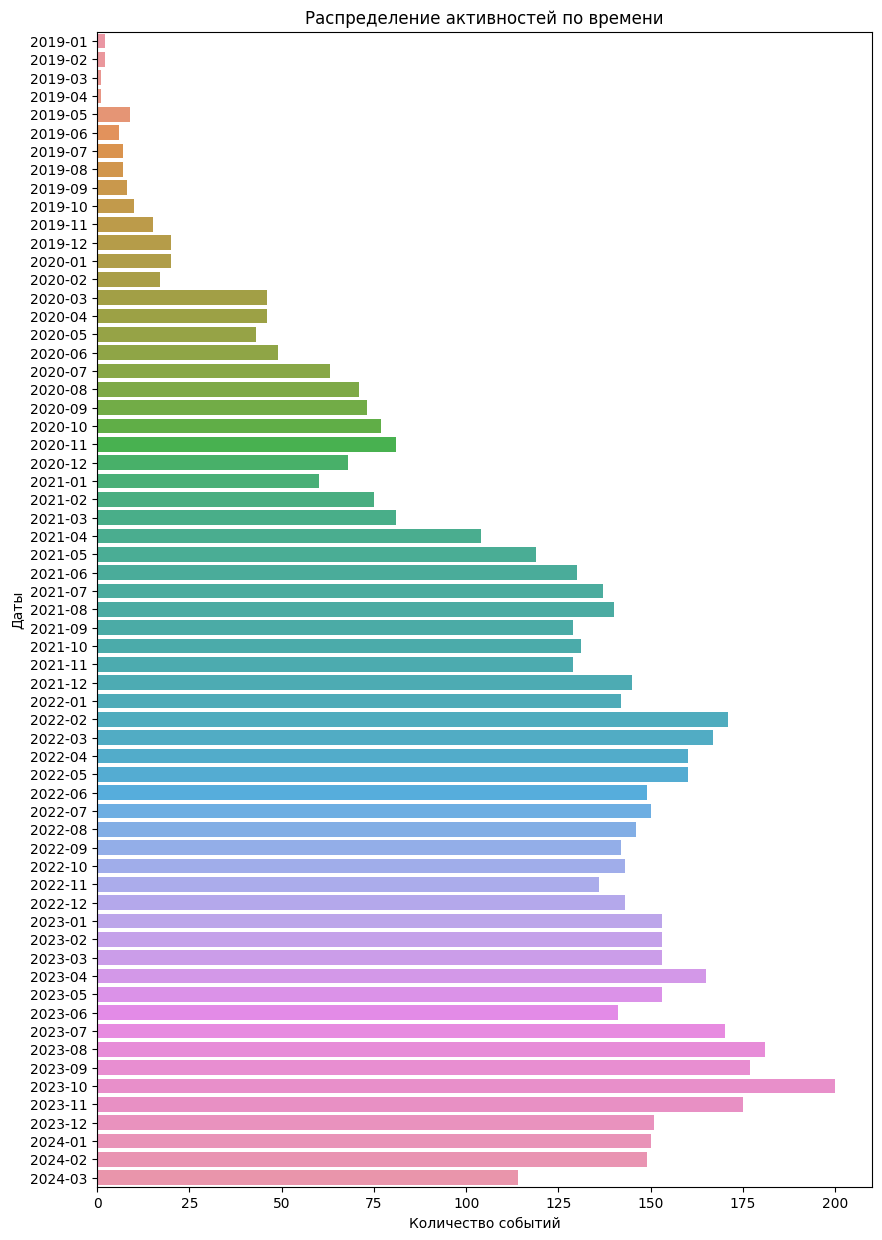

In [13]:
plt.figure(figsize=(10, 15))
sns.countplot(y=activities.sort_values(by='month')['month'].dt.strftime('%Y-%m'))
plt.title('Распределение активностей по времени')
plt.xlabel('Количество событий')
plt.ylabel('Даты');

Возрастание активности, начиная с марта 2021 года.

Проверим, как активность распределяется в течение года:

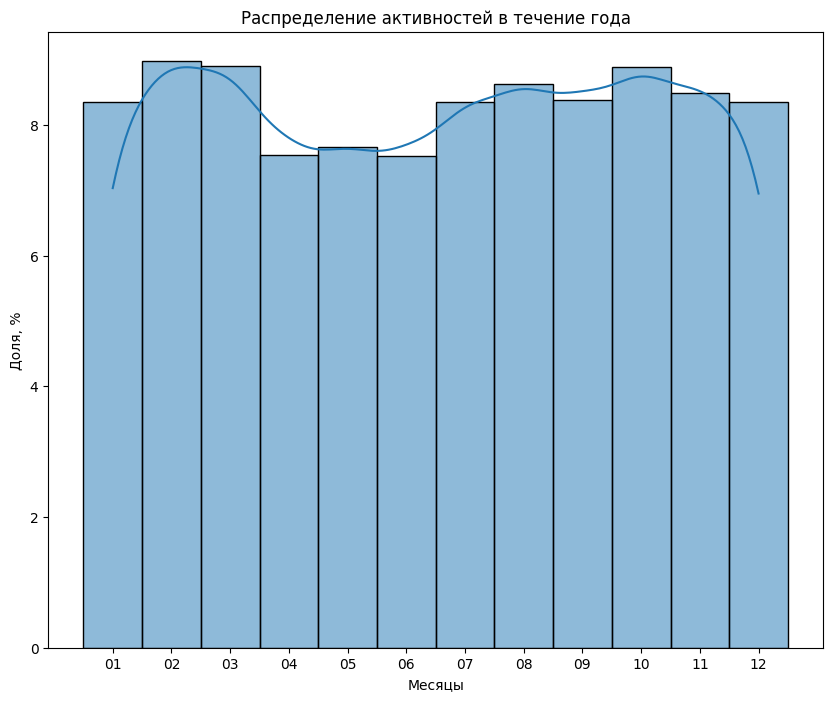

In [14]:
plt.figure(figsize=(10, 8))
sns.histplot(x=activities.sort_values(by='month')['month'].dt.strftime('%m'), kde=True, stat='percent')
plt.title('Распределение активностей в течение года')
plt.ylabel('Доля, %')
plt.xlabel('Месяцы');

Есть небольшое проседание в период с апреля по июнь, явно выраженных пиков не наблюдается.

Посмотрим на распределение признаков:

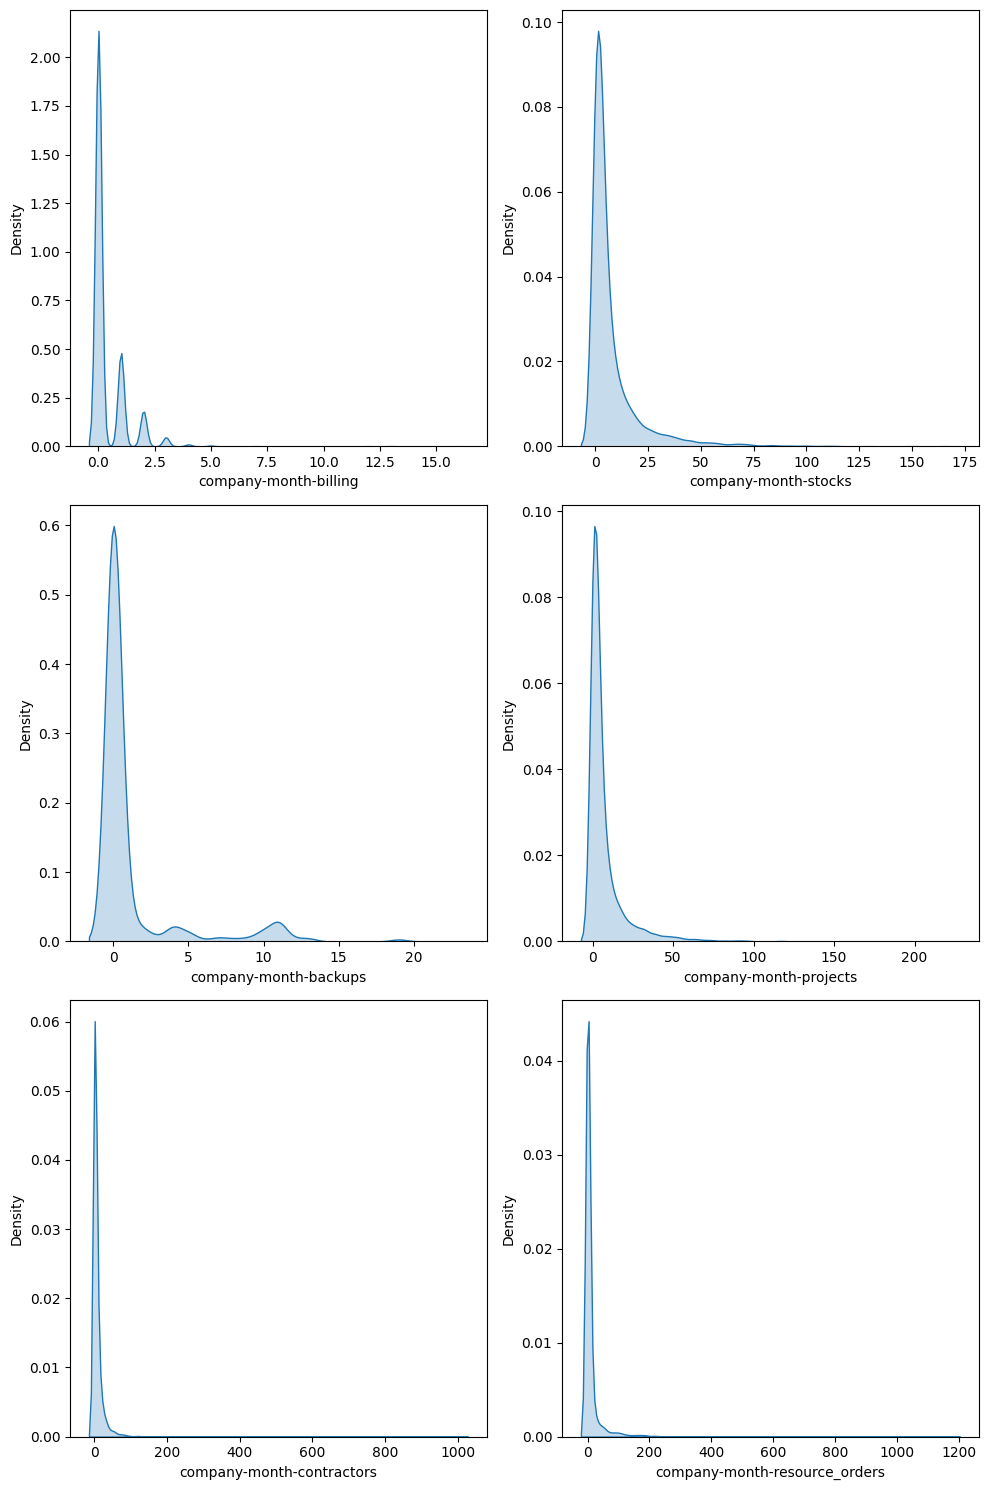

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
i = 0
for column in float_columns:
    ax = axes[i // 2, i % 2]
    sns.kdeplot(activities[column], ax=ax, fill=True)
    i += 1
fig.tight_layout()

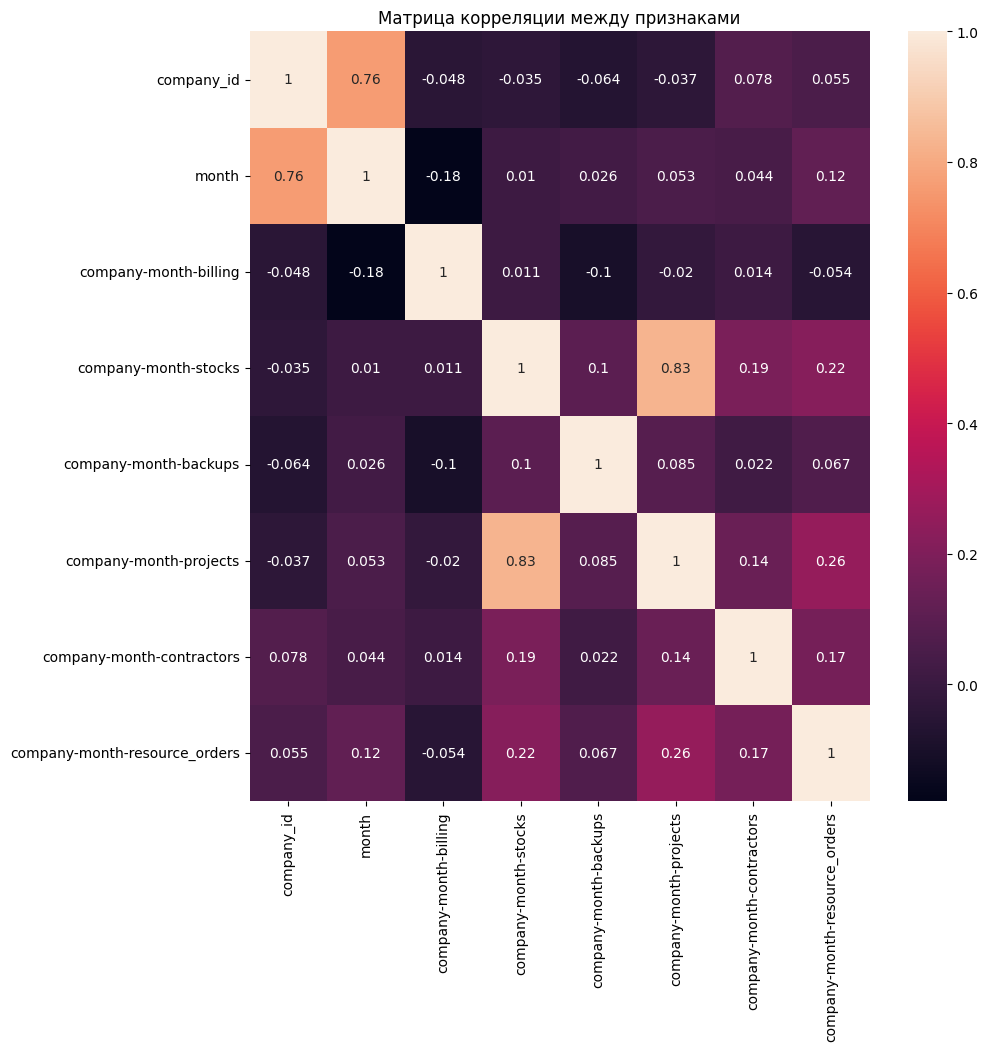

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(activities.corr(numeric_only=False), annot=True)
plt.title('Матрица корреляции между признаками');

Наблюдается значительная линейная зависимость между парами:
- дата и id компании,
- количество проектов и количество складов в месяц.

#### Подытог

Пропусков и дубликатов нет.

Данные об активности 716 компаний за период в 5 лет и 2 месяца: с января 2019 по март 2024 года.

Активность резко вырасла в марте 2020 года и с тех пор увеличивается. В течение года есть небольшое проседание в период с апреля по июня, явно выраженных пиков нет.

Очевидна низкая активность пользователей, например, в 75% описанных случаев компаниями не было выставлено ни одного счета в месяц, зафиксированный максимум - 16 счетов в месяц. Схожая картина в остальных колонках - небольшое количество сверхактивных пользователей при большом количестве пассивных.

Есть корреляция между парами:

- дата и id компании (что естественно, id компаний со времени возрастают),
- количество проектов и количество складов в месяц.

### Платежи

**Описание полей:**

- User_id - Идентификатор пользователя,
- Company_id - Идентификатор компании пользователя,
- Billing_tariff_id - Тарифный план,
- Payed_until -  Дата, до которой подписка компании действует,
- Is_payed - Статус оплаты,
- Created_at - Дата создания,
- Updated_at - Дата обновления,
- Billing_tariff_price_id - id стоимости тарифа,
- Comment - Комментарии,
- Pay_date - Дата платежа.

**Колонка Billing_tariff_id:**

Тарифы 1,18, 22 - тестовые, бесплатные и пробные. Если такие есть, при анализе не должны использоваться. 

Тарифы 4, 7, 8, 11, 19 - группа “старт”.

Тарифы 2, 17 - группа “базовый”.

Тарифы 9, 20 - группа “бизнес”.

Тарифы 3, 10, 13, 21 - группа “Профи”.

Тариф 6 - архивный.

In [17]:
billings = pd.read_csv('billing.csv')
billings.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
billings.head()

id  user_id  company_id  billing_tariff_id  payed_until  is_payed  \
0  3050      567         512                  3   1640153302     False   
1  3051     2861        2474                  7   1640131200      True   
2  3059     1902        1645                  2   1616577484     False   
3  3065     2352        2035                  7   1643500799     False   
4  3062     1074         926                  3   1611964800      True   

   created_at  updated_at  billing_tariff_price_id comment      pay_date  
0  1608617302  1608617302                     12.0     NaN           NaN  
1  1608626162  1608626181                     23.0     NaN  1.608626e+09  
2  1608801484  1608801484                      6.0     NaN           NaN  
3  1608883175  1608883175                     23.0     NaN           NaN  
4  1608814072  1608899674                      9.0     NaN  1.609200e+09

In [18]:
billings.shape

(3480, 11)

In [19]:
billings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       3480 non-null   int64  
 1   user_id                  3480 non-null   int64  
 2   company_id               3480 non-null   int64  
 3   billing_tariff_id        3480 non-null   int64  
 4   payed_until              3480 non-null   int64  
 5   is_payed                 3480 non-null   bool   
 6   created_at               3480 non-null   int64  
 7   updated_at               3480 non-null   int64  
 8   billing_tariff_price_id  3480 non-null   float64
 9   comment                  745 non-null    object 
 10  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 275.4+ KB


Переведем даты из формата Unix Timestamp в обычный:

In [20]:
dates_columns = ['payed_until', 'created_at', 'updated_at', 'pay_date']

In [21]:
for column in dates_columns:
    billings[column] = pd.to_datetime(billings[column], unit='s')

Приведем данные в колонке billing_tariff_price_id к целочисленному типу:

In [22]:
billings.billing_tariff_price_id.unique()

array([12., 23.,  6.,  9., 20.,  7., 13., 16., 35.,  8., 15., 24., 38.,
       26., 36., 22., 37.,  1., 32., 34., 28., 30., 17., 14., 11., 21.,
       29., 18., 25., 27., 10., 19., 33., 31., 41.,  5., 43., 42.,  2.,
       40., 44., 47., 61., 66., 60., 48., 54.])

In [23]:
billings.billing_tariff_price_id = billings.billing_tariff_price_id.astype('int')

In [24]:
billings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       3480 non-null   int64         
 1   user_id                  3480 non-null   int64         
 2   company_id               3480 non-null   int64         
 3   billing_tariff_id        3480 non-null   int64         
 4   payed_until              3480 non-null   datetime64[ns]
 5   is_payed                 3480 non-null   bool          
 6   created_at               3480 non-null   datetime64[ns]
 7   updated_at               3480 non-null   datetime64[ns]
 8   billing_tariff_price_id  3480 non-null   int32         
 9   comment                  745 non-null    object        
 10  pay_date                 1108 non-null   datetime64[ns]
dtypes: bool(1), datetime64[ns](4), int32(1), int64(4), object(1)
memory usage: 261.8+ KB


Дубликаты в датафрейме:

In [25]:
billings[['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed']].duplicated().sum()

70

In [26]:
billings[billings[['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed']].duplicated(keep=False)]

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
22     4385     4271        3515                  2  2021-06-15     False   
47     4484     4123        3410                  7  2022-06-20     False   
58     4458     4123        3410                  7  2022-06-20     False   
126    3304     2022        1748                  2  2021-07-27     False   
150    4862     3942        3276                  2  2023-07-21     False   
...     ...      ...         ...                ...         ...       ...   
3355  13080    12411        9179                  2  2025-01-09     False   
3356  13083    12411        9179                  2  2025-01-09     False   
3428  13429     4980        4004                  7  2025-02-15     False   
3473  11491    10045        7494                  2  2024-03-11     False   
3474  11492    10045        7494                  2  2024-03-11     False   

              created_at          updated_at  billing_tariff_price_id comment  \
22   2021-06-07 21:30:58 2021-06-07 21:31:21                       24     NaN   
47   2021-06-17 09:20:12 2021-06-17 09:20:19                       23     NaN   
58   2021-06-15 11:09:26 2021-06-15 11:09:44                       23     NaN   
126  2021-01-27 14:33:40 2021-01-27 14:33:49                        7     NaN   
150  2021-07-21 15:09:46 2021-07-21 15:09:49                       35     NaN   
...                  ...                 ...                      ...     ...   
3355 2024-01-09 11:44:25 2024-01-09 11:44:31                        8     NaN   
3356 2024-01-09 12:34:53 2024-01-09 12:34:57                        8     NaN   
3428 2024-02-15 07:02:18 2024-02-15 07:02:23                       23     NaN   
3473 2023-07-19 12:39:13 2024-03-11 14:06:08                       24     NaN   
3474 2023-07-19 12:39:15 2024-03-11 14:06:39                       24     NaN   

     pay_date  
22        NaT  
47        NaT  
58        NaT  
126       NaT  
150       NaT  
...       ...  
3355      NaT  
3356      NaT  
3428      NaT  
3473      NaT  
3474      NaT  

[133 rows x 11 columns]

In [27]:
billings = billings.drop_duplicates(['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed'])

In [28]:
billings.shape

(3410, 11)

Количество пропусков:

In [29]:
pd.concat([billings.isna().sum(), billings.isna().mean().round(2)], axis=1).rename(columns={0:'amount', 1:'share'})

amount  share
id                            0   0.00
user_id                       0   0.00
company_id                    0   0.00
billing_tariff_id             0   0.00
payed_until                   0   0.00
is_payed                      0   0.00
created_at                    0   0.00
updated_at                    0   0.00
billing_tariff_price_id       0   0.00
comment                    2665   0.78
pay_date                   2312   0.68

68% пропусков в колонке дат оплаты. Сравним с флагом is_payed:

In [30]:
 billings.is_payed.mean()

0.32697947214076245

Судя по флагу, оплачено около 33% выставленных счетов.

In [31]:
billings.is_payed.sum(), billings.shape[0] - billings.is_payed.sum()

(1115, 2295)

In [32]:
pd.crosstab(billings.is_payed, billings.pay_date.isna())

pay_date  False  True 
is_payed              
False       228   2067
True        870    245

In [33]:
pd.crosstab(billings.query('~is_payed').is_payed, billings.pay_date.isna(), normalize=True)

pay_date     False     True 
is_payed                    
False     0.099346  0.900654

In [34]:
pd.crosstab(billings.query('~is_payed').is_payed, billings.pay_date.isna())

pay_date  False  True 
is_payed              
False       228   2067

Почти в 90% случаев флаг неуплаты и пропуск в дате совпадают. Однако есть 10% процентов платежей, где флаг уплаты установлен в False, но дата оплаты присутствует.

In [35]:
billings.query('~is_payed and ~pay_date.isna()').head()

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
15  3057     2920        2507                  4  2021-06-23     False   
20  4309     3903        3244                  7  2022-07-15     False   
35  4176     4007        3323                  7  2021-12-28     False   
53  4505     3903        3244                  2  2022-06-29     False   
61  4473     4363        3579                  2  2023-01-01     False   

            created_at          updated_at  billing_tariff_price_id  \
15 2020-12-23 10:01:04 2020-12-23 12:05:38                       15   
20 2021-05-31 15:13:42 2021-05-31 15:14:06                       23   
35 2021-05-19 12:13:25 2021-06-11 12:17:33                       22   
53 2021-06-18 13:40:58 2021-06-18 13:41:23                        8   
61 2021-06-16 07:47:10 2021-06-23 14:52:12                       24   

                                              comment   pay_date  
15  23,12 - оплатили, ожидаем в январе сообщение о... 2020-12-25  
20                                                NaN 2021-05-31  
35                                            6+1 мес 2021-05-19  
53                                                NaN 2021-06-25  
61                                                NaN 2021-06-16

Еще в 245 случаях флаг установлен в True, но в дате оплаты пропуск:

In [36]:
billings.query('is_payed and pay_date.isna()').head()

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
102  2487     2290        1975                  7  2021-01-31      True   
308  2963     2748        2391                  3  2022-01-03      True   
408  1868     1093         943                  7  2021-02-04      True   
440  1966      711         628                  2  2020-09-23      True   
494  1834     1769        1528                  7  2020-11-01      True   

             created_at          updated_at  billing_tariff_price_id  \
102 2020-10-16 08:09:28 2021-01-18 13:02:59                       21   
308 2020-12-03 06:42:44 2021-03-25 06:58:04                       12   
408 2020-08-04 08:42:56 2020-08-04 08:43:12                       22   
440 2020-08-17 11:49:43 2020-09-21 11:39:43                        1   
494 2020-07-29 09:15:10 2020-10-01 10:49:54                       21   

                                               comment pay_date  
102  Стартовый с 24,10-24,01, деактивирую 12,01 для...      NaT  
308  25,03,21 продлили на 1 мес, т.к. очень сильно ...      NaT  
408                                                NaN      NaT  
440  оплатил стартовый, но хотел с бэкапом, поэтому...      NaT  
494  09,09 - остановили тариф, который был до 12,11...      NaT

Судя по комментариям, периодически случаются подарочные и скидочные акции:

In [37]:
billings.query('~comment.isna()').loc[billings.query('~comment.isna()').comment.str.contains('.*подар.*|.*акци.*', regex=True)]

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
87    3158     3055        2620                  7  2022-03-28      True   
103   3283     2966        2543                  7  2021-09-03      True   
134   3337     3189        2731                  3  2021-09-09      True   
135   3325     3229        2755                  2  2022-03-12      True   
267   3517     3426        2897                  2  2022-04-19      True   
269   3462     3332        2824                  2  2021-10-10      True   
299   3602     3511        2966                  2  2022-05-31      True   
305   3646     3489        2948                  7  2021-10-24      True   
350   3691     3534        2979                  2  2022-06-03     False   
400   3764     3607        3031                  2  2022-12-08      True   
491   3902     1850        1595                  7  2022-07-07      True   
521   3938     3662        3073                  7  2022-07-02      True   
533   4969     4345        3564                  7  2023-11-19      True   
684   5475     1891        1634                  2  2022-06-18      True   
689   4312     4213        3473                  7  2022-08-15      True   
882   1034      839         724                  4  2020-10-06      True   
965   1525     1340        1153                  7  2020-07-15      True   
1157  2660     2352        2035                  7  2021-01-29      True   
1201  2904     2605        2262                  7  2022-02-24     False   
1202  2937     2808        2441                  7  2022-02-10      True   
1206  2933     2708        2354                  2  2020-12-01      True   
1210  2961     1237        1072                  2  2021-07-03      True   
1214  2968     2839        2463                  7  2022-02-15      True   
1316  3402     3247        2767                  7  2022-08-16      True   
1374  5781     3332        2824                  2  2022-02-07      True   
1413  5898     5458        4330                  7  2024-02-25      True   
1551  6226     4543        3696                  2  2023-01-01      True   
1677  4991     1458        1255                  2  2022-06-20      True   
1964  7383     6604        5173                  7  2023-03-18      True   
2001  6646     3251        2771                  7  2023-08-10      True   
2169  5137       24          21                  4  2022-04-05      True   
2205  8018     7499        5787                  7  2023-12-19      True   
2300  7569     6954        5416                  7  2023-11-10      True   
2609  9151     8575        6552                  7  2024-07-25      True   
2643  4596     4289        3524                 10  2022-11-02      True   

              created_at          updated_at  billing_tariff_price_id  \
87   2021-01-13 13:08:28 2021-01-13 13:11:30                       23   
103  2021-01-25 11:53:53 2021-02-19 10:57:25                       22   
134  2021-02-02 08:30:01 2021-02-02 08:31:27                       11   
135  2021-01-29 14:04:47 2021-02-02 08:35:21                        8   
267  2021-03-04 11:30:23 2021-03-05 06:26:36                        8   
269  2021-02-24 12:58:06 2021-03-10 09:22:44                        7   
299  2021-03-16 14:58:01 2021-03-17 14:47:00                        8   
305  2021-03-23 14:07:43 2021-03-24 12:12:00                       22   
350  2021-03-29 15:46:54 2021-03-31 06:39:19                        8   
400  2021-04-06 09:22:38 2021-04-08 10:10:05                       24   
491  2021-04-22 14:52:12 2021-05-07 07:13:15                       23   
521  2021-04-27 08:04:56 2021-04-30 14:27:16                       23   
533  2021-08-02 06:41:04 2021-08-02 06:45:43                       34   
684  2021-09-14 07:53:41 2021-10-18 07:54:45                        7   
689  2021-06-01 06:16:31 2021-06-01 07:17:46                       23   
882  2020-04-06 05:29:58 2020-04-06 05:31:56                       15   
965  2020-06-15 13:19:10 2020-

Компания получила 2 месяца в подарок, флаг is_payed = False, в дате оплаты пропуск:

In [38]:
billings.query('company_id == 2262')

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
1201  2904     2605        2262                  7  2022-02-24     False   

              created_at          updated_at  billing_tariff_price_id  \
1201 2020-11-24 07:41:20 2020-11-27 08:22:46                       23   

                                                comment pay_date  
1201  Тариф по 24,11,21 + пользователь попал под акц...      NaT

In [39]:
billings.loc[1201, 'comment']

'Тариф по 24,11,21 + пользователь попал под акцию +2 мес в подарок, продлила по 24,02,2022'

In [40]:
billings.query('~comment.isna()').loc[billings.query('~comment.isna()').comment.str.contains('.*\+.*', regex=True)]

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
21     5026     4857        3917                  2  2021-09-06      True   
35     4176     4007        3323                  7  2021-12-28     False   
62     4497     2608        2265                  7  2022-12-20      True   
74     5108     4846        3907                  7  2023-12-18      True   
81     5245     4795        3865                  7  2022-11-01      True   
...     ...      ...         ...                ...         ...       ...   
3455  13360    13243        9742                  9  2025-04-01      True   
3456   8116     6204        4875                  7  2024-03-01      True   
3460  10566    10091        7526                  2  2024-03-06      True   
3461  13549    13054        9623                  7  2025-04-08      True   
3471  13013    13060        9626                  7  2024-03-11      True   

              created_at          updated_at  billing_tariff_price_id  \
21   2021-08-05 14:35:46 2021-09-06 13:24:24                       35   
35   2021-05-19 12:13:25 2021-06-11 12:17:33                       22   
62   2021-06-18 06:37:56 2022-07-25 09:47:56                       23   
74   2021-08-13 13:25:47 2021-08-17 08:16:46                       34   
81   2021-08-26 06:05:18 2021-08-31 15:10:52                       23   
...                  ...                 ...                      ...   
3455 2024-02-06 13:40:34 2024-03-01 07:39:36                       29   
3456 2022-04-22 07:47:43 2024-03-01 15:10:33                       34   
3460 2023-03-30 08:17:57 2024-03-06 09:25:07                        8   
3461 2024-03-01 15:19:11 2024-03-06 14:41:56                       23   
3471 2023-12-26 08:14:50 2024-03-11 10:09:16                       23   

                                                comment            pay_date  
21                     24 + 4 мес\r\n06.09,2021 Возврат 2021-08-06 00:00:00  
35                                              6+1 мес 2021-05-19 00:00:00  
62                  25 07 2022 + 3 месяца за видео кейс 2021-06-18 00:00:00  
74                                 (24 месяцев) + 120дн 2021-08-17 00:00:00  
81                   31,08,21 - пришла оплата + 30 дней 2021-08-31 00:00:00  
...                                                 ...                 ...  
3455                          1,03,24 активировали 12+1 2024-03-01 07:39:36  
3456  24+4\r\nактивировали 01,03,24 - тариф побольше... 2022-04-26 00:00:00  
3460  12+1 до 30,04,24\r\n06,03,24 сменили тариф со ... 2023-03-30 00:00:00  
3461                             8,03,24 активация 12+1 2024-03-06 14:41:56  
3471  15,01,23 активировали, 12+3\r\n11,03,24- оформ... 2024-01-15 00:00:00  

[459 rows x 11 columns]

Акции фиксируются только в комментариях, отследить такие добавления трудозатратно.

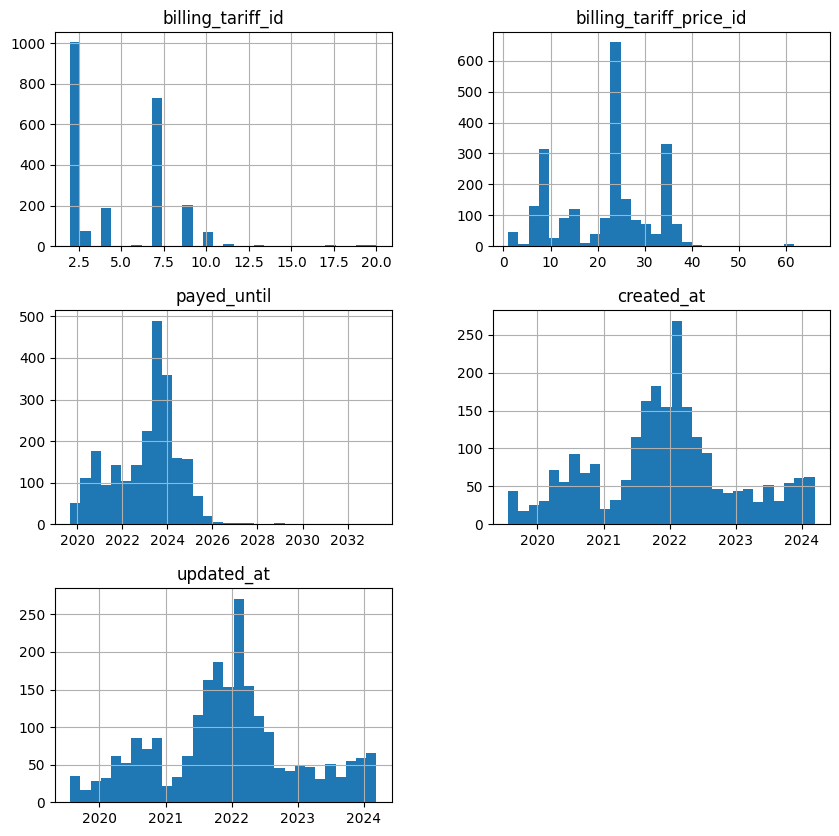

In [41]:
billings.query('pay_date.isna()')[['billing_tariff_id',\
                                   'billing_tariff_price_id',\
                                   'payed_until', 'is_payed',\
                                   'created_at', 'updated_at'
                                  ]].hist(figsize=(10,10), bins=30);

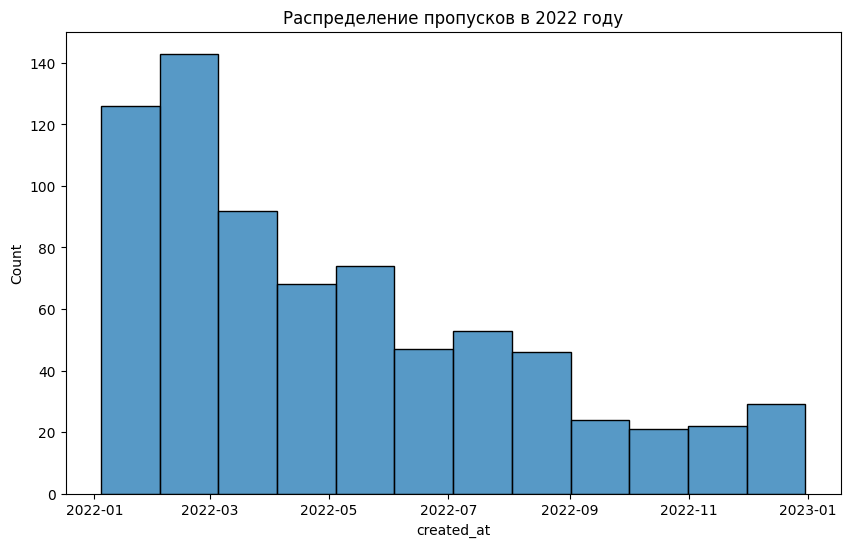

In [42]:
plt.figure(figsize=(10,6))
sns.histplot(billings.query('pay_date.isna() and 2022 < created_at < "2023"')['created_at'])
plt.title('Распределение пропусков в 2022 году');

Пик количества пропусков приходится на 2022 год. Возможно, это связано с увеличением количества пользователей сервиса.

Пропуски в графе pay_date не имеют очевидной логики и, по крайней мере в тех записях, где флаг оплаты установлен в True, скорее всего, связаны с техническими ошибками.

In [43]:
billings.describe(include='datetime')

payed_until           created_at           updated_at  \
count                  3410                 3410                 3410   
unique                 1841                 3410                 3410   
top     2023-12-21 00:00:00  2020-12-22 06:08:22  2020-12-22 06:08:22   
freq                     11                    1                    1   
first   2019-09-11 23:59:59  2019-07-23 09:32:39  2019-07-23 09:32:39   
last    2033-04-10 23:59:59  2024-03-13 10:24:06  2024-03-13 10:26:17   

                   pay_date  
count                  1098  
unique                  800  
top     2022-05-31 00:00:00  
freq                     10  
first   2020-12-16 12:43:27  
last    2024-03-15 00:00:00

Данные за период с 23 июля 2019 по 13 марта 2024 года.

Самая поздняя дата оплаты - 15 марта 2024 года.

Самая поздняя дата продления подписки - 10 апреля 2033 года.

In [44]:
billings.query('payed_until == "2033-04-10 23:59:59"')

id  user_id  company_id  billing_tariff_id         payed_until  \
101  3047      567         512                  7 2033-04-10 23:59:59   

     is_payed          created_at          updated_at  \
101     False 2020-12-21 15:05:06 2020-12-21 15:05:06   

     billing_tariff_price_id comment pay_date  
101                       23     NaN      NaT

Проверим информацию о тарифах (присутствуют ли записи с бесплатными тарифами 1, 18, 22):

In [45]:
sorted(billings.billing_tariff_id.unique())

[2, 3, 4, 6, 7, 9, 10, 11, 13, 17, 19, 20, 21]

In [46]:
free = [1, 18, 22]
billings.query('billing_tariff_id in @free').shape[0]

0

In [47]:
billings.query('company_id == 512').sort_values(by='created_at')

id  user_id  company_id  billing_tariff_id         payed_until  \
829   856      567         512                  4 2020-04-30 00:00:00   
878   938      567         512                  2 2023-01-26 00:00:00   
55   3045      567         512                  2 2026-01-05 23:59:59   
83   3046      567         512                  6 2021-06-21 14:55:39   
101  3047      567         512                  7 2033-04-10 23:59:59   
0    3050      567         512                  3 2021-12-22 06:08:22   
557  4063      567         512                  2 2026-12-05 23:59:59   

     is_payed          created_at          updated_at  \
829      True 2020-01-30 07:23:37 2020-01-30 07:24:15   
878      True 2020-03-04 12:49:11 2023-01-26 15:18:59   
55      False 2020-12-21 14:47:22 2020-12-21 14:47:22   
83      False 2020-12-21 14:55:39 2020-12-21 14:55:39   
101     False 2020-12-21 15:05:06 2020-12-21 15:05:06   
0       False 2020-12-22 06:08:22 2020-12-22 06:08:22   
557     False 2021-05-11 07:32:19 2021-05-11 07:32:19   

     billing_tariff_price_id comment pay_date  
829                       14     NaN      NaT  
878                        1     NaN      NaT  
55                         1     NaN      NaT  
83                        17     NaN      NaT  
101                       23     NaN      NaT  
0                         12     NaN      NaT  
557                        8     NaN      NaT

In [48]:
activities.query('company_id == 512').sort_values(by='month')

company_id      month  company-month-billing  company-month-stocks  \
6110         512 2019-10-01                      0                     0   
108          512 2019-12-01                      1                     0   
109          512 2020-01-01                      1                     0   
1724         512 2020-03-01                      0                     2   
1725         512 2020-05-01                      0                     3   
5314         512 2020-06-01                      0                     0   
1726         512 2020-07-01                      0                     3   
6111         512 2020-09-01                      0                     0   
1727         512 2020-10-01                      0                     4   
1728         512 2020-11-01                      0                    18   
110          512 2020-12-01                      4                     1   
1729         512 2021-01-01                      0                     2   
1730         512 2021-02-01                      0                     1   
1731         512 2021-03-01                      0                     1   
1732         512 2021-04-01                      0                    11   
111          512 2021-05-01                      1                     0   
5315         512 2021-06-01                      0                     0   
112          512 2023-01-01                      1                     0   

      company-month-backups  company-month-projects  \
6110                      0                       0   
108                       0                       0   
109                       0                       0   
1724                      0                       0   
1725                      0                       0   
5314                     11                       0   
1726                      7                       3   
6111                      0                       0   
1727                      8                       4   
1728                     10                      18   
110                      11                       1   
1729                     11                       1   
1730                     10                       4   
1731                      7                       1   
1732                     10                      13   
111                      11                       1   
5315                      1                       1   
112                       0                       0   

      company-month-contractors  company-month-resource_orders  
6110                          1                              0  
108                           0                              0  
109                           0                              0  
1724                          0                              0  
1725                          0                              0  
5314                          0                              0  
1726                          0                              0  
6111                          1                              0  
1727                          3                              0  
1728                         37                              0  
110                           0                              0  
1729                          0                              0  
1730                          0                              0  
1731                          0                              0  
1732                          0                              0  
111                           0                              1  
5315                          0                              1  
112                           0                              0

Два флага оплаты при отсутствии дат проведения платежей. 

Очевидно, что клиент оплатил подписку до 26 января 2023 года, затем пытался перейти на другие тарифы, однако по данным непонятно, была ли проведена оплата счетов. Возможно, из-за технического сбоя пропала информация о датах.

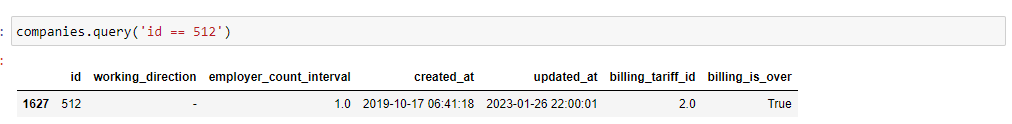

С учетом тарифа, даты апдейта и флага billing_is_over можно предположить, что все счета этой компании с флагом is_payed = False были выставлены, но не оплачены.

In [49]:
billings.query('~is_payed').created_at.max()

Timestamp('2024-03-12 17:52:29')

In [50]:
billings.query('~is_payed').pay_date.max()

Timestamp('2024-03-15 00:00:00')

In [51]:
billings.query('~is_payed and ~pay_date.isna()').sort_values(by=['company_id', 'created_at'])

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
2471   8797       12          11                  9  2023-06-30     False   
2476   8804       12          11                 11  2023-01-01     False   
1231   3028      472         430                  2  2020-12-24     False   
66     5098      689         615                  2  2022-02-12     False   
431    3814      711         628                  4  2022-04-17     False   
...     ...      ...         ...                ...         ...       ...   
3147  12484    12310        9109                  7  2024-10-24     False   
3267  12675    12431        9195                  7  2024-11-23     False   
3251  12571    12498        9243                  9  2026-04-01     False   
3298  12871    12909        9526                  7  2024-12-08     False   
3477  14365    13378        9841                  7  2025-03-13     False   

              created_at          updated_at  billing_tariff_price_id  \
2471 2022-06-30 16:35:50 2022-06-30 16:36:14                       29   
2476 2022-07-01 16:07:35 2022-07-01 16:07:43                       38   
1231 2020-12-17 14:01:56 2020-12-17 14:03:23                        8   
66   2021-08-12 10:04:24 2021-08-12 11:59:36                        7   
431  2021-04-12 10:45:50 2021-04-12 10:46:08                       16   
...                  ...                 ...                      ...   
3147 2023-10-24 12:10:17 2023-10-24 12:11:16                       23   
3267 2023-11-13 09:42:30 2023-11-13 09:45:25                       23   
3251 2023-10-31 12:36:06 2023-11-02 11:28:13                       36   
3298 2023-12-05 09:32:20 2023-12-05 09:33:13                       23   
3477 2024-03-12 17:52:29 2024-03-12 17:53:29                       23   

            comment            pay_date  
2471            NaN 2022-06-16 00:00:00  
2476            NaN 2022-07-15 00:00:00  
1231            NaN 2020-12-17 14:03:23  
66              NaN 2021-08-12 00:00:00  
431             NaN 2021-04-17 00:00:00  
...             ...                 ...  
3147            NaN 2023-10-31 00:00:00  
3267            NaN 2023-11-22 00:00:00  
3251  03,11,23-24+5 2023-11-02 00:00:00  
3298            NaN 2023-12-07 00:00:00  
3477            NaN 2024-03-15 00:00:00  

[228 rows x 11 columns]

Самый поздний неоплаченный счет выставлен 13 марта 2024 года. Последняя дата в датасете - 15 марта.

Допуская возможность возникновения ошибок при сборке датасета или при формировании флага is_payed (а также в связи с тем, что неизвестна механика формирования значения флага при переходе, например, на более дешевый тариф), будем считать оплаченными те платежи, у которых выставлен флаг или стоит дата оплаты. Подарочными добавлениями месяцев пренебрежем.

In [52]:
payed_billings = billings.query('is_payed or ~pay_date.isna()')

In [53]:
payed_billings.shape

(1343, 11)

In [54]:
payed_billings.isna().mean()

id                         0.000000
user_id                    0.000000
company_id                 0.000000
billing_tariff_id          0.000000
payed_until                0.000000
is_payed                   0.000000
created_at                 0.000000
updated_at                 0.000000
billing_tariff_price_id    0.000000
comment                    0.459419
pay_date                   0.182427
dtype: float64

In [55]:
payed_billings.company_id.nunique()

878

In [56]:
billings.company_id.nunique()

1841

In [57]:
payed_billings.describe(include='datetime')

payed_until           created_at           updated_at  \
count                  1343                 1343                 1343   
unique                  918                 1343                 1343   
top     2020-10-01 00:00:00  2020-12-22 08:36:02  2020-12-22 08:36:21   
freq                      5                    1                    1   
first   2019-10-11 00:00:00  2019-07-23 15:48:05  2019-10-10 09:45:43   
last    2026-06-12 00:00:00  2024-03-13 10:24:06  2024-03-13 10:26:17   

                   pay_date  
count                  1098  
unique                  800  
top     2022-05-31 00:00:00  
freq                     10  
first   2020-12-16 12:43:27  
last    2024-03-15 00:00:00

In [58]:
payed_billings[['user_id', 'company_id', 'billing_tariff_id', 'payed_until', 'is_payed']].duplicated().sum()

0

#### Подытог

Присутствовали дубликаты в количестве 70 штук, были удалены. Есть пропуски в двух колонках. Есть частичное пересечение пропусков в колонке pay_date и колонке is_payed.

Тестовых, бесплатных и пробных тарифов в данных нет.

Данные за период с 23 июля 2019 по 15 марта 2024 года (данные об активности начинаются на полгода раньше). 

Судя по колонке с комментариями, практикуются подарочные месяцы за оплату на год или за отзыв. Кроме того, часть клиентов периодически попадает под акции со скидками. В некоторых случаях флаг оплаты не устанавливается, в дате оплаты пропуск, но тариф продлевается. Так как эти случаи фиксируются только в графе с комментариями, они дают прирост а подписке на один-два месяца, а отлавливать их слишком дорого по времени, было решено ими пренебречь. 

Все оплаченные платежи были вынесены в отдельный датафрейм - payed_billings. В нем содержится о платежах 878 компаниях (всего в датасете была информация о 1841 компании).

Возможно, такая разница возникла из-за того, что часть компаний получала демо-доступ к сервису (доступно предложение "первые 7 дней бесплатно"), но не стала оплачивать платную подписку. 

### Компании

**Описание данных:**

- Id - id компании,
- Working_direction - сфера деятельности,
- Employer_count_interval - id количества сотрудников,
- Created_at - дата создания компании в системе,
- Updated_at - дата обновления информации о компании,
- Billing_tariff_id - id тарифа,
- Billing_is_over - истекла ли оплата.
 
**Employer_count_interval:**

Категории от 1 до 8 соответствуют количеству сотрудников - (1-4, 5-10, 11-20, 21-30, 31-50, 51-100, 101-200, >201).


In [59]:
companies = pd.read_csv('companies.csv', index_col=0)
companies

id                                  working_direction  \
19      514                                                  -   
57      383                                      Строительство   
69      495                                                  -   
75      724                                                  -   
99      471                                                  -   
...     ...                                                ...   
11434  7074                                                  -   
11500  6279                                                  -   
11547  6256                                                  -   
15463  5411                                                  -   
17972  7526  Строительство частной и коммерческой недвижимо...   

       employer_count_interval  created_at  updated_at  billing_tariff_id  \
19                         1.0  1571316635  1670298314                4.0   
57                         2.0  1564142565  1676550050                7.0   
69                         1.0  1570535695  1598281714                2.0   
75                         1.0  1579514393  1670298294                4.0   
99                         1.0  1569328017  1670298360                7.0   
...                        ...         ...         ...                ...   
11434                      1.0  1671548145  1709157602                7.0   
11500                      3.0  1656313100  1709676001                2.0   
11547                      1.0  1655827277  1709848801                7.0   
15463                      1.0  1645018850  1710233935                9.0   
17972                      2.0  1678793983  1710325577                2.0   

       billing_is_over  
19                True  
57               False  
69               False  
75                True  
99                True  
...                ...  
11434             True  
11500             True  
11547             True  
15463            False  
17972            False  

[723 rows x 7 columns]

In [60]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_direction        720 non-null    object 
 2   employer_count_interval  723 non-null    float64
 3   created_at               723 non-null    int64  
 4   updated_at               723 non-null    int64  
 5   billing_tariff_id        716 non-null    float64
 6   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 40.2+ KB


In [61]:
companies.duplicated().sum()

0

In [62]:
companies[['id', 'working_direction']].duplicated().sum()

0

Дубликатов нет, но есть пропуски в двух столбцах.

In [63]:
dates_columns = ['created_at', 'updated_at']

In [64]:
for column in dates_columns:
    companies[column] = pd.to_datetime(companies[column], unit='s')

В колонке billing_tariff_id имеется 7 пропусков:

In [65]:
companies.query('billing_tariff_id.isna()')

id working_direction  employer_count_interval          created_at  \
1311  1394           ремонты                      2.0 2020-07-06 14:49:27   
2207  2366                 -                      1.0 2020-11-17 07:32:31   
8311  7478                 -                      1.0 2023-03-06 20:07:46   
8313  7479                 -                      1.0 2023-03-07 07:27:54   
8315  7480                 -                      1.0 2023-03-07 07:41:13   
8317  7481                 -                      1.0 2023-03-07 07:58:28   
8885  7944                 -                      1.0 2023-05-15 11:20:33   

              updated_at  billing_tariff_id  billing_is_over  
1311 2020-07-06 14:49:27                NaN            False  
2207 2020-11-17 07:32:31                NaN            False  
8311 2023-03-06 20:07:46                NaN            False  
8313 2023-03-07 07:27:54                NaN            False  
8315 2023-03-07 07:41:13                NaN            False  
8317 2023-03-07 07:58:28                NaN            False  
8885 2023-05-15 11:20:33                NaN            False

Даты created_at и updated_at полностью совпадают. Проверим, встречается ли то же самое в остальных данных:

In [66]:
companies.query('created_at == updated_at')

id working_direction  employer_count_interval          created_at  \
1311  1394           ремонты                      2.0 2020-07-06 14:49:27   
2207  2366                 -                      1.0 2020-11-17 07:32:31   
8311  7478                 -                      1.0 2023-03-06 20:07:46   
8313  7479                 -                      1.0 2023-03-07 07:27:54   
8315  7480                 -                      1.0 2023-03-07 07:41:13   
8317  7481                 -                      1.0 2023-03-07 07:58:28   
8885  7944                 -                      1.0 2023-05-15 11:20:33   

              updated_at  billing_tariff_id  billing_is_over  
1311 2020-07-06 14:49:27                NaN            False  
2207 2020-11-17 07:32:31                NaN            False  
8311 2023-03-06 20:07:46                NaN            False  
8313 2023-03-07 07:27:54                NaN            False  
8315 2023-03-07 07:41:13                NaN            False  
8317 2023-03-07 07:58:28                NaN            False  
8885 2023-05-15 11:20:33                NaN            False

Проверим, есть ли эти компании в датасетах с активностями и платежами:

In [67]:
nan_in_billing_tagif = companies.query('billing_tariff_id.isna()')['id'].to_list()
nan_in_billing_tagif

[1394, 2366, 7478, 7479, 7480, 7481, 7944]

In [68]:
billings.query('company_id in @nan_in_billing_tagif')

Empty DataFrame
Columns: [id, user_id, company_id, billing_tariff_id, payed_until, is_payed, created_at, updated_at, billing_tariff_price_id, comment, pay_date]
Index: []

In [69]:
activities.query('company_id in @nan_in_billing_tagif')

Empty DataFrame
Columns: [company_id, month, company-month-billing, company-month-stocks, company-month-backups, company-month-projects, company-month-contractors, company-month-resource_orders]
Index: []

In [70]:
print(f'Доля пропусков в датасете составляет: {100 * len(companies.query("billing_tariff_id.isna()")) / companies.shape[0]}%')

Доля пропусков в датасете составляет: 0.9681881051175657%


У компаний нет ни платежей, ни деятельности за изучаемый период, хотя с момента регистрации прошло 10 месяцев и больше. Также неизвестен тариф подписки компаний. Эти записи составляют меньше 1%. Удалим их из датасета:

In [71]:
companies.dropna(subset=['billing_tariff_id'], inplace=True)

In [72]:
companies.shape

(716, 7)

Изменим тип данных в колонках 'employer_count_interval', 'billing_tariff_id':

In [73]:
cat_column = ['employer_count_interval', 'billing_tariff_id']

In [74]:
companies[cat_column] = companies[cat_column].astype('int')

In [75]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 19 to 17972
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       716 non-null    int64         
 1   working_direction        713 non-null    object        
 2   employer_count_interval  716 non-null    int32         
 3   created_at               716 non-null    datetime64[ns]
 4   updated_at               716 non-null    datetime64[ns]
 5   billing_tariff_id        716 non-null    int32         
 6   billing_is_over          716 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int32(2), int64(1), object(1)
memory usage: 34.3+ KB


In [76]:
companies.query('working_direction.isna()')

id working_direction  employer_count_interval          created_at  \
2630  8364               NaN                        2 2023-07-14 09:31:48   
6713  6927               NaN                        1 2022-11-16 11:30:53   
8472  7527               NaN                        2 2023-03-14 11:44:33   

              updated_at  billing_tariff_id  billing_is_over  
2630 2023-08-16 09:58:48                  2            False  
6713 2024-03-06 12:12:23                 17            False  
8472 2023-06-07 09:28:57                  9            False

Заполним пропуски:

In [77]:
companies.working_direction.fillna('no_data', inplace=True)

In [78]:
companies.working_direction.value_counts(dropna=False).head(30)

-                                                          452
Строительство                                               55
строительство                                               10
Малоэтажное строительство                                    5
Строительство и ремонт                                       4
-строительство                                               4
Строительство                                                3
Девелопмент                                                  3
Электромонтаж                                                3
Строительная компания                                        3
no_data                                                      3
Ремонт под ключ                                              2
Строительно монтажные работы                                 2
Строительно-монтажные работы                                 2
Строительство рыбоводных ферм                                2
Демонтажные работы                                     

Приведем все записи к нижнему регистру:

In [79]:
companies.working_direction = companies.working_direction.str.lower().str.strip()

In [80]:
companies.working_direction.unique()

array(['-', 'строительство', 'генеральный подрядчик',
       'строительная компания', 'ремонт помещений', 'ремонт и отделка',
       'строительство домов', 'телемаркетинг', 'ремонт',
       'ремонт и отделка помещений', '-малоэтажное строительство',
       'отделка', 'проектирование и строительство ресторанов',
       'строительство  и отделка', 'электромонтажные работы',
       'строительная компания (тест)', 'строительство и ремонт',
       'демонтажные работы', 'строительство рыбоводных ферм',
       'строительно-монтажные работы', 'строительство каркасных домов',
       'дизайн интерьеров', 'ремонтные работы',
       'малоэтажное строительство', 'no_data', 'ремонтно-строительная',
       'ремонт под ключ', 'электромонтаж',
       'проектирование,  производство и строительство',
       'строительство коттеджей', 'строительство загородных домов',
       'электроэнергетика', 'изготовление заборов', 'ремонт квартир',
       'девелопмент', 'строительство спортивных и детски площадок',
 

Заменим значения '-' на заглушку:

In [81]:
companies.working_direction = companies.working_direction.str.replace(r'^-$', 'no_data')

Удалим лишние символы, унифицируем род деятельности:

In [82]:
companies.working_direction = companies.working_direction.str.replace(r'^-|\s\.$', '')
companies.working_direction = companies.working_direction.str.replace(r'  ', ' ', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'^-', '')
companies.working_direction = companies.working_direction.str.replace(r'дарить людям радость', 'no_data')
companies.working_direction = companies.working_direction.str.replace(r'^-$', 'no data')
companies.working_direction = companies.working_direction.str.replace(r'стройтельство', 'строительство')
companies.working_direction = companies.working_direction.str.replace(r'генподряд|генеральный подряд$',
                                                                      'генеральный подрядчик')
companies.working_direction = companies.working_direction.str.replace(r' с 2008 г\.| \(тест\)| \(основной\)', '', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'кап\.ремонт', 'капитальный ремонт', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'\.$', '', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'\.', ',', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'^\s', '', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'ремонт и отделка.*',
                                                                      'ремонт, отделка', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'детски', 'детскиx') 
companies.working_direction = companies.working_direction.str.replace(r' и ', r', ', regex=True) 
companies.working_direction = companies.working_direction.str.replace(r'/', r', ', regex=True) 
companies.working_direction = companies.working_direction.str.replace(r'строительно монтажные работы',
                                                                      'строительно-монтажные работы', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'архитектура строительство',
                                                                      'архитектура, строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'вентиляция кондиционирование',
                                                                      'вентиляция, кондиционирование', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'дома для хорошей жизни',
                                                                      'строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'домостроение',
                                                                      'строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'электроэнергетика',
                                                                      'электромонтаж', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'архитектура строительство',
                                                                      'архитектура, строительство', regex=True)
companies.working_direction = companies.working_direction\
        .str.replace(r'деревья|ландшафтно-строительная компания|благоустройство', 'ландшафт', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'внутренние |внутренняя |чистовая |эффективные ',
                                                                      '', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'монолитные', 'бетонные', regex=True) 

companies.working_direction = companies.working_direction\
         .str.replace(r'вентиляция, кондиционирование|водоподготовка|гидроизоляция\
                      |монтаж инженерных систем|наружные сети|строительство инженерных систем|светопрозрачные конструкции\
                      |системы безопасности|автоматизации, слаботочные системы|производство, строительство шумозащитных экранов\
                      |электроснабжение электрификация|гидроизоляция|проводные, беспроводные инженерные системы "под ключ"\
                      |строительство инженерных коммуникаций|светопрозрачные конструкции|слаботочные системы\
                      |производство, строительство шумозащитных экранов|слаботочные системы',
                      'инженерные системы', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'девелопмент', 'девелопмент, строительство', regex=True) 
companies.working_direction = companies.working_direction.str.replace(r'электромонтаж.*', 'электромонтаж', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'инвестиционно-строительная компания',
                                                                      'инвестиции, сторительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительно-монтажные работы|строительно-монтажная',
                                                                      'строительство, монтаж', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'ремонтно отделочные работы|ремонтно-отделочные работы',
                                                                      'ремонт, отделка', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'проектирование производство строительство',
                                                                      'проектирование, производство, строительство', regex=True)

companies.working_direction = companies.working_direction\
         .str.replace(r'ремонтно строительная компания|ремонтно-строительная|ремонтно-строительная компания',
                      'ремонт, строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'ремонтные работы', 'ремонт', regex=True)

companies.working_direction = companies.working_direction.str.replace(r'строительная компания',
                                                                      'строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительная', 'строительство', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительно отделочные работы',
                                                                      'строительство, отделка', regex=True)   
companies.working_direction = companies.working_direction.str.replace(r'компания по строительству',
                                                                      'строительство', regex=True)   
companies.working_direction = companies.working_direction.str.replace(r'отделочные работы',
                                                                      'отделка', regex=True)  
companies.working_direction = companies.working_direction.str.replace(r'продажа домов', 'риэлтор', regex=True)

companies.working_direction = companies.working_direction.str.replace(r'строительные, отделка, продажа материалов',
                                                                      'строительство, отделка, продажа стройматериалов',
                                                                      regex=True)
companies.working_direction = companies.working_direction.str.replace(r'металлоконструкции',
                                                                      'продажа стройматериалов', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительно-монтажно-ремонт',
                                                                      'строительство, монтаж, ремонт', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительно-монтажное направление',
                                                                      'строительство, монтаж', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'строительно-ремонтная компания',
                                                                      'строительство, ремонт', regex=True)
companies.working_direction = companies.working_direction.str.replace(r'создание', 'строительство', regex=True)

В роде деятельности встречается 'it', проверим записи:

In [83]:
companies.query('working_direction == "it"')

id working_direction  employer_count_interval          created_at  \
3593  3745                it                        2 2021-07-13 03:41:30   

              updated_at  billing_tariff_id  billing_is_over  
3593 2022-12-06 03:46:15                  2             True

In [84]:
activities.query('company_id == 3745')

company_id      month  company-month-billing  company-month-stocks  \
838         3745 2021-07-01                      1                     1   
839         3745 2022-03-01                      1                     0   
3222        3745 2021-09-01                      0                     6   

      company-month-backups  company-month-projects  \
838                       0                       1   
839                       0                       0   
3222                      0                       5   

      company-month-contractors  company-month-resource_orders  
838                           3                              7  
839                           0                              0  
3222                          8                              9

In [85]:
billings.query('company_id == 3745')

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
500  4783     4614        3745                  2  2022-06-03      True   

             created_at          updated_at  billing_tariff_price_id comment  \
500 2021-07-15 07:27:42 2022-03-05 05:37:48                        7     NaN   

      pay_date  
500 2021-07-15

In [86]:
companies.working_direction = companies.working_direction.str.replace(r'it|телемаркетинг', 'no_data', regex=True)

In [87]:
companies.working_direction.nunique()

102

In [88]:
sorted(companies.working_direction.unique())

['no_data',
 'агрегатор элитных ремонтов',
 'архитектура, строительство',
 'бетонные работы',
 'генеральный подрядчик',
 'девелопмент, строительство',
 'демонтажные работы',
 'дизайн интерьеров',
 'дизайн, отделка, мебель',
 'загородное строительство',
 'изготовление заборов',
 'инвестиции, сторительство',
 'инженерные системы',
 'инженерные системы, автоматизации',
 'инженерные системы, бетонные работы',
 'инженерные системы, ремонт, строительство',
 'капитальное строительство',
 'капитальный ремонт',
 'капитальный ремонт мкд',
 'капитальный ремонт фкр',
 'комплексное строительство',
 'комплексные ремонты',
 'кровля, фасады, отделка',
 'ландшафт',
 'малоэтажное строительство',
 'модульное строительство домов, бань',
 'облицовка фасадов',
 'общестроительные работы',
 'отделка',
 'отделка домов, бань',
 'отделка квартир',
 'отделка моп, тц, офисы',
 'премиальная покраска, утепление деревянных домов',
 'проводные, беспроводные инженерные системы "под ключ"',
 'продажа стройматериалов',
 

In [89]:
companies.working_direction.value_counts()[:30]

no_data                                        458
строительство                                   84
инженерные системы                              12
малоэтажное строительство                       10
строительство, ремонт                            7
электромонтаж                                    7
строительство, монтаж                            6
ремонт                                           5
строительство домов                              4
отделка                                          4
ремонт, отделка                                  4
строительство, отделка                           3
строительство загородных домов                   3
генеральный подрядчик                            3
ландшафт                                         3
девелопмент, строительство                       3
ремонт, строительство                            3
ремонт под ключ                                  3
ремонт квартир                                   3
строительство жилых, нежилых зд

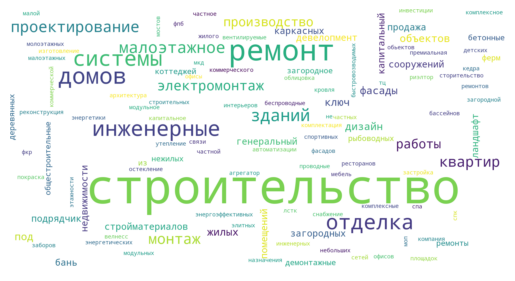

In [90]:
text_raw = " ".join(companies.query('working_direction != "no_data"')['working_direction'])

word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text_raw)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [91]:
pd.concat([companies.working_direction.value_counts(),
           round(companies.working_direction.value_counts() / companies.shape[0], 2)], axis=1)

working_direction  \
no_data                                                         458   
строительство                                                    84   
инженерные системы                                               12   
малоэтажное строительство                                        10   
строительство, ремонт                                             7   
...                                                             ...   
ремонт, комплектация строительных объектов                        1   
строительство частных домов                                       1   
фасады, спк                                                       1   
премиальная покраска, утепление деревянных домов                  1   
строительство частной, коммерческой недвижимости                  1   

                                                  working_direction  
no_data                                                        0.64  
строительство                                                  0.12  
инженерные системы                                             0.02  
малоэтажное строительство                                      0.01  
строительство, ремонт                                          0.01  
...                                                             ...  
ремонт, комплектация строительных объектов                     0.00  
строительство частных домов                                    0.00  
фасады, спк                                                    0.00  
премиальная покраска, утепление деревянных домов               0.00  
строительство частной, коммерческой недвижимости               0.00  

[102 rows x 2 columns]

Добавим столбцы с кодированием по роду деятельсности:

In [92]:
companies['tag_construction'] = np.where(companies.working_direction.str.contains('строит.*'), 1, 0)
companies['tag_repair'] = np.where(companies.working_direction.str.contains('ремонт.*'), 1, 0)
companies['tag_finishing'] = np.where(companies.working_direction.str.contains('отдел.*'), 1, 0)
companies['tag_engineering'] = np.where(companies.working_direction.str.contains('инженер.*'), 1, 0)
companies['tag_electrical'] = np.where(companies.working_direction.str.contains('электромонтаж.*'), 1, 0)
companies['tag_facade'] = np.where(companies.working_direction.str.contains('фасад.*'), 1, 0)
companies['tag_design'] = np.where(companies.working_direction.str.contains('дизайн.*'), 1, 0)
companies['tag_installation'] = np.where(companies.working_direction.str.contains('\Wмонтаж.*'), 1, 0)
companies['tag_trade'] = np.where(companies.working_direction.str.contains('продаж.*'), 1, 0) 
companies['tag_project'] = np.where(companies.working_direction.str.contains('проект.*'), 1, 0) 
companies['tag_production'] = np.where(companies.working_direction.str.contains('производст.*'), 1, 0)

In [93]:
companies

id                                 working_direction  \
19      514                                           no_data   
57      383                                     строительство   
69      495                                           no_data   
75      724                                           no_data   
99      471                                           no_data   
...     ...                                               ...   
11434  7074                                           no_data   
11500  6279                                           no_data   
11547  6256                                           no_data   
15463  5411                                           no_data   
17972  7526  строительство частной, коммерческой недвижимости   

       employer_count_interval          created_at          updated_at  \
19                           1 2019-10-17 12:50:35 2022-12-06 03:45:14   
57                           2 2019-07-26 12:02:45 2023-02-16 12:20:50   
69                           1 2019-10-08 11:54:55 2020-08-24 15:08:34   
75                           1 2020-01-20 09:59:53 2022-12-06 03:44:54   
99                           1 2019-09-24 12:26:57 2022-12-06 03:46:00   
...                        ...                 ...                 ...   
11434                        1 2022-12-20 14:55:45 2024-02-28 22:00:02   
11500                        3 2022-06-27 06:58:20 2024-03-05 22:00:01   
11547                        1 2022-06-21 16:01:17 2024-03-07 22:00:01   
15463                        1 2022-02-16 13:40:50 2024-03-12 08:58:55   
17972                        2 2023-03-14 11:39:43 2024-03-13 10:26:17   

       billing_tariff_id  billing_is_over  tag_construction  tag_repair  \
19                     4             True                 0           0   
57                     7            False                 1           0   
69                     2            False                 0           0   
75                     4             True                 0           0   
99                     7             True                 0           0   
...                  ...              ...               ...         ...   
11434                  7             True                 0           0   
11500                  2             True                 0           0   
11547                  7             True                 0           0   
15463                  9            False                 0           0   
17972                  2            False                 1           0   

       tag_finishing  tag_engineering  tag_electrical  tag_facade  tag_design  \
19                 0                0               0           0           0   
57                 0                0               0           0           0   
69                 0                0               0           0           0   
75                 0                0               0           0           0   
99                 0                0               0           0           0   
...              ...              ...             ...         ...         ...   
11434              0                0               0           0           0   
11500              0                0               0           0           0   
11547              0                0               0           0           0   
15463              0                0               0           0           0   
17972              0                0               0           0           0   

       tag_installation  tag_trade  tag_project  tag_production  
19                    0          0            0               0  
57                    0          0            0               0  
69                    0          0            0               0  
75                    0          0            0               0  
99                    0          0            0               0  
...                 ...        ...          ...             ...  
114

In [94]:
companies.filter(like='tag_').mean().sort_values(ascending=False)

tag_construction    0.252793
tag_repair          0.060056
tag_engineering     0.027933
tag_finishing       0.025140
tag_project         0.012570
tag_installation    0.011173
tag_electrical      0.009777
tag_production      0.008380
tag_facade          0.006983
tag_design          0.005587
tag_trade           0.004190
dtype: float64

25% компаний занимаются стоительством, 6% - ремонтом, приблизительно по 3% инженерными системами и отделкой. Остальные виды
деятельности в пределах 1%.

In [95]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 716 entries, 19 to 17972
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       716 non-null    int64         
 1   working_direction        716 non-null    object        
 2   employer_count_interval  716 non-null    int32         
 3   created_at               716 non-null    datetime64[ns]
 4   updated_at               716 non-null    datetime64[ns]
 5   billing_tariff_id        716 non-null    int32         
 6   billing_is_over          716 non-null    bool          
 7   tag_construction         716 non-null    int32         
 8   tag_repair               716 non-null    int32         
 9   tag_finishing            716 non-null    int32         
 10  tag_engineering          716 non-null    int32         
 11  tag_electrical           716 non-null    int32         
 12  tag_facade               716 non-

In [96]:
companies.describe()

id  employer_count_interval  billing_tariff_id  \
count   716.000000               716.000000          716.00000   
mean   4605.438547                 1.519553            5.02095   
std    2609.494951                 1.031481            3.44927   
min       1.000000                 1.000000            2.00000   
25%    2563.750000                 1.000000            2.00000   
50%    4410.000000                 1.000000            4.00000   
75%    6625.500000                 2.000000            7.00000   
max    9931.000000                 8.000000           21.00000   

       tag_construction  tag_repair  tag_finishing  tag_engineering  \
count        716.000000  716.000000     716.000000       716.000000   
mean           0.252793    0.060056       0.025140         0.027933   
std            0.434917    0.237756       0.156659         0.164896   
min            0.000000    0.000000       0.000000         0.000000   
25%            0.000000    0.000000       0.000000         0.000000   
50%            0.000000    0.000000       0.000000         0.000000   
75%            1.000000    0.000000       0.000000         0.000000   
max            1.000000    1.000000       1.000000         1.000000   

       tag_electrical  tag_facade  tag_design  tag_installation   tag_trade  \
count      716.000000  716.000000  716.000000        716.000000  716.000000   
mean         0.009777    0.006983    0.005587          0.011173    0.004190   
std          0.098461    0.083332    0.074587          0.105185    0.064639   
min          0.000000    0.000000    0.000000          0.000000    0.000000   
25%          0.000000    0.000000    0.000000          0.000000    0.000000   
50%          0.000000    0.000000    0.000000          0.000000    0.000000   
75%          0.000000    0.000000    0.000000          0.000000    0.000000   
max          1.000000    1.000000    1.000000          1.000000    1.000000   

       tag_project  tag_production  
count   716.000000      716.000000  
mean      0.012570        0.008380  
std       0.111486        0.091221  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        0.000000  
75%       0.000000        0.000000  
max       1.000000        1.000000

In [97]:
companies.billing_tariff_id.value_counts(normalize=True)

2     0.448324
7     0.371508
9     0.064246
4     0.050279
3     0.015363
17    0.012570
10    0.009777
6     0.008380
20    0.006983
13    0.005587
19    0.004190
11    0.001397
21    0.001397
Name: billing_tariff_id, dtype: float64

Подавляющее большинство компаний имеет дешевые подписки "Старт" (тариф №7) и "Базовый" (тариф №2).

In [98]:
companies.employer_count_interval.value_counts(normalize=True)

1    0.687151
2    0.203911
3    0.064246
4    0.019553
5    0.012570
8    0.005587
7    0.004190
6    0.002793
Name: employer_count_interval, dtype: float64

Подавляющее большинство компаний имеет не больше 10 сотрудников.

In [99]:
companies.created_at.describe()

count                     716
unique                    716
top       2019-10-17 12:50:35
freq                        1
first     2019-01-23 14:00:51
last      2024-02-07 12:56:09
Name: created_at, dtype: object

Данные о компаниях за период с 23 января 2019 по 7 февраля 2024 года.

In [100]:
companies.billing_is_over.mean()          

0.6717877094972067

Почти у 70% закончилась подписка на момент исследования.

#### Подытог

- Данные о регистрации 723 компаний за 5 лет: с 23 января 2019 по 7 февраля 2024 года (7 компаний было удалено).
- У 70% клиентов на момент исследования подписка не продлена.
- Подавляющее большинство компаний имеет дешевые подписки "Старт" и "Базовый".
- 25% компаний занимаются строительством, 6% - ремонтом, приблизительно по 3% инженерными системами и отделкой. Остальные виды деятельности в пределах 1%.
- Есть разница с количеством уникальных компаний, совершавших платежи (см. предыдущий раздел). Количество компаний, которые выставляли счета - 1841, количество компаний, оплативших счета - 779 (судя по флагу), количество компаний в датасете companies - 723. В связи с тем, что  в companies данные с 23 января 2019 по 7 февраля 2024, а в billings - с 23 июля 2019 по 13 марта 2024 года, появилась неподтвержденная и неопровергнутая гипотеза, что первые полгода сервис функционировал бесплатно.

### Сотрудники

**Описание данных:**

- Id - индекс,
- Company_id -  id компании,
- User_id -  id пользователя,
- Role_id - id роли (должности),
- Created_at - дата создания пользователя,
- Updated_at - дата обновления информации о пользователе,
- Is_deleted - удален ли пользователь,
- Deleted_at - дата удаления.

In [101]:
employees = pd.read_csv('people.csv',  index_col=0)
employees

id  company_id  user_id  role_id  created_at  updated_at  \
2       6601         495      NaN     7133  1570535962  1570535962   
6       7025           1      NaN        1  1594120484  1594120484   
7       7165        1255   1734.0    18085  1595438102  1595439391   
10      7130        1470   1703.0        1  1595234824  1595234824   
17      7163        1492   1731.0        1  1595429211  1598540644   
...      ...         ...      ...      ...         ...         ...   
17048  21900        3611  12987.0    51204  1702455168  1702455197   
17049  21901        3611   7282.0        1  1702455320  1702455320   
17051  21902        7000  12989.0    99113  1702463224  1702463667   
17053  21897        9278  12991.0   131246  1702438738  1702470794   
17054  21904        3518  12992.0        1  1702478483  1702478522   

       is_deleted    deleted_at  
2            True  1.594067e+09  
6            True  1.594120e+09  
7            True  1.633960e+09  
10          False           NaN  
17           True  1.620195e+09  
...           ...           ...  
17048       False           NaN  
17049       False           NaN  
17051       False           NaN  
17053       False           NaN  
17054       False           NaN  

[5095 rows x 8 columns]

In [102]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5095 entries, 2 to 17054
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   updated_at  5095 non-null   int64  
 6   is_deleted  5095 non-null   bool   
 7   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 323.4 KB


In [103]:
employees.shape

(5095, 8)

Количество компаний в датасете:

In [104]:
employees.company_id.nunique()

712

In [105]:
pd.concat([employees.isna().sum(), employees.isna().mean()], axis=1)\
         .rename(columns={0:'amount', 1:'share'}).sort_values(by='share', ascending=False)

amount     share
deleted_at    2915  0.572130
user_id       1282  0.251619
id               0  0.000000
company_id       0  0.000000
role_id          0  0.000000
created_at       0  0.000000
updated_at       0  0.000000
is_deleted       0  0.000000

Количество удаленных сотрудников:

In [106]:
employees.is_deleted.sum(), employees.is_deleted.mean()

(2183, 0.42845927379784104)

Количество действующих сотрудников:

In [107]:
employees.shape[0] - employees.is_deleted.sum()

2912

In [108]:
employees['created_at'] = pd.to_datetime(employees['created_at'], unit='s')
employees['updated_at'] = pd.to_datetime(employees['updated_at'], unit='s')
employees['deleted_at'] = pd.to_datetime(employees['deleted_at'], unit='s')

In [109]:
pd.crosstab(employees.deleted_at.isna(), employees.is_deleted)

is_deleted  False  True 
deleted_at              
False           0   2180
True         2912      3

In [110]:
employees.query('deleted_at.isna() & ~is_deleted')

id  company_id  user_id  role_id          created_at  \
10      7130        1470   1703.0        1 2020-07-20 08:47:04   
20      7034        1317   1626.0    18955 2020-07-08 15:30:41   
41      7053        1184   1659.0    17078 2020-07-10 13:14:01   
45      7080         116   1668.0     1680 2020-07-14 05:48:34   
49      6763         366    882.0     5273 2020-02-04 09:01:56   
...      ...         ...      ...      ...                 ...   
17048  21900        3611  12987.0    51204 2023-12-13 08:12:48   
17049  21901        3611   7282.0        1 2023-12-13 08:15:20   
17051  21902        7000  12989.0    99113 2023-12-13 10:27:04   
17053  21897        9278  12991.0   131246 2023-12-13 03:38:58   
17054  21904        3518  12992.0        1 2023-12-13 14:41:23   

               updated_at  is_deleted deleted_at  
10    2020-07-20 08:47:04       False        NaT  
20    2020-07-09 05:47:48       False        NaT  
41    2020-07-13 14:33:17       False        NaT  
45    2020-07-15 06:50:25       False        NaT  
49    2020-02-04 09:01:56       False        NaT  
...                   ...         ...        ...  
17048 2023-12-13 08:13:17       False        NaT  
17049 2023-12-13 08:15:20       False        NaT  
17051 2023-12-13 10:34:27       False        NaT  
17053 2023-12-13 12:33:14       False        NaT  
17054 2023-12-13 14:42:02       False        NaT  

[2912 rows x 8 columns]

In [111]:
employees.query('deleted_at.isna() & is_deleted')

id  company_id  user_id  role_id          created_at  \
21    6749         667      NaN     9614 2020-01-24 14:45:37   
22    6740         667      NaN     9614 2020-01-16 12:56:49   
3506  6255          30      NaN      437 2019-01-31 14:18:05   

              updated_at  is_deleted deleted_at  
21   2020-01-24 14:45:37        True        NaT  
22   2020-01-16 12:56:49        True        NaT  
3506 2019-01-31 14:18:05        True        NaT

Пропуски в графе с датой удаления сотрудника соответствуют флагу is_deleted в положении False, то есть, сотрудник не удален, поэтому нет даты (за исключением трех сотрудников двух компаний). 

In [112]:
pd.crosstab(employees.deleted_at.isna(), employees.user_id.isna())

user_id     False  True 
deleted_at              
False        1203    977
True         2610    305

In [113]:
pd.crosstab(employees.is_deleted, employees.user_id.isna())

user_id     False  True 
is_deleted              
False        2610    302
True         1203    980

In [114]:
employees.query('user_id.isna() & ~is_deleted')

id  company_id  user_id  role_id          created_at  \
78      7168         738      NaN    21509 2020-07-23 08:56:45   
121     7172        1442      NaN    20707 2020-07-23 09:29:12   
164     8802        2626      NaN    37322 2021-01-19 13:20:56   
204     7173        1442      NaN    20709 2020-07-23 09:30:00   
216     7202        1250      NaN    18014 2020-07-27 11:15:39   
...      ...         ...      ...      ...                 ...   
16932  21798        6341      NaN    89767 2023-12-05 22:29:25   
16961  21826        9394      NaN        1 2023-12-07 09:16:03   
16999  21851        8789      NaN   124383 2023-12-08 04:54:43   
17001  21854        7269      NaN   102911 2023-12-08 06:03:11   
17027  21879        9132      NaN        1 2023-12-11 11:06:47   

               updated_at  is_deleted deleted_at  
78    2020-07-23 08:56:45       False        NaT  
121   2020-07-23 09:29:12       False        NaT  
164   2021-01-19 13:20:56       False        NaT  
204   2020-07-23 09:30:00       False        NaT  
216   2020-07-27 11:15:39       False        NaT  
...                   ...         ...        ...  
16932 2023-12-05 22:29:25       False        NaT  
16961 2023-12-07 09:16:03       False        NaT  
16999 2023-12-08 04:54:43       False        NaT  
17001 2023-12-08 06:03:11       False        NaT  
17027 2023-12-11 11:06:47       False        NaT  

[302 rows x 8 columns]

Распределение пропусков в колонке user_id по времени:

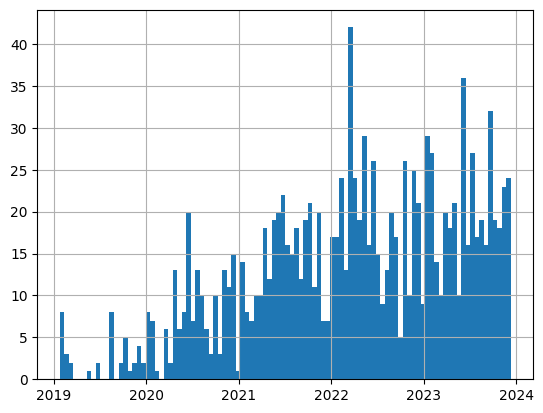

In [115]:
employees.query('user_id.isna()').created_at.hist(bins=100);

Пропуски в колонке user_id (25%) логического объяснения не имеют. По-видимому, они полностью случайны и вызваны техническим сбоем. Так же имеется пик в 2022 году.

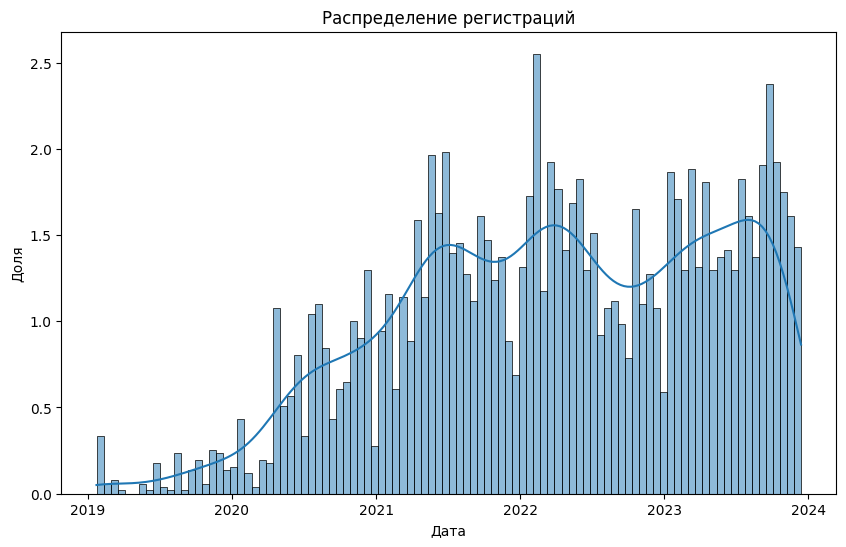

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(employees.created_at, kde=True, stat='percent', bins=100)
plt.title('Распределение регистраций')
plt.xlabel('Дата')
plt.ylabel('Доля');

Действительно, на 2022 год приходятся пик регистраций в сервисе.

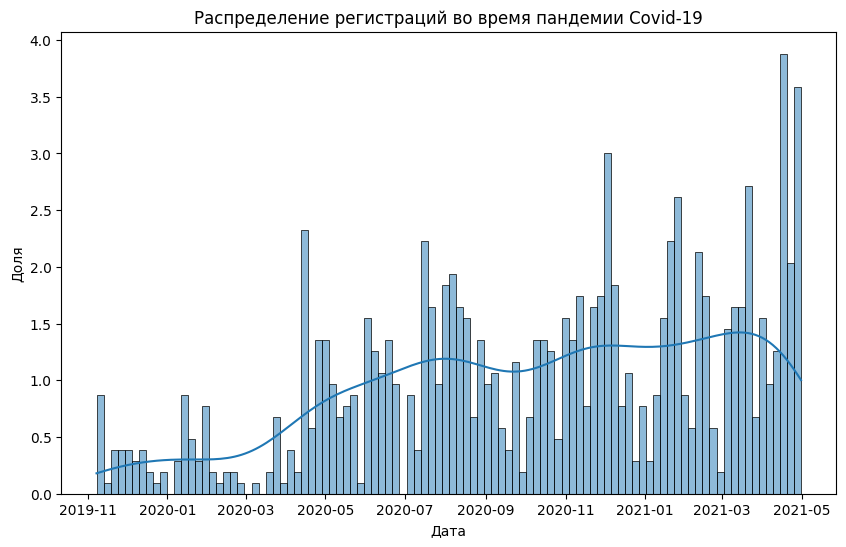

In [117]:
plt.figure(figsize=(10,6))
sns.histplot(employees.query('"2019-11" < created_at < "2021-05"').created_at, kde=True, stat='percent', bins=100)
plt.title('Распределение регистраций во время пандемии Covid-19')
plt.xlabel('Дата')
plt.ylabel('Доля');

Пандемия совпала по времени с ростом регистраций, возможно, способствовала популярности сервиса из-за введенных ограничений.

In [118]:
employees.created_at.describe()

count                    5095
unique                   5019
top       2022-08-31 12:43:11
freq                        5
first     2019-01-23 14:00:51
last      2023-12-13 14:41:23
Name: created_at, dtype: object

### Промежуточный вывод

Не совпадают периоды и количество компаний в датасетах:

<table>
    <tr>
        <td><b>Датасет</b></td>
        <td><b>Период</b></td>
        <td><b>Число компаний</b></td>
    </tr>
    <tr>
        <td>activities</td>
        <td> с января 2019 по март 2024 года</td>
        <td>716</td>
    </tr>
    <tr>
        <td>billings</td>
        <td> с 23 июля 2019 по 15 марта 2024 года</td>
        <td>1841</td>
    </tr>
    <tr>
        <td>payed_billings</td>
        <td> с 23 июля 2019 по 15 марта 2024 года</td>
        <td>878</td>
    </tr>
        <tr>
        <td>companies</td>
        <td> с 23 января 2019 по 7 февраля 2024 года</td>
        <td>716 (7 компаний были удалены)</td>
    </tr>
    <tr>
        <td>employees</td>
        <td> с 23 января 2019 по 13 декабря 2023 года</td>
        <td>712</td>
    </tr>
</table>   

Нет данных о платежах за полгода с 23 января по 23 июля. Нет информации, был ли сервис бесплатным в течение первого полугодия.

С учетом специфики бизнеса и сервиса, а именно:
- не очевидна механика выставления и оплаты счетов,
- не очевидна связь между флагом оплаты и датой оплаты,
- не очевида природа пропусков,
- есть разница в датах и количествах уникальных компаний в датасетах,

кажется целесообразным определить целевую переменную churn, используя платежную статистику (неточностями в виде подарочных и акционных месяцев пренебрежем).

## Подготовка к анализу данных

In [119]:
payed_billings.query('company_id == 2014')

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
5     3099     2330        2014                  7  2021-01-29      True   
132   3333     2330        2014                  7  2021-03-01      True   
1141  2630     2330        2014                  7  2020-11-28      True   
1200  2936     2330        2014                  7  2020-12-28      True   

              created_at          updated_at  billing_tariff_price_id comment  \
5    2020-12-29 09:16:17 2020-12-29 09:18:24                       20     NaN   
132  2021-02-01 11:32:41 2021-02-01 11:34:30                       20     NaN   
1141 2020-10-27 07:37:12 2020-10-27 07:38:37                       20     NaN   
1200 2020-11-27 07:33:24 2020-11-27 07:34:29                       20     NaN   

                pay_date  
5    2020-12-29 09:18:24  
132  2021-02-01 11:34:30  
1141                 NaT  
1200                 NaT

In [120]:
companies.query('id == 2014')

id working_direction  employer_count_interval          created_at  \
1878  2014     строительство                        1 2020-10-13 07:27:45   

              updated_at  billing_tariff_id  billing_is_over  \
1878 2022-12-06 03:46:39                  7             True   

      tag_construction  tag_repair  tag_finishing  tag_engineering  \
1878                 1           0              0                0   

      tag_electrical  tag_facade  tag_design  tag_installation  tag_trade  \
1878               0           0           0                 0          0   

      tag_project  tag_production  
1878            0               0

Поле updated_at в таблице companies не соответствует сроку действия подписки, некоторые компании обновляют информацию о себе и после окончания подписки.

В поле billing_tariff_id фиксируется последний действующий тариф.

Добавим целевой признак оттока. Для компаний, у которых самая свежая подписка заканчивается позже срока исследования, 28 марта 2024 года, установим признак равным 0. Для остальных - единице.

In [121]:
payed_billings['churn'] = np.where(payed_billings.payed_until < '2024-03-28', 1, 0)

In [122]:
payed_billings['churn'] = payed_billings.groupby('company_id')['churn'].transform(lambda x: x.min() * x.max())

payed_billings.head(20)

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
1   3051     2861        2474                  7  2021-12-22      True   
4   3062     1074         926                  3  2021-01-30      True   
5   3099     2330        2014                  7  2021-01-29      True   
6   3098     2707        2353                  2  2021-06-30      True   
7   3119      407         366                  4  2021-02-08      True   
9   3125     2352        2035                  7  2021-03-01      True   
11  3107     1134         981                  7  2021-02-11      True   
13  4854     4451        3633                  7  2021-08-13      True   
15  3057     2920        2507                  4  2021-06-23     False   
17  3124      531         483                  4  2021-02-11      True   
20  4309     3903        3244                  7  2022-07-15     False   
21  5026     4857        3917                  2  2021-09-06      True   
27  4437     4007        3323                 11  2021-12-28      True   
33  3061     1902        1645                  2  2021-03-30      True   
34  3132     2290        1975                  2  2021-01-19      True   
35  4176     4007        3323                  7  2021-12-28     False   
36  3373     3245        2766                  2  2021-06-11      True   
38  4447     2566        2227                  7  2021-07-14      True   
41  4450     3927        3263                  7  2021-12-15      True   
42  4466       24          21                  4  2021-07-15      True   

            created_at          updated_at  billing_tariff_price_id  \
1  2020-12-22 08:36:02 2020-12-22 08:36:21                       23   
4  2020-12-24 12:47:52 2020-12-25 12:34:34                        9   
5  2020-12-29 09:16:17 2020-12-29 09:18:24                       20   
6  2020-12-29 07:31:09 2020-12-30 11:48:13                        7   
7  2021-01-08 05:50:35 2021-01-08 05:51:20                       13   
9  2021-01-11 05:49:28 2021-01-11 05:51:25                       20   
11 2020-12-30 08:38:35 2021-02-10 06:46:28                       20   
13 2021-07-21 09:04:55 2021-08-11 10:55:48                       23   
15 2020-12-23 10:01:04 2020-12-23 12:05:38                       15   
17 2021-01-11 05:14:25 2021-01-11 05:15:30                       13   
20 2021-05-31 15:13:42 2021-05-31 15:14:06                       23   
21 2021-08-05 14:35:46 2021-09-06 13:24:24                       35   
27 2021-06-11 12:15:24 2021-06-11 12:17:08                       38   
33 2020-12-24 09:27:21 2020-12-28 13:43:51                        6   
34 2021-01-12 08:36:08 2021-01-12 08:40:57                        7   
35 2021-05-19 12:13:25 2021-06-11 12:17:33                       22   
36 2021-02-08 13:15:01 2021-06-11 13:59:29                        7   
38 2021-06-14 09:07:20 2021-06-14 09:09:29                       20   
41 2021-06-15 04:30:20 2021-06-15 12:25:44                       22   
42 2021-06-15 17:20:47 2021-06-15 17:22:34                       13   

                                              comment            pay_date  \
1                                                 NaN 2020-12-22 08:36:21   
4                                                 NaN 2020-12-29 00:00:00   
5                                                 NaN 2020-12-29 09:18:24   
6                               30,12 - пришла оплата 2020-12-29 00:00:00   
7                                                 NaN 2021-01-08 05:51:20   
9                                                 NaN 2021-01-11 05:51:25   
11               попросил продлить на 1 день, оплатит 2020-12-30 00:00:00   
13        оплата пришла 5,08\r\nПереоткрыла другой лк 2021-08-05 00:00:00   
15  23,12 - оплатили, ожидаем в январе сообщение о... 2020-12-25 00:00:00   
17                                                NaN 2021-01-11 05:15:30   
20                                                NaN 2021-05-31 00:00:00   
21                   24 + 4 мес\r\n

In [123]:
payed_billings['churn'].mean()

0.7110945644080418

Более 70% хотя бы раз плативших компаний ушли в отток.

Добавим количество платежей:

In [124]:
freq = payed_billings.company_id.value_counts().reset_index()\
                     .rename(columns={'index':'company_id', 'company_id':'payments_frequency'})

In [125]:
payed_billings = payed_billings.merge(freq, how='left')

In [126]:
payed_billings = payed_billings.sort_values(by=['company_id', 'payed_until']).reset_index(drop= True)
payed_billings

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
0       380        1           1                  3  2020-11-29      True   
1       496        6           5                  2  2019-10-20      True   
2       701        6           5                  2  2019-12-31      True   
3      1422        6           5                  2  2021-11-30      True   
4      5353        6           5                  7  2022-08-14      True   
...     ...      ...         ...                ...         ...       ...   
1338  13522    13320        9802                 19  2025-04-28      True   
1339  13516    13336        9815                  2  2025-03-27      True   
1340  13259    13338        9817                  7  2025-03-01      True   
1341  14365    13378        9841                  7  2025-03-13     False   
1342  13442    13499        9931                  2  2025-03-22      True   

              created_at          updated_at  billing_tariff_price_id  \
0    2019-07-23 15:48:05 2020-07-25 09:37:48                        9   
1    2019-09-13 15:11:11 2019-10-17 14:40:47                        1   
2    2019-11-28 07:08:05 2019-11-29 10:22:14                        1   
3    2020-06-03 07:18:16 2021-11-12 07:05:23                        1   
4    2021-09-02 13:33:41 2022-07-21 08:56:04                       23   
...                  ...                 ...                      ...   
1338 2024-02-28 12:17:47 2024-02-28 12:20:04                       16   
1339 2024-02-27 10:45:26 2024-02-27 10:46:00                        8   
1340 2024-01-25 07:27:30 2024-01-29 13:13:57                       23   
1341 2024-03-12 17:52:29 2024-03-12 17:53:29                       23   
1342 2024-02-16 11:42:21 2024-02-21 12:08:11                        8   

                       comment            pay_date  churn  payments_frequency  
0                          NaN                 NaT      1                   1  
1                          NaN                 NaT      0                   6  
2                          NaN                 NaT      0                   6  
3                          NaN                 NaT      0                   6  
4                          NaN 2022-07-20 00:00:00      0                   6  
...                        ...                 ...    ...                 ...  
1338                      12+2 2024-02-28 00:00:00      0                   1  
1339                      12+1 2024-02-27 10:46:00      0                   1  
1340  29,01,24- активация 12+1 2024-01-29 13:13:57      0                   1  
1341                       NaN 2024-03-15 00:00:00      0                   1  
1342             21.02.24 12+1 2024-02-21 12:08:11      0                   1  

[1343 rows x 13 columns]

In [127]:
payed_billings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       1343 non-null   int64         
 1   user_id                  1343 non-null   int64         
 2   company_id               1343 non-null   int64         
 3   billing_tariff_id        1343 non-null   int64         
 4   payed_until              1343 non-null   datetime64[ns]
 5   is_payed                 1343 non-null   bool          
 6   created_at               1343 non-null   datetime64[ns]
 7   updated_at               1343 non-null   datetime64[ns]
 8   billing_tariff_price_id  1343 non-null   int32         
 9   comment                  726 non-null    object        
 10  pay_date                 1098 non-null   datetime64[ns]
 11  churn                    1343 non-null   int64         
 12  payments_frequency       1343 non-

Создадим новый датафрейм, добавим общую длительность подписок на каждом из тарифов:

In [128]:
df = payed_billings[['company_id', 'billing_tariff_id', 'payed_until', 'created_at', 'churn', 'payments_frequency']]\
                    .copy(deep=False)

In [129]:
df['diff_date'] = df['payed_until'] - df['created_at']
df['prolong'] = df.sort_values(by=['company_id', 'payed_until'])\
                  .groupby('company_id')['payed_until'].diff()#.shift(-1)
df['prolong'].fillna(df.diff_date, inplace=True)

df.sort_values(by=['company_id', 'payed_until'])

company_id  billing_tariff_id payed_until          created_at  churn  \
0              1                  3  2020-11-29 2019-07-23 15:48:05      1   
1              5                  2  2019-10-20 2019-09-13 15:11:11      0   
2              5                  2  2019-12-31 2019-11-28 07:08:05      0   
3              5                  2  2021-11-30 2020-06-03 07:18:16      0   
4              5                  7  2022-08-14 2021-09-02 13:33:41      0   
...          ...                ...         ...                 ...    ...   
1338        9802                 19  2025-04-28 2024-02-28 12:17:47      0   
1339        9815                  2  2025-03-27 2024-02-27 10:45:26      0   
1340        9817                  7  2025-03-01 2024-01-25 07:27:30      0   
1341        9841                  7  2025-03-13 2024-03-12 17:52:29      0   
1342        9931                  2  2025-03-22 2024-02-16 11:42:21      0   

      payments_frequency         diff_date           prolong  
0                      1 494 days 08:11:55 494 days 08:11:55  
1                      6  36 days 08:48:49  36 days 08:48:49  
2                      6  32 days 16:51:55  72 days 00:00:00  
3                      6 544 days 16:41:44 700 days 00:00:00  
4                      6 345 days 10:26:19 257 days 00:00:00  
...                  ...               ...               ...  
1338                   1 424 days 11:42:13 424 days 11:42:13  
1339                   1 393 days 13:14:34 393 days 13:14:34  
1340                   1 400 days 16:32:30 400 days 16:32:30  
1341                   1 365 days 06:07:31 365 days 06:07:31  
1342                   1 399 days 12:17:39 399 days 12:17:39  

[1343 rows x 8 columns]

In [130]:
df.isna().sum()

company_id            0
billing_tariff_id     0
payed_until           0
created_at            0
churn                 0
payments_frequency    0
diff_date             0
prolong               0
dtype: int64

In [131]:
df.drop(['payed_until', 'created_at', 'diff_date'], axis=1, inplace=True)

Добавим категории по дороговизне тарифов:

In [132]:
df.query('billing_tariff_id == 6')

company_id  billing_tariff_id  churn  payments_frequency  \
27          108                  6      1                   2   
62          419                  6      1                   1   
159         845                  6      1                   2   
160         845                  6      1                   2   
282        1451                  6      1                   1   
299        1568                  6      1                   1   
441        2459                  6      1                   1   
506        2906                  6      1                   1   
585        3244                  6      1                  19   
682        3640                  6      0                   2   
683        3640                  6      0                   2   

              prolong  
27  183 days 12:02:50  
62  184 days 09:35:36  
159 366 days 17:37:38  
160 581 days 00:00:00  
282 366 days 07:29:11  
299 666 days 11:47:12  
441 760 days 17:06:32  
506 364 days 12:16:06  
585 355 days 00:00:00  
682 379 days 04:44:49  
683 727 days 00:00:00

Так как у нас нет информации, к какой группе относился тариф 6, удалим эти записи из таблицы:

In [133]:
df = df.query('billing_tariff_id != 6')

Расшифровка:

- 4 - профи,
- 3 - бизнес,
- 2 - базовый,
- 1 - старт.

In [134]:
tariff_dict = {3:4,
               10:4,
               13:4,
               21:4,
               9:3,
               20:3,
               2:2,
               17:2,
               4:1, 
               7:1,
               8:1,
               11:1,
               19:1
             }

In [135]:
df['cat_tariff'] = df['billing_tariff_id'].map(tariff_dict)

In [136]:
df.sort_values(by='company_id').head(30)

company_id  billing_tariff_id  churn  payments_frequency  \
0            1                  3      1                   1   
1            5                  2      0                   6   
2            5                  2      0                   6   
3            5                  2      0                   6   
4            5                  7      0                   6   
5            5                  3      0                   6   
6            5                 17      0                   6   
7           11                 11      1                   2   
8           11                  9      1                   2   
18          21                  7      1                  10   
17          21                  7      1                  10   
16          21                  4      1                  10   
15          21                  4      1                  10   
14          21                  4      1                  10   
11          21                  4      1                  10   
12          21                  4      1                  10   
10          21                  4      1                  10   
9           21                  4      1                  10   
13          21                  4      1                  10   
24          30                  3      1                   8   
26          30                  4      1                   8   
25          30                  4      1                   8   
23          30                  4      1                   8   
20          30                  4      1                   8   
21          30                  4      1                   8   
19          30                  4      1                   8   
22          30                  4      1                   8   
28         108                  2      1                   2   
29         116                  2      1                   3   
30         116                  7      1                   3   

             prolong  cat_tariff  
0  494 days 08:11:55           4  
1   36 days 08:48:49           2  
2   72 days 00:00:00           2  
3  700 days 00:00:00           2  
4  257 days 00:00:00           1  
5  182 days 00:00:00           4  
6  646 days 00:00:00           2  
7  183 days 07:52:25           1  
8  180 days 00:00:00           3  
18  27 days 00:00:00           1  
17 390 days 00:00:00           1  
16 231 days 00:00:00           1  
15  33 days 00:00:00           1  
14 266 days 00:00:00           1  
11 116 days 00:00:00           1  
12  33 days 00:00:00           1  
10  41 days 00:00:00           1  
9   31 days 08:34:41           1  
13  46 days 00:00:00           1  
24  90 days 00:00:00           4  
26  92 days 00:00:00           1  
25  92 days 00:00:00           1  
23  96 days 00:00:00           1  
20  30 days 00:00:00           1  
21  91 days 00:00:00           1  
19  32 days 11:54:11           1  
22 184 days 00:00:00           1  
28 768 days 00:00:00           2  
29   6 days 13:43:46           2  
30  69 days 00:00:00           1

Посчитаем общую длительность подписки на каждом тарифе и полную длительность за все время:

In [137]:
df['tariff_sum'] = df.groupby(['company_id', 'billing_tariff_id']).prolong.transform('sum')
df['total_prolong'] = df.groupby('company_id').prolong.transform('sum')
df.head(10)

company_id  billing_tariff_id  churn  payments_frequency           prolong  \
0           1                  3      1                   1 494 days 08:11:55   
1           5                  2      0                   6  36 days 08:48:49   
2           5                  2      0                   6  72 days 00:00:00   
3           5                  2      0                   6 700 days 00:00:00   
4           5                  7      0                   6 257 days 00:00:00   
5           5                  3      0                   6 182 days 00:00:00   
6           5                 17      0                   6 646 days 00:00:00   
7          11                 11      1                   2 183 days 07:52:25   
8          11                  9      1                   2 180 days 00:00:00   
9          21                  4      1                  10  31 days 08:34:41   

   cat_tariff        tariff_sum      total_prolong  
0           4 494 days 08:11:55  494 days 08:11:55  
1           2 808 days 08:48:49 1893 days 08:48:49  
2           2 808 days 08:48:49 1893 days 08:48:49  
3           2 808 days 08:48:49 1893 days 08:48:49  
4           1 257 days 00:00:00 1893 days 08:48:49  
5           4 182 days 00:00:00 1893 days 08:48:49  
6           2 646 days 00:00:00 1893 days 08:48:49  
7           1 183 days 07:52:25  363 days 07:52:25  
8           3 180 days 00:00:00  363 days 07:52:25  
9           1 797 days 08:34:41 1214 days 08:34:41

Количество тарифов, которые перебирал клиент:

In [138]:
df['tariff_nunique'] = df.groupby('company_id').billing_tariff_id.transform('nunique')
df

company_id  billing_tariff_id  churn  payments_frequency  \
0              1                  3      1                   1   
1              5                  2      0                   6   
2              5                  2      0                   6   
3              5                  2      0                   6   
4              5                  7      0                   6   
...          ...                ...    ...                 ...   
1338        9802                 19      0                   1   
1339        9815                  2      0                   1   
1340        9817                  7      0                   1   
1341        9841                  7      0                   1   
1342        9931                  2      0                   1   

               prolong  cat_tariff        tariff_sum      total_prolong  \
0    494 days 08:11:55           4 494 days 08:11:55  494 days 08:11:55   
1     36 days 08:48:49           2 808 days 08:48:49 1893 days 08:48:49   
2     72 days 00:00:00           2 808 days 08:48:49 1893 days 08:48:49   
3    700 days 00:00:00           2 808 days 08:48:49 1893 days 08:48:49   
4    257 days 00:00:00           1 257 days 00:00:00 1893 days 08:48:49   
...                ...         ...               ...                ...   
1338 424 days 11:42:13           1 424 days 11:42:13  424 days 11:42:13   
1339 393 days 13:14:34           2 393 days 13:14:34  393 days 13:14:34   
1340 400 days 16:32:30           1 400 days 16:32:30  400 days 16:32:30   
1341 365 days 06:07:31           1 365 days 06:07:31  365 days 06:07:31   
1342 399 days 12:17:39           2 399 days 12:17:39  399 days 12:17:39   

      tariff_nunique  
0                  1  
1                  4  
2                  4  
3                  4  
4                  4  
...              ...  
1338               1  
1339               1  
1340               1  
1341               1  
1342               1  

[1332 rows x 9 columns]

Коэффициент доходности:

Посчитаем двумя способами:

1) $$\sum{(l * t)}$$

Суммируем все произведения длительности каждого тарифа и номера группы, к которой тариф относится.

2) $$\frac{\sum{(l * t)}} {n}$$

Дополнительно делим полученную сумму на количество платежей.

l - длительность тарифа, t - группа тарифов (1-4), n - количество платежей, т.е., продлений подписки.

In [139]:
df['income_coef'] = df['prolong'].dt.days.astype(float) * df['cat_tariff']
df['income_coef'] = df.groupby('company_id').income_coef.transform(sum)

scaler = StandardScaler()

#df['income_coef'] = np.log(df['income_coef'] )                      -- для интерпретируемости оставим значения как есть!
#df.income_coef = scaler.fit_transform(df.income_coef.to_numpy().reshape(-1, 1)) 


df['avg_income_coef'] = df['income_coef'] / df['payments_frequency']
df.head(15)

company_id  billing_tariff_id  churn  payments_frequency  \
0            1                  3      1                   1   
1            5                  2      0                   6   
2            5                  2      0                   6   
3            5                  2      0                   6   
4            5                  7      0                   6   
5            5                  3      0                   6   
6            5                 17      0                   6   
7           11                 11      1                   2   
8           11                  9      1                   2   
9           21                  4      1                  10   
10          21                  4      1                  10   
11          21                  4      1                  10   
12          21                  4      1                  10   
13          21                  4      1                  10   
14          21                  4      1                  10   

             prolong  cat_tariff        tariff_sum      total_prolong  \
0  494 days 08:11:55           4 494 days 08:11:55  494 days 08:11:55   
1   36 days 08:48:49           2 808 days 08:48:49 1893 days 08:48:49   
2   72 days 00:00:00           2 808 days 08:48:49 1893 days 08:48:49   
3  700 days 00:00:00           2 808 days 08:48:49 1893 days 08:48:49   
4  257 days 00:00:00           1 257 days 00:00:00 1893 days 08:48:49   
5  182 days 00:00:00           4 182 days 00:00:00 1893 days 08:48:49   
6  646 days 00:00:00           2 646 days 00:00:00 1893 days 08:48:49   
7  183 days 07:52:25           1 183 days 07:52:25  363 days 07:52:25   
8  180 days 00:00:00           3 180 days 00:00:00  363 days 07:52:25   
9   31 days 08:34:41           1 797 days 08:34:41 1214 days 08:34:41   
10  41 days 00:00:00           1 797 days 08:34:41 1214 days 08:34:41   
11 116 days 00:00:00           1 797 days 08:34:41 1214 days 08:34:41   
12  33 days 00:00:00           1 797 days 08:34:41 1214 days 08:34:41   
13  46 days 00:00:00           1 797 days 08:34:41 1214 days 08:34:41   
14 266 days 00:00:00           1 797 days 08:34:41 1214 days 08:34:41   

    tariff_nunique  income_coef  avg_income_coef  
0                1       1976.0      1976.000000  
1                4       3893.0       648.833333  
2                4       3893.0       648.833333  
3                4       3893.0       648.833333  
4                4       3893.0       648.833333  
5                4       3893.0       648.833333  
6                4       3893.0       648.833333  
7                2        723.0       361.500000  
8                2        723.0       361.500000  
9                2       1214.0       121.400000  
10               2       1214.0       121.400000  
11               2       1214.0       121.400000  
12               2       1214.0       121.400000  
13               2       1214.0       121.400000  
14               2       1214.0       121.400000

In [140]:
t_delta = ['prolong', 'tariff_sum', 'total_prolong']

for col in t_delta:
    df[col] = df[col].dt.days.astype(float)

Добавим данные из таблицы companies:

In [141]:
tmp_companies = companies[['id', 'working_direction', 'employer_count_interval']].copy()
tmp_companies.rename(columns={'id':'company_id'}, inplace=True)
tmp_companies

company_id                                 working_direction  \
19            514                                           no_data   
57            383                                     строительство   
69            495                                           no_data   
75            724                                           no_data   
99            471                                           no_data   
...           ...                                               ...   
11434        7074                                           no_data   
11500        6279                                           no_data   
11547        6256                                           no_data   
15463        5411                                           no_data   
17972        7526  строительство частной, коммерческой недвижимости   

       employer_count_interval  
19                           1  
57                           2  
69                           1  
75                           1  
99                           1  
...                        ...  
11434                        1  
11500                        3  
11547                        1  
15463                        1  
17972                        2  

[716 rows x 3 columns]

Так как непонятна причина, вызвавшая большую разницу в числе уникальных компаний в датасетах companies и billings, было принято окончательное решение руководствоваться информацией из таблицы companies и, соответственно, делать inner join, а не left:

In [142]:
df = df.merge(tmp_companies)
df

company_id  billing_tariff_id  churn  payments_frequency  prolong  \
0              1                  3      1                   1    494.0   
1             21                  4      1                  10     31.0   
2             21                  4      1                  10     41.0   
3             21                  4      1                  10    116.0   
4             21                  4      1                  10     33.0   
...          ...                ...    ...                 ...      ...   
1078        9777                 17      0                   1    424.0   
1079        9802                 19      0                   1    424.0   
1080        9815                  2      0                   1    393.0   
1081        9817                  7      0                   1    400.0   
1082        9931                  2      0                   1    399.0   

      cat_tariff  tariff_sum  total_prolong  tariff_nunique  income_coef  \
0              4       494.0          494.0               1       1976.0   
1              1       797.0         1214.0               2       1214.0   
2              1       797.0         1214.0               2       1214.0   
3              1       797.0         1214.0               2       1214.0   
4              1       797.0         1214.0               2       1214.0   
...          ...         ...            ...             ...          ...   
1078           2       424.0          424.0               1        848.0   
1079           1       424.0          424.0               1        424.0   
1080           2       393.0          393.0               1        786.0   
1081           1       400.0          400.0               1        400.0   
1082           2       399.0          399.0               1        798.0   

      avg_income_coef                  working_direction  \
0              1976.0                      строительство   
1               121.4                строительство домов   
2               121.4                строительство домов   
3               121.4                строительство домов   
4               121.4                строительство домов   
...               ...                                ...   
1078            848.0                            no_data   
1079            424.0                            no_data   
1080            786.0  строительство объектов энергетики   
1081            400.0                            no_data   
1082            798.0                      строительство   

      employer_count_interval  
0                           3  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
1078                        1  
1079                        1  
1080                        3  
1081                        1  
1082                        1  

[1083 rows x 13 columns]

In [143]:
df['avg_cat_tariff'] = df.groupby('company_id').cat_tariff.transform('mean')
df.drop('billing_tariff_id', axis=1, inplace=True)
df.head(20)

company_id  churn  payments_frequency  prolong  cat_tariff  tariff_sum  \
0            1      1                   1    494.0           4       494.0   
1           21      1                  10     31.0           1       797.0   
2           21      1                  10     41.0           1       797.0   
3           21      1                  10    116.0           1       797.0   
4           21      1                  10     33.0           1       797.0   
5           21      1                  10     46.0           1       797.0   
6           21      1                  10    266.0           1       797.0   
7           21      1                  10     33.0           1       797.0   
8           21      1                  10    231.0           1       797.0   
9           21      1                  10    390.0           1       417.0   
10          21      1                  10     27.0           1       417.0   
11          30      1                   8     32.0           1       617.0   
12          30      1                   8     30.0           1       617.0   
13          30      1                   8     91.0           1       617.0   
14          30      1                   8    184.0           1       617.0   
15          30      1                   8     96.0           1       617.0   
16          30      1                   8     90.0           4        90.0   
17          30      1                   8     92.0           1       617.0   
18          30      1                   8     92.0           1       617.0   
19         108      1                   2    768.0           2       768.0   

    total_prolong  tariff_nunique  income_coef  avg_income_coef  \
0           494.0               1       1976.0         1976.000   
1          1214.0               2       1214.0          121.400   
2          1214.0               2       1214.0          121.400   
3          1214.0               2       1214.0          121.400   
4          1214.0               2       1214.0          121.400   
5          1214.0               2       1214.0          121.400   
6          1214.0               2       1214.0          121.400   
7          1214.0               2       1214.0          121.400   
8          1214.0               2       1214.0          121.400   
9          1214.0               2       1214.0          121.400   
10         1214.0               2       1214.0          121.400   
11          707.0               2        977.0          122.125   
12          707.0               2        977.0          122.125   
13          707.0               2        977.0          122.125   
14          707.0               2        977.0          122.125   
15          707.0               2        977.0          122.125   
16          707.0               2        977.0          122.125   
17          707.0               2        977.0          122.125   
18          707.0               2        977.0          122.125   
19          768.0               1       1536.0          768.000   

          working_direction  employer_count_interval  avg_cat_tariff  
0             строительство                        3           4.000  
1       строительство домов                        1           1.000  
2       строительство домов                        1           1.000  
3       строительство домов                        1           1.000  
4       строительство домов                        1           1.000  
5       строительство домов                        1           1.000  
6       строительство домов                        1           1.000  
7       строительство домов                        1           1.000  
8       строительство домов                        1           1.000  
9       строительство домов                        1           1.000  
10      строительство домов                        1           1.000  
11  кровля, фасады, отделка                        1           1.375  
12  кровля, фасады, отделка       

Сократим данные, оставив лишь последние записи для каждой компании:

In [144]:
df = df[['company_id', 'payments_frequency', 'tariff_nunique','cat_tariff', 'avg_cat_tariff',\
         'prolong', 'tariff_sum', 'total_prolong', 'income_coef', 'avg_income_coef', 'employer_count_interval',\
         'working_direction', 'churn']]
df.drop_duplicates('company_id', keep='last', inplace=True)
df = df.rename(columns={'cat_tariff':'last_cat_tariff', 'prolong':'last_prolong', 'tariff_sum':'last_tariff_total'})
df.head(20)

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
0            1                   1               1                4   
10          21                  10               2                1   
18          30                   8               2                1   
19         108                   2               1                2   
22         116                   3               2                1   
23         218                   1               1                1   
25         257                   2               2                2   
26         303                   1               1                2   
32         309                   6               1                1   
33         336                   1               1                1   
36         344                   3               1                1   
37         347                   1               1                1   
46         366                   9               2                1   
47         383                   1               1                1   
48         408                   1               1                2   
49         421                   1               1                2   
58         430                   9               4                1   
59         457                   1               1                1   
61         468                   2               1                1   
62         471                   1               1                1   

    avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
0         4.000000         494.0              494.0          494.0   
10        1.000000          27.0              417.0         1214.0   
18        1.375000          92.0              617.0          707.0   
19        2.000000         768.0              768.0          768.0   
22        1.333333         189.0              258.0          264.0   
23        1.000000         102.0              102.0          102.0   
25        1.500000         145.0              145.0          193.0   
26        2.000000         364.0              364.0          364.0   
32        1.000000         254.0              745.0          745.0   
33        1.000000          31.0               31.0           31.0   
36        1.000000         190.0              430.0          430.0   
37        1.000000         148.0              148.0          148.0   
46        1.333333         125.0              563.0          655.0   
47        1.000000         400.0              400.0          400.0   
48        2.000000         680.0              680.0          680.0   
49        2.000000         425.0              425.0          425.0   
58        1.555556          11.0              108.0          669.0   
59        1.000000          30.0               30.0           30.0   
61        1.000000          55.0               93.0           93.0   
62        1.000000         186.0              186.0          186.0   

    income_coef  avg_income_coef  employer_count_interval  \
0        1976.0      1976.000000                        3   
10       1214.0       121.400000                        1   
18        977.0       122.125000                        1   
19       1536.0       768.000000                        2   
22        270.0        90.000000                        1   
23        102.0       102.000000                        2   
25        338.0       169.000000                        3   
26        728.0       728.000000                        1   
32        745.0       124.166667                        1   
33         31.0        31.000000                        1   
36        430.0       143.333333                        2   
37        148.0       148.000000                        1   
46        931.0       103.444444                        1   
47        400.0       400.000000                        2   
48       1360.0      1360.000000                        2   
49        850.0       850.000000                        4   
58  

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 0 to 1082
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_id               710 non-null    int64  
 1   payments_frequency       710 non-null    int64  
 2   tariff_nunique           710 non-null    int64  
 3   last_cat_tariff          710 non-null    int64  
 4   avg_cat_tariff           710 non-null    float64
 5   last_prolong             710 non-null    float64
 6   last_tariff_total        710 non-null    float64
 7   total_prolong            710 non-null    float64
 8   income_coef              710 non-null    float64
 9   avg_income_coef          710 non-null    float64
 10  employer_count_interval  710 non-null    int32  
 11  working_direction        710 non-null    object 
 12  churn                    710 non-null    int64  
dtypes: float64(6), int32(1), int64(5), object(1)
memory usage: 74.9+ KB


Мы получили список из 710 компаний за период в 5 лет. Перепроверим себя, сравнив данные со списком компаний из датасета companies:

In [146]:
comp_set1 = df.company_id.to_list()

In [147]:
comp_set2 = companies.id.to_list()

In [148]:
len(comp_set1), len(comp_set2)

(710, 716)

In [149]:
len(list(set(comp_set1) & set(comp_set2)))

710

In [150]:
residual = [x for x in comp_set2 if x not in comp_set1]
residual

[845, 1451, 2459, 3640, 1568, 419]

In [151]:
companies.query('id in @residual')

id                      working_direction  employer_count_interval  \
855    845                                no_data                        1   
1382  1451                                no_data                        1   
2270  2459                      дизайн интерьеров                        1   
3440  3640                                no_data                        1   
4739  1568                         ремонт квартир                        1   
7632   419  строительство быстровозводимых зданий                        1   

              created_at          updated_at  billing_tariff_id  \
855  2020-03-19 13:44:58 2022-12-06 03:46:40                  6   
1382 2020-07-16 05:46:02 2022-12-06 03:44:37                  6   
2270 2020-11-28 08:54:38 2023-07-02 22:00:02                  6   
3440 2021-06-25 12:01:33 2021-06-25 19:16:44                  6   
4739 2020-08-04 16:43:57 2023-01-11 22:00:02                  6   
7632 2019-08-22 03:46:52 2022-12-06 03:45:41                  6   

      billing_is_over  tag_construction  tag_repair  tag_finishing  \
855              True                 0           0              0   
1382             True                 0           0              0   
2270             True                 0           0              0   
3440            False                 0           0              0   
4739             True                 0           1              0   
7632             True                 1           0              0   

      tag_engineering  tag_electrical  tag_facade  tag_design  \
855                 0               0           0           0   
1382                0               0           0           0   
2270                0               0           0           1   
3440                0               0           0           0   
4739                0               0           0           0   
7632                0               0           0           0   

      tag_installation  tag_trade  tag_project  tag_production  
855                  0          0            0               0  
1382                 0          0            0               0  
2270                 0          0            0               0  
3440                 0          0            0               0  
4739                 0          0            0               0  
7632                 0          0            0               0

Разница в шесть компаний, использовавших устаревший тариф 6, по которому нет данных. Эти компании были удалены из датасета с платежами.

In [152]:
df.describe()

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
count   710.000000          710.000000      710.000000       710.000000   
mean   4629.735211            1.526761        1.140845         1.701408   
std    2605.182153            1.640888        0.418061         0.740429   
min       1.000000            1.000000        1.000000         1.000000   
25%    2600.000000            1.000000        1.000000         1.000000   
50%    4456.000000            1.000000        1.000000         2.000000   
75%    6651.750000            1.000000        1.000000         2.000000   
max    9931.000000           18.000000        4.000000         4.000000   

       avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
count      710.000000    710.000000         710.000000     710.000000   
mean         1.694166    367.730986         414.061972     445.180282   
std          0.710056    261.645524         293.080683     306.268043   
min          1.000000     -1.000000          -1.000000      -1.000000   
25%          1.000000    125.000000         181.000000     185.000000   
50%          2.000000    379.000000         397.500000     403.000000   
75%          2.000000    553.000000         612.000000     616.000000   
max          4.000000   1635.000000        1660.000000    1717.000000   

       income_coef  avg_income_coef  employer_count_interval       churn  
count   710.000000       710.000000               710.000000  710.000000  
mean    770.952113       617.155193                 1.523944    0.680282  
std     672.124387       556.514850                 1.034724    0.466696  
min      -2.000000        -2.000000                 1.000000    0.000000  
25%     314.750000       184.000000                 1.000000    0.000000  
50%     615.500000       430.500000                 1.000000    1.000000  
75%    1214.750000       854.000000                 2.000000    1.000000  
max    4905.000000      4905.000000                 8.000000    1.000000

Проверим отрицательные значения:

In [153]:
df.query('income_coef < 0')

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
227        1154                   1               1                2   

     avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
227             2.0          -1.0               -1.0           -1.0   

     income_coef  avg_income_coef  employer_count_interval working_direction  \
227         -2.0             -2.0                        3     строительство   

     churn  
227      1

In [154]:
billings.query('company_id == 1154')

id  user_id  company_id  billing_tariff_id payed_until  is_payed  \
948  1388     1342        1154                  2  2020-05-26      True   

             created_at          updated_at  billing_tariff_price_id  \
948 2020-05-26 08:23:29 2020-05-26 11:57:14                        8   

                                               comment pay_date  
948  26,05 - оплатили, но Василий сообщил, что буде...      NaT

In [155]:
billings.loc[948, 'comment']

'26,05 - оплатили, но Василий сообщил, что будет другой владелец регистрироваться на платформе, доступ по 02,06,21 заморозили'

In [156]:
companies.query('id == 1154')

id working_direction  employer_count_interval          created_at  \
1107  1154     строительство                        3 2020-05-19 09:24:09   

              updated_at  billing_tariff_id  billing_is_over  \
1107 2022-12-06 03:46:24                  2             True   

      tag_construction  tag_repair  tag_finishing  tag_engineering  \
1107                 1           0              0                0   

      tag_electrical  tag_facade  tag_design  tag_installation  tag_trade  \
1107               0           0           0                 0          0   

      tag_project  tag_production  
1107            0               0

In [157]:
activities.query('company_id == 1154')

company_id      month  company-month-billing  company-month-stocks  \
302        1154 2020-05-01                      2                     1   

     company-month-backups  company-month-projects  company-month-contractors  \
302                      0                       1                          1   

     company-month-resource_orders  
302                              0

In [158]:
employees.query('company_id == 1154')

id  company_id  user_id  role_id          created_at  \
3094  5985        1154   1342.0        1 2020-05-19 09:24:09   

              updated_at  is_deleted deleted_at  
3094 2020-05-26 11:49:35       False        NaT

In [159]:
df = df.query('company_id != 1154')

In [160]:
df.describe()

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
count   709.000000          709.000000      709.000000       709.000000   
mean   4634.637518            1.527504        1.141044         1.700987   
std    2603.742099            1.641927        0.418323         0.740867   
min       1.000000            1.000000        1.000000         1.000000   
25%    2618.000000            1.000000        1.000000         1.000000   
50%    4477.000000            1.000000        1.000000         2.000000   
75%    6660.000000            1.000000        1.000000         2.000000   
max    9931.000000           18.000000        4.000000         4.000000   

       avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
count      709.000000    709.000000         709.000000     709.000000   
mean         1.693735    368.251058         414.647391     445.809591   
std          0.710464    261.462740         292.871879     306.024544   
min          1.000000      0.000000           0.000000       0.000000   
25%          1.000000    125.000000         181.000000     185.000000   
50%          2.000000    380.000000         398.000000     403.000000   
75%          2.000000    553.000000         612.000000     616.000000   
max          4.000000   1635.000000        1660.000000    1717.000000   

       income_coef  avg_income_coef  employer_count_interval       churn  
count   709.000000       709.000000               709.000000  709.000000  
mean    772.042313       618.028472                 1.521862    0.679831  
std     671.970390       556.420702                 1.033965    0.466871  
min       0.000000         0.000000                 1.000000    0.000000  
25%     317.000000       184.000000                 1.000000    0.000000  
50%     616.000000       431.000000                 1.000000    1.000000  
75%    1215.000000       854.000000                 2.000000    1.000000  
max    4905.000000      4905.000000                 8.000000    1.000000

Добавим агрегированные данные об активности компаний:

In [161]:
tmp_act = activities.copy()
tmp_act['last_month_activities'] = tmp_act.filter(like='company-month').sum(axis=1)
tmp_act['total_activities'] = tmp_act.groupby('company_id')['last_month_activities'].transform('sum')
tmp_act['month_activities_cnt'] = tmp_act.groupby('company_id')['last_month_activities'].transform('count')
tmp_act = tmp_act[['company_id', 'month', 'month_activities_cnt', 'last_month_activities', 'total_activities']]
tmp_act = tmp_act.sort_values(by=['company_id', 'month'])
tmp_act.drop_duplicates('company_id', keep='last', inplace=True)
tmp_act.drop('month', axis=1, inplace=True)
tmp_act

company_id  month_activities_cnt  last_month_activities  \
5299           1                    21                      4   
16            21                    24                      1   
1630          30                    24                      2   
1632         108                     6                      4   
5762         116                    19                      7   
...          ...                   ...                    ...   
6093        9777                     2                      7   
1603        9802                     2                     50   
5295        9815                     3                     25   
5297        9817                     3                      7   
5298        9931                     2                     49   

      total_activities  
5299               162  
16                 330  
1630               279  
1632                46  
5762               237  
...                ...  
6093                18  
1603                64  
5295                39  
5297                38  
5298                94  

[716 rows x 4 columns]

In [162]:
df = df.merge(tmp_act)
df = df[['company_id', 'payments_frequency', 'tariff_nunique', 'last_cat_tariff', 'avg_cat_tariff',\
         'last_prolong', 'last_tariff_total', 'total_prolong',\
         'income_coef', 'avg_income_coef', 'employer_count_interval', 'working_direction',\
         'month_activities_cnt', 'last_month_activities', 'total_activities', 'churn']]
df

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
0             1                   1               1                4   
1            21                  10               2                1   
2            30                   8               2                1   
3           108                   2               1                2   
4           116                   3               2                1   
..          ...                 ...             ...              ...   
704        9777                   1               1                2   
705        9802                   1               1                1   
706        9815                   1               1                2   
707        9817                   1               1                1   
708        9931                   1               1                2   

     avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
0          4.000000         494.0              494.0          494.0   
1          1.000000          27.0              417.0         1214.0   
2          1.375000          92.0              617.0          707.0   
3          2.000000         768.0              768.0          768.0   
4          1.333333         189.0              258.0          264.0   
..              ...           ...                ...            ...   
704        2.000000         424.0              424.0          424.0   
705        1.000000         424.0              424.0          424.0   
706        2.000000         393.0              393.0          393.0   
707        1.000000         400.0              400.0          400.0   
708        2.000000         399.0              399.0          399.0   

     income_coef  avg_income_coef  employer_count_interval  \
0         1976.0         1976.000                        3   
1         1214.0          121.400                        1   
2          977.0          122.125                        1   
3         1536.0          768.000                        2   
4          270.0           90.000                        1   
..           ...              ...                      ...   
704        848.0          848.000                        1   
705        424.0          424.000                        1   
706        786.0          786.000                        3   
707        400.0          400.000                        1   
708        798.0          798.000                        1   

                     working_direction  month_activities_cnt  \
0                        строительство                    21   
1                  строительство домов                    24   
2              кровля, фасады, отделка                    24   
3              дизайн, отделка, мебель                     6   
4                        электромонтаж                    19   
..                                 ...                   ...   
704                            no_data                     2   
705                            no_data                     2   
706  строительство объектов энергетики                     3   
707                            no_data                     3   
708                      строительство                     2   

     last_month_activities  total_activities  churn  
0                        4               162      1  
1                        1               330      1  
2                        2               279      1  
3                        4                46      1  
4                        7               237      1  
..                     ...               ...    ...  
704                      7                18      0  
705                     50                64      0  
706                     25                39      0  
707                      7                38      0  
708                     49                94      0  

[709 rows x 16 columns]

## Анализ данных

In [163]:
print(f'Доля отточных компаний: {round(100 * df.churn.mean(), 2)}%')

Доля отточных компаний: 67.98%


Проведем сегментацию клиентов, предварительно избавившись от выбросов:

### Выбросы

In [164]:
df_feats = ['payments_frequency',
            'tariff_nunique',
            'last_cat_tariff',
            'avg_cat_tariff',
            'last_prolong',
            'last_tariff_total',
            'total_prolong',
            'income_coef',
            'avg_income_coef',
            'employer_count_interval',
            'month_activities_cnt',
            'last_month_activities', 
            'total_activities']

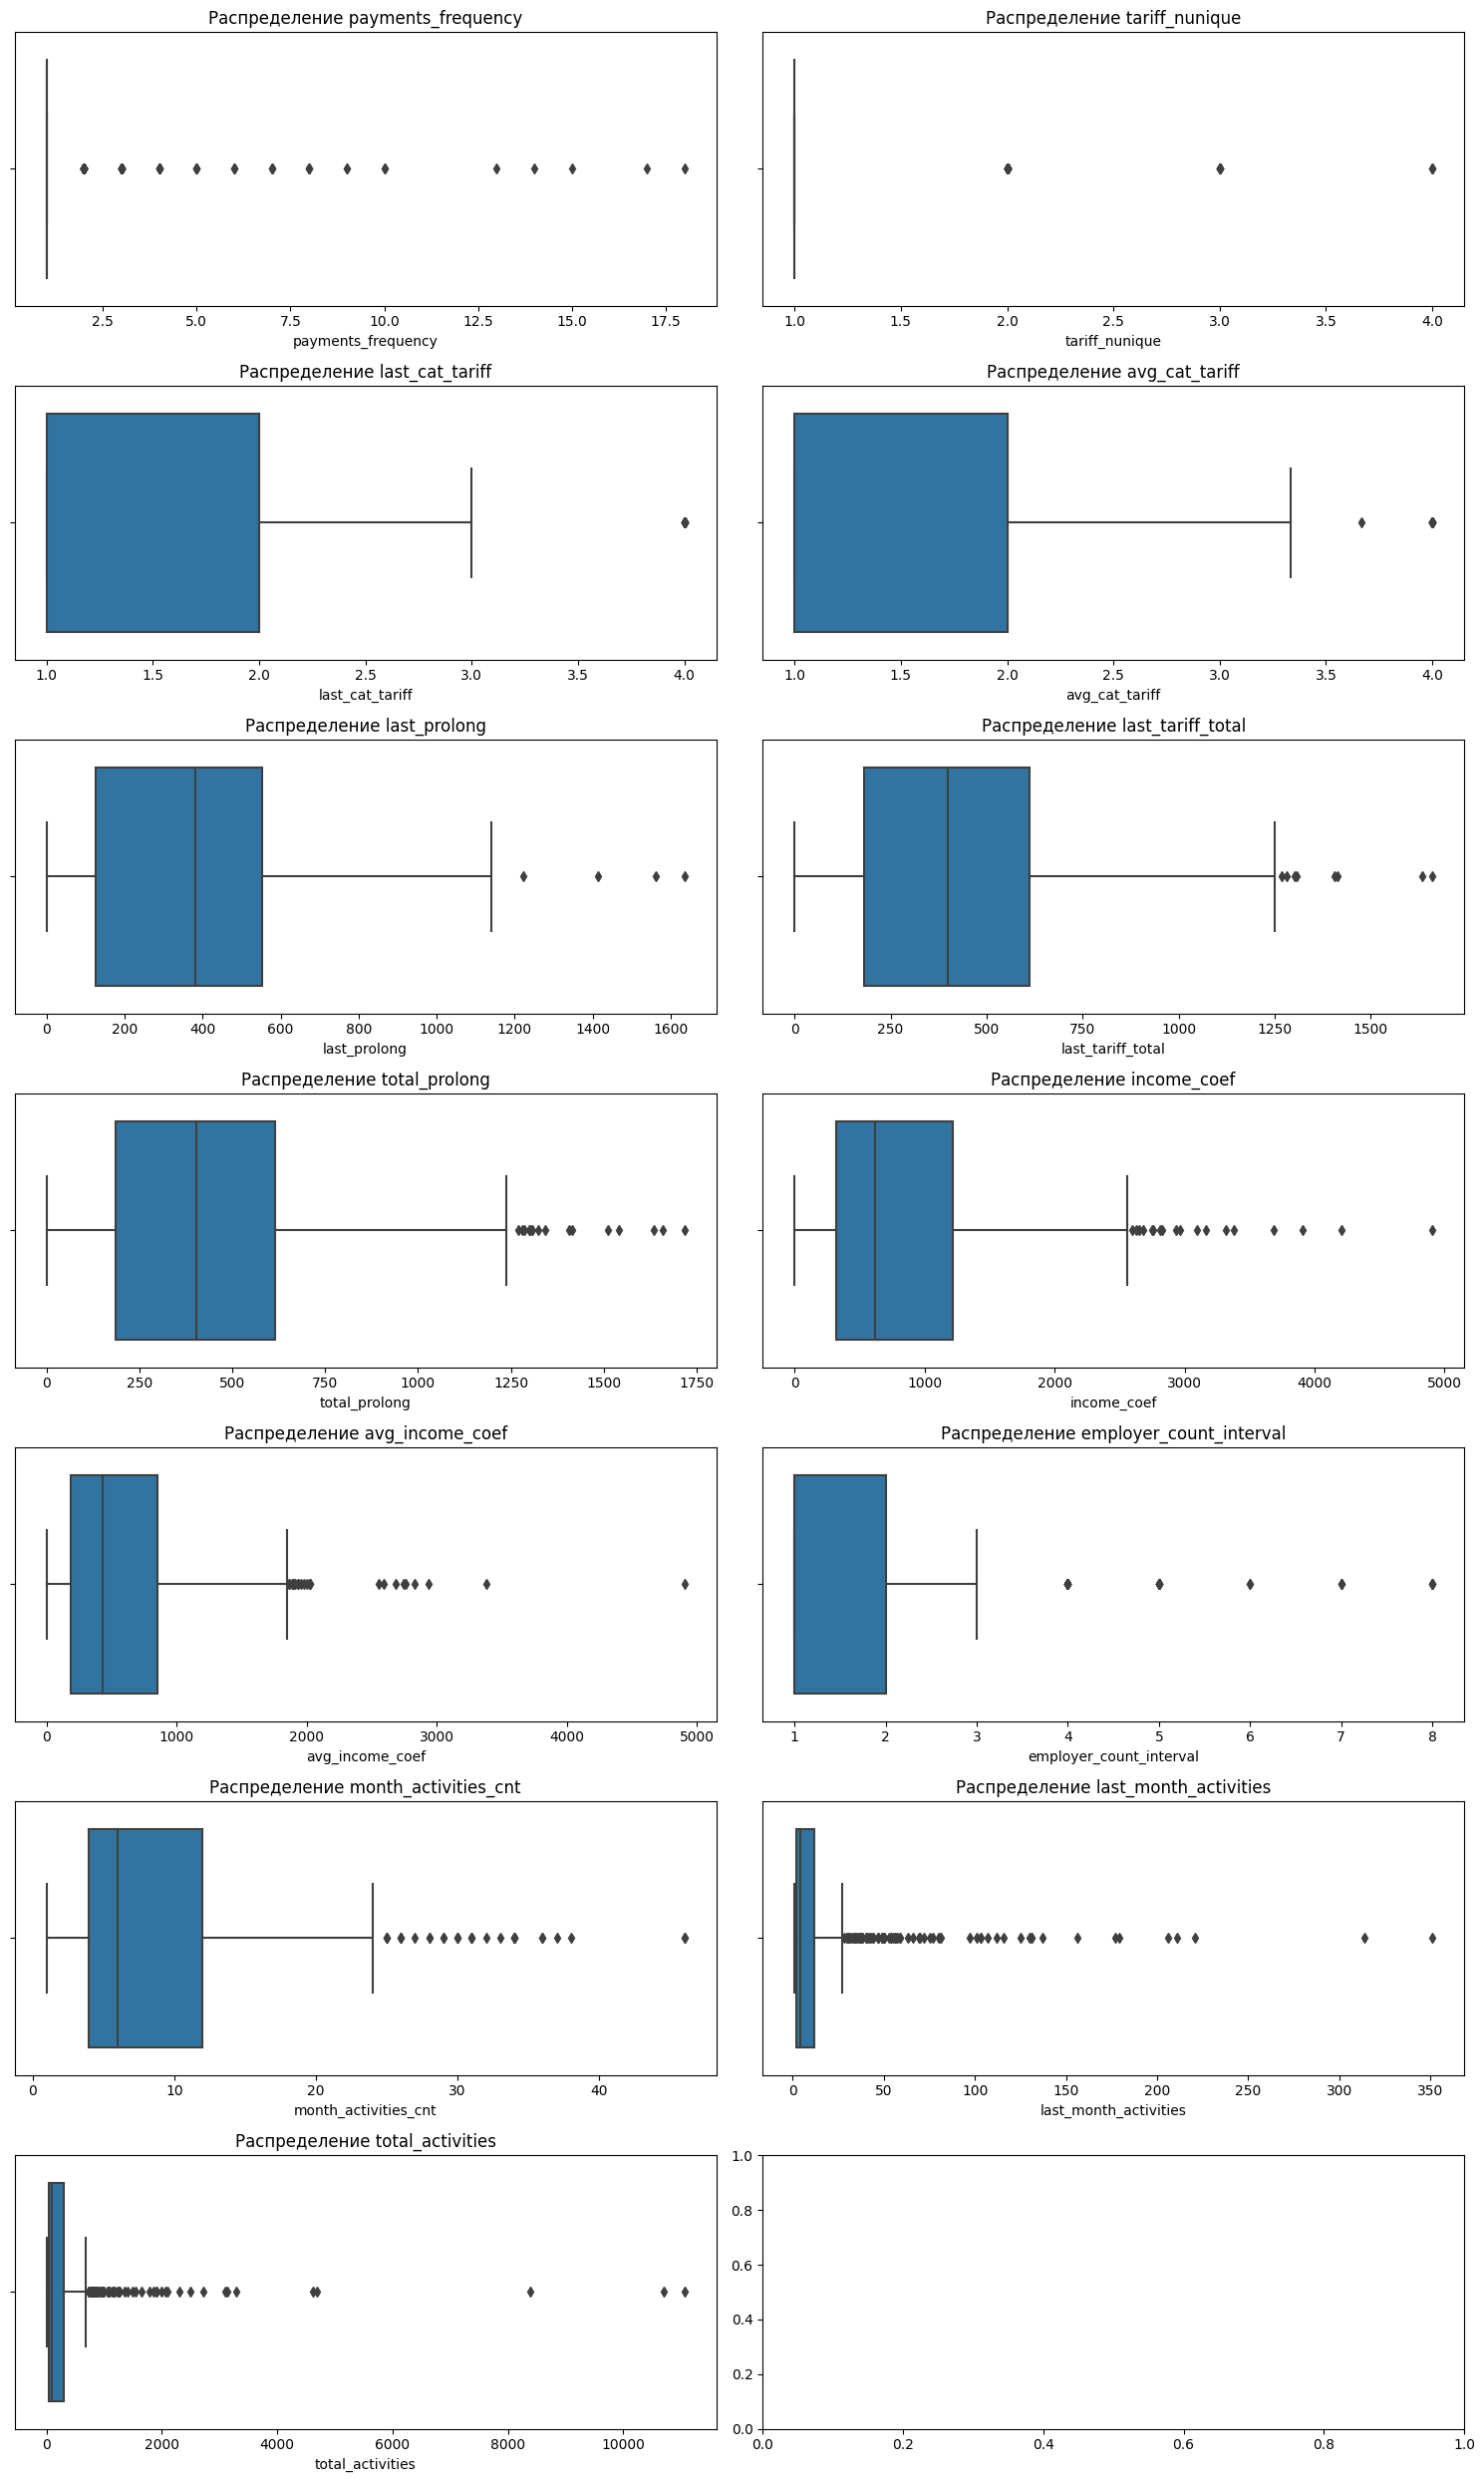

In [165]:
fig, axes = plt.subplots(7, 2, figsize=(15, 25))
i = 0
for feat in df_feats:
    ax = axes[i // 2, i % 2]
    sns.boxplot(x=df[feat], ax=ax)
    ax.set_title(f'Распределение {feat}')
    i += 1
fig.tight_layout()

In [166]:
outliers_feats = ['last_prolong',
 'last_tariff_total',
 'total_prolong',
 'avg_income_coef',
 'income_coef',
 'month_activities_cnt',
 'last_month_activities', 
 'total_activities']

In [167]:
q1 = df[outliers_feats].quantile(0.25)
q3 = df[outliers_feats].quantile(0.75)
iqr = q3 - q1

In [168]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [169]:
cleaned_df = df.loc[
(df['last_prolong'] >= lower_bound['last_prolong']) & (df['last_prolong'] <= upper_bound['last_prolong']) &
(df['last_tariff_total'] >= lower_bound['last_tariff_total']) & (df['last_tariff_total'] <= upper_bound['last_tariff_total']) &
(df['total_prolong'] >= lower_bound['total_prolong']) & (df['total_prolong'] <= upper_bound['total_prolong']) &
(df['avg_income_coef'] >= lower_bound['avg_income_coef']) & (df['avg_income_coef'] <= upper_bound['avg_income_coef']) &
(df['income_coef'] >= lower_bound['income_coef']) & (df['income_coef'] <= upper_bound['income_coef']) &
(df['month_activities_cnt'] >= lower_bound['month_activities_cnt']) \
    & (df['month_activities_cnt'] <= upper_bound['month_activities_cnt']) &    
(df['last_month_activities'] >= lower_bound['last_month_activities']) \
    & (df['last_month_activities'] <= upper_bound['last_month_activities']) &
(df['total_activities'] >= lower_bound['total_activities']) & (df['total_activities'] <= upper_bound['total_activities'])
]

cleaned_df

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
1            21                  10               2                1   
2            30                   8               2                1   
3           108                   2               1                2   
4           116                   3               2                1   
5           218                   1               1                1   
..          ...                 ...             ...              ...   
701        9683                   1               1                2   
703        9742                   1               1                3   
704        9777                   1               1                2   
706        9815                   1               1                2   
707        9817                   1               1                1   

     avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
1          1.000000          27.0              417.0         1214.0   
2          1.375000          92.0              617.0          707.0   
3          2.000000         768.0              768.0          768.0   
4          1.333333         189.0              258.0          264.0   
5          1.000000         102.0              102.0          102.0   
..              ...           ...                ...            ...   
701        2.000000          46.0               46.0           46.0   
703        3.000000         419.0              419.0          419.0   
704        2.000000         424.0              424.0          424.0   
706        2.000000         393.0              393.0          393.0   
707        1.000000         400.0              400.0          400.0   

     income_coef  avg_income_coef  employer_count_interval  \
1         1214.0          121.400                        1   
2          977.0          122.125                        1   
3         1536.0          768.000                        2   
4          270.0           90.000                        1   
5          102.0          102.000                        2   
..           ...              ...                      ...   
701         92.0           92.000                        1   
703       1257.0         1257.000                        3   
704        848.0          848.000                        1   
706        786.0          786.000                        3   
707        400.0          400.000                        1   

                     working_direction  month_activities_cnt  \
1                  строительство домов                    24   
2              кровля, фасады, отделка                    24   
3              дизайн, отделка, мебель                     6   
4                        электромонтаж                    19   
5                        строительство                     7   
..                                 ...                   ...   
701             отделка моп, тц, офисы                     2   
703                            no_data                     3   
704                            no_data                     2   
706  строительство объектов энергетики                     3   
707                            no_data                     3   

     last_month_activities  total_activities  churn  
1                        1               330      1  
2                        2               279      1  
3                        4                46      1  
4                        7               237      1  
5                        6                30      1  
..                     ...               ...    ...  
701                      1               137      1  
703                     17                27      0  
704                      7                18      0  
706                     25                39      0  
707                      7                38      0  

[551 rows x 16 columns]

Проверим, насколько меньше отфитрованный датасет:

In [170]:
100 * cleaned_df.shape[0] / df.shape[0]

77.71509167842031

In [171]:
cleaned_df.churn.mean()

0.7422867513611615

In [172]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 1 to 707
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_id               551 non-null    int64  
 1   payments_frequency       551 non-null    int64  
 2   tariff_nunique           551 non-null    int64  
 3   last_cat_tariff          551 non-null    int64  
 4   avg_cat_tariff           551 non-null    float64
 5   last_prolong             551 non-null    float64
 6   last_tariff_total        551 non-null    float64
 7   total_prolong            551 non-null    float64
 8   income_coef              551 non-null    float64
 9   avg_income_coef          551 non-null    float64
 10  employer_count_interval  551 non-null    int32  
 11  working_direction        551 non-null    object 
 12  month_activities_cnt     551 non-null    int64  
 13  last_month_activities    551 non-null    int64  
 14  total_activities         5

Удалив выбросы, мы потеряли больше 20% датасета. Процент оттока увеличился с 68% до 74%.

С учетом того, что данных и так немного, было принято решение выбросы не отфильтровывать.

### Корреляция

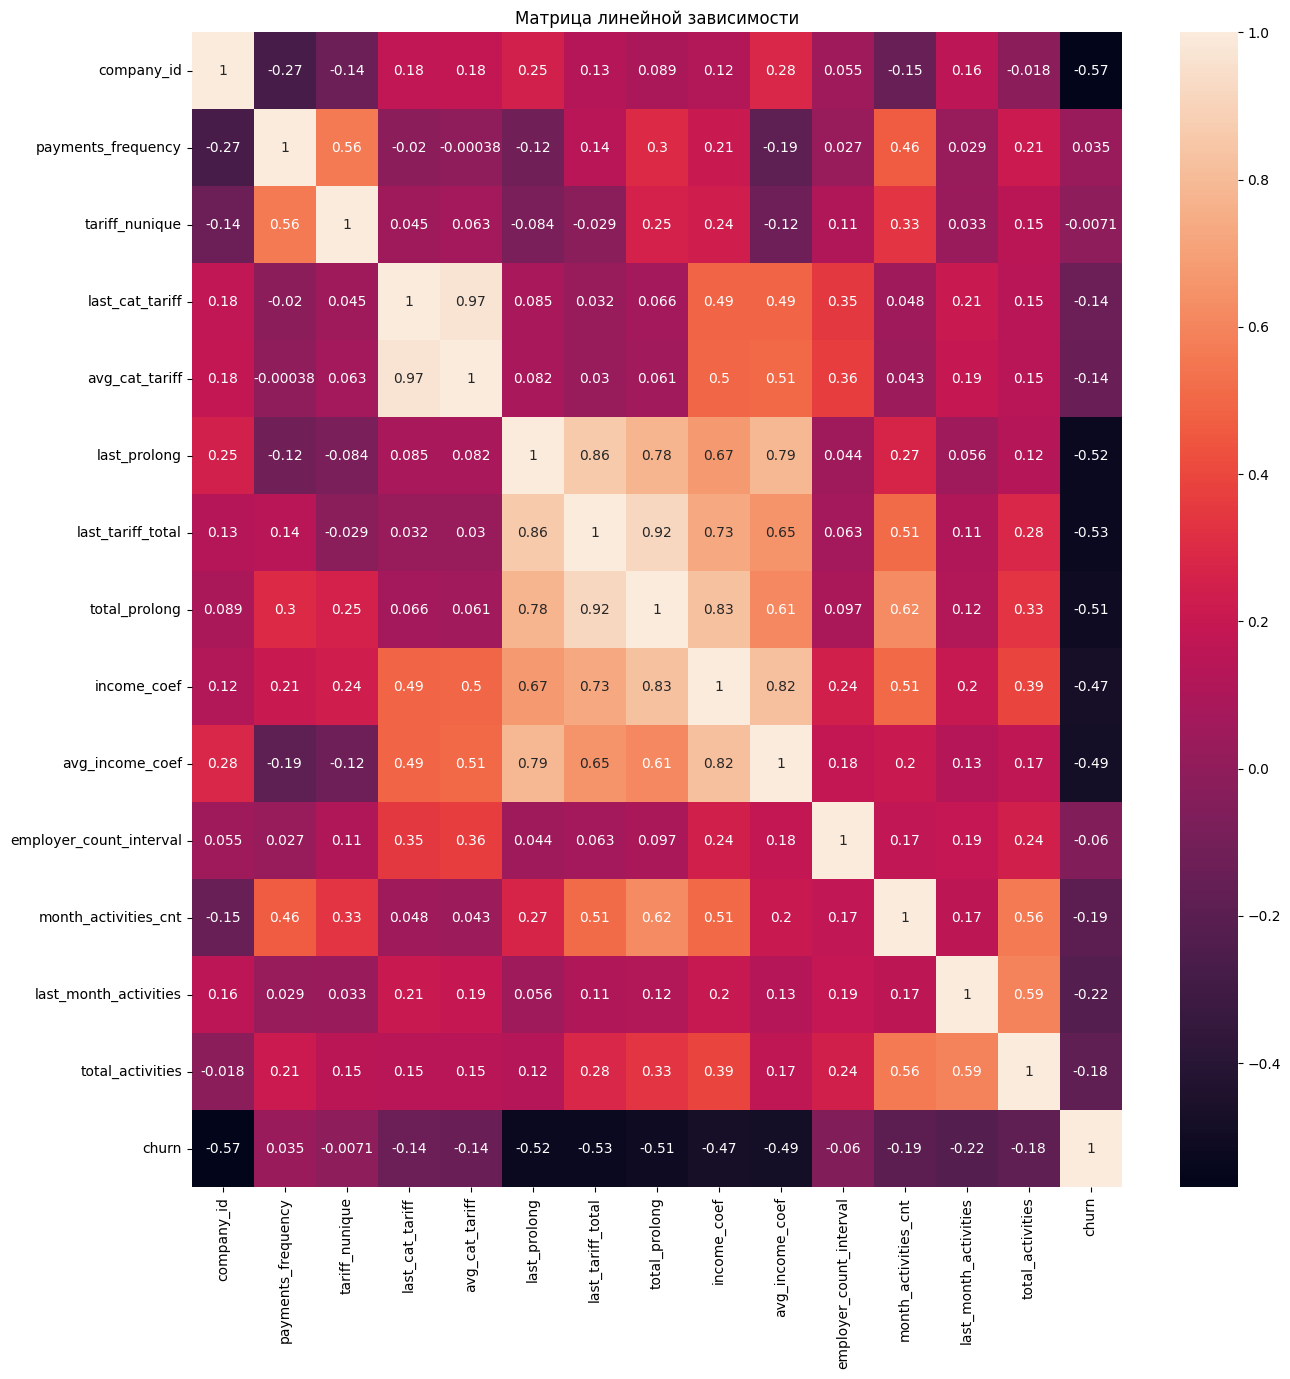

In [173]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица линейной зависимости');

In [174]:
feat_corr = df.phik_matrix()

interval columns not set, guessing: ['company_id', 'payments_frequency', 'tariff_nunique', 'last_cat_tariff', 'avg_cat_tariff', 'last_prolong', 'last_tariff_total', 'total_prolong', 'income_coef', 'avg_income_coef', 'employer_count_interval', 'month_activities_cnt', 'last_month_activities', 'total_activities', 'churn']


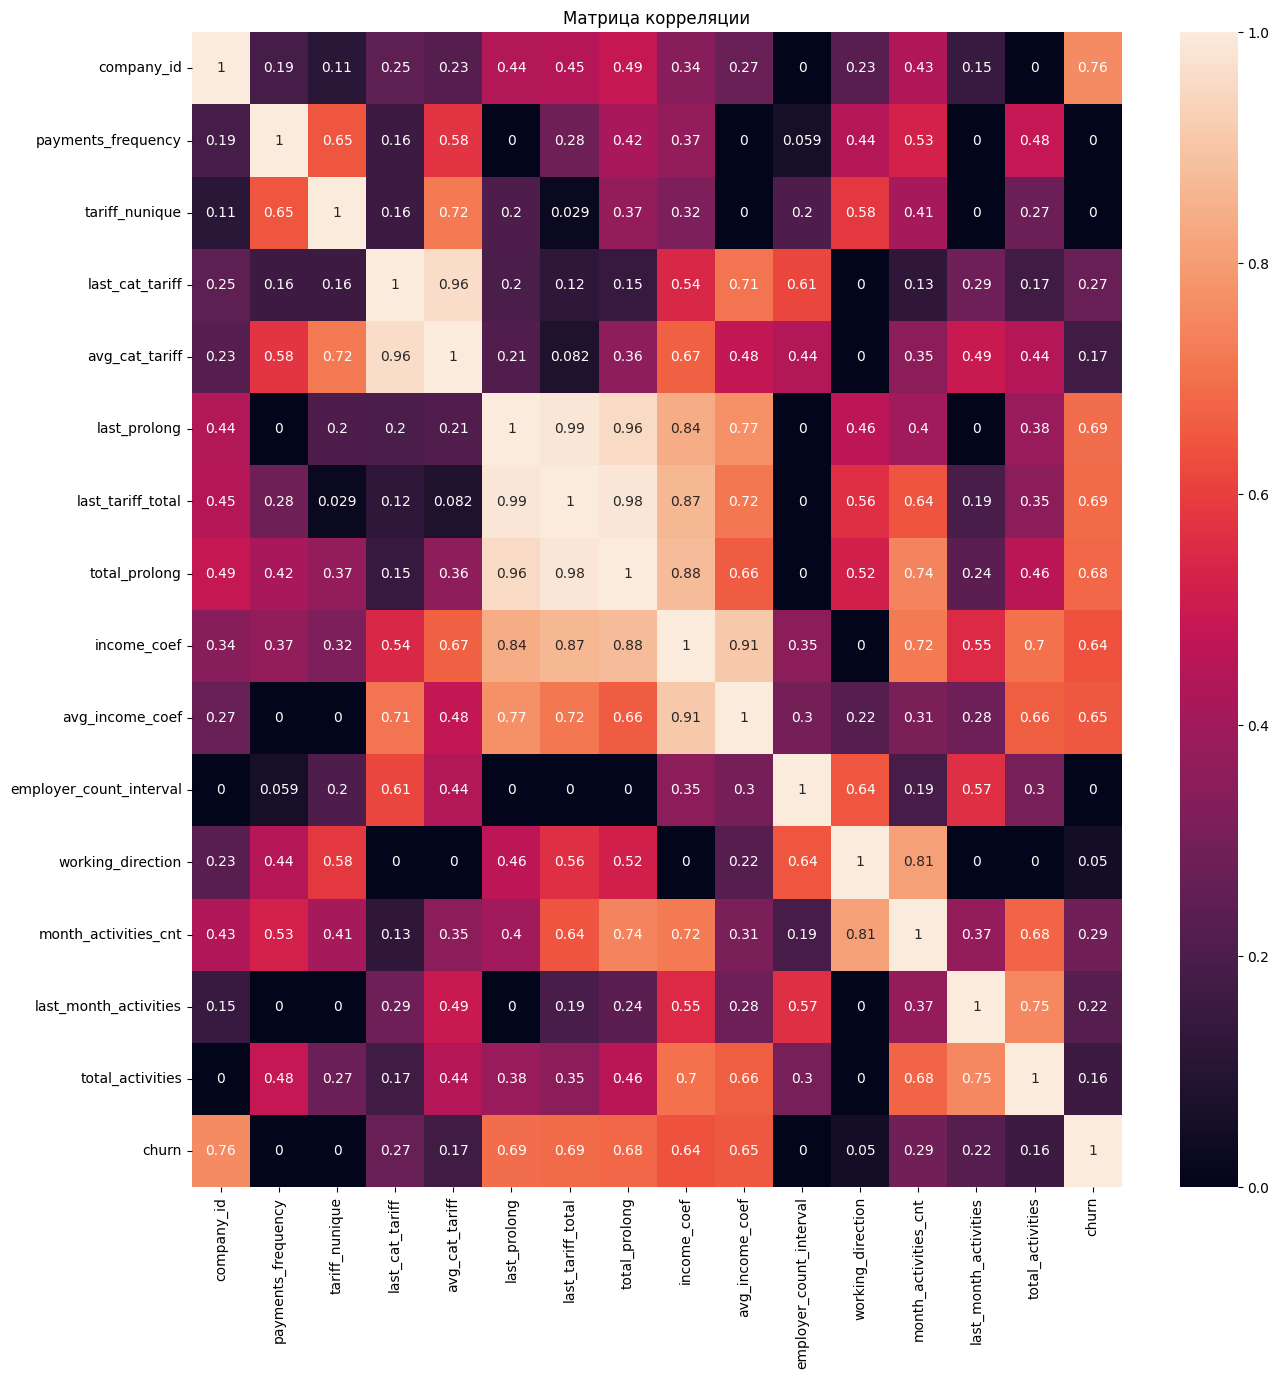

In [175]:
plt.figure(figsize=(15,15))
sns.heatmap(feat_corr, annot=True)
plt.title('Матрица корреляции');

In [176]:
feat_sign = df.significance_matrix()

interval columns not set, guessing: ['company_id', 'payments_frequency', 'tariff_nunique', 'last_cat_tariff', 'avg_cat_tariff', 'last_prolong', 'last_tariff_total', 'total_prolong', 'income_coef', 'avg_income_coef', 'employer_count_interval', 'month_activities_cnt', 'last_month_activities', 'total_activities', 'churn']


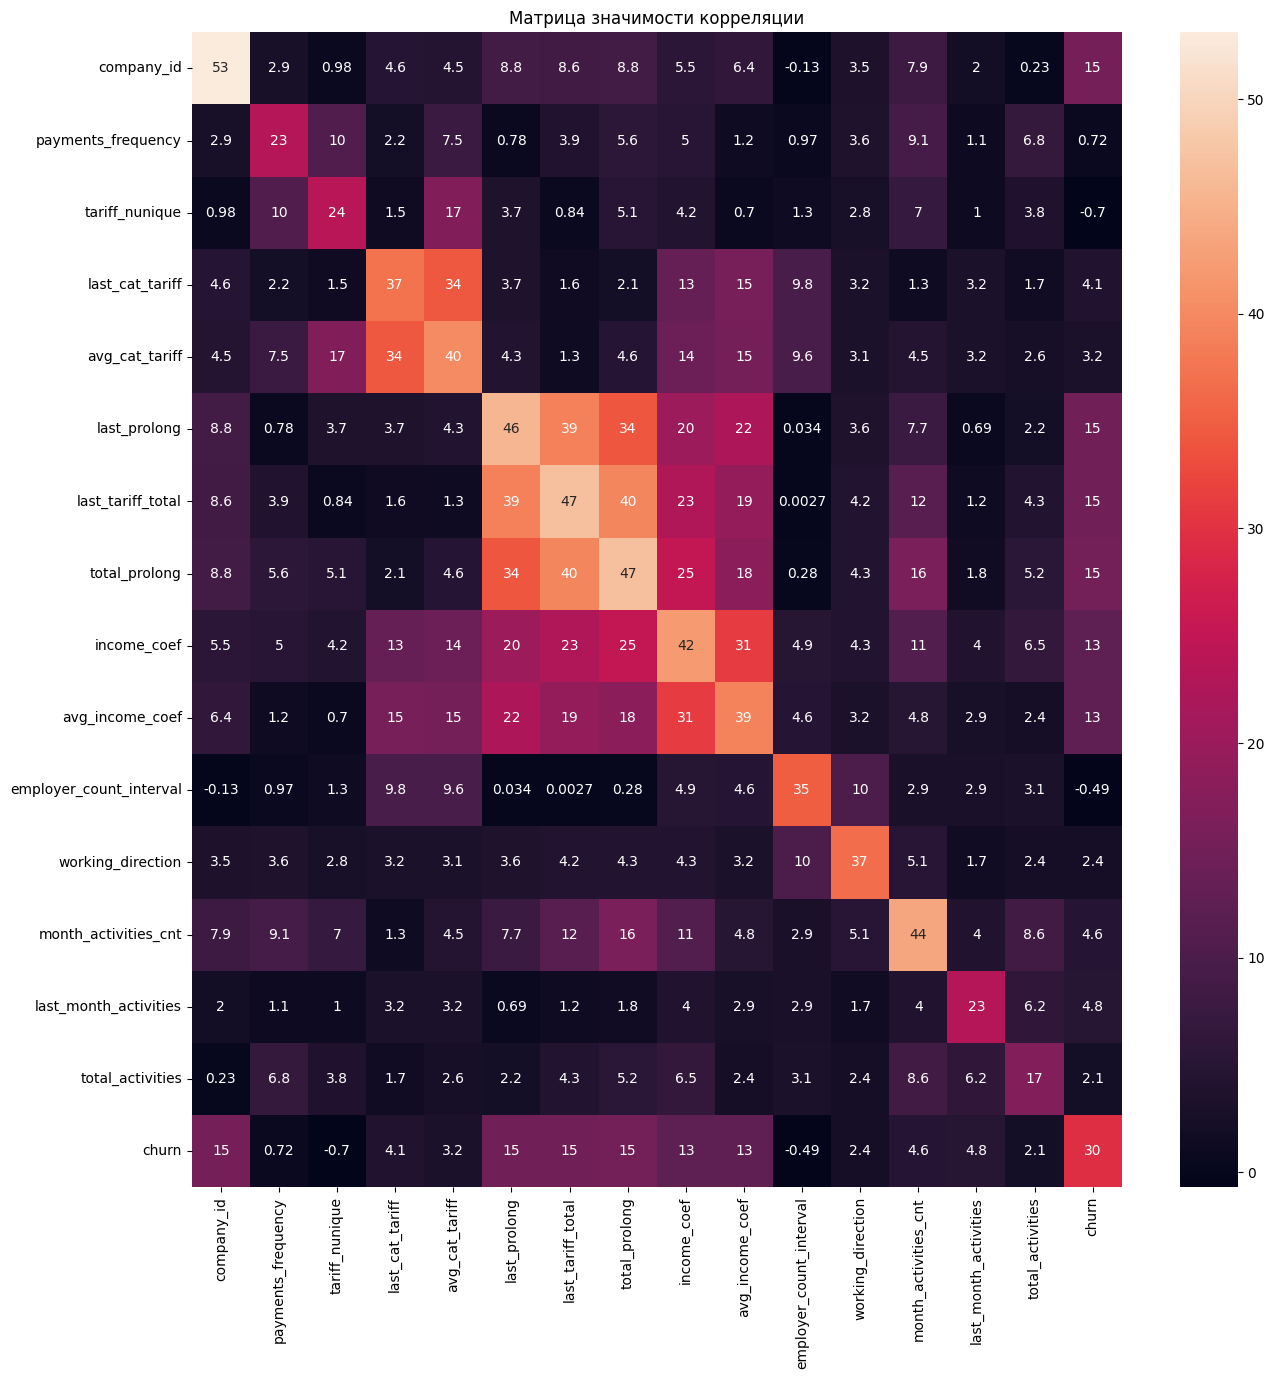

In [177]:
plt.figure(figsize=(15,15))
sns.heatmap(feat_sign, annot=True)
plt.title('Матрица значимости корреляции');

Высокая зависимость оттока от company_id. Так как id компаний исторически увеличивается со временем работы сервиса, а старые компании чаще уходят в отток, мы получили ликующую фичу: чем моложе компания, тем больше id, тем меньше вероятность оттока. 

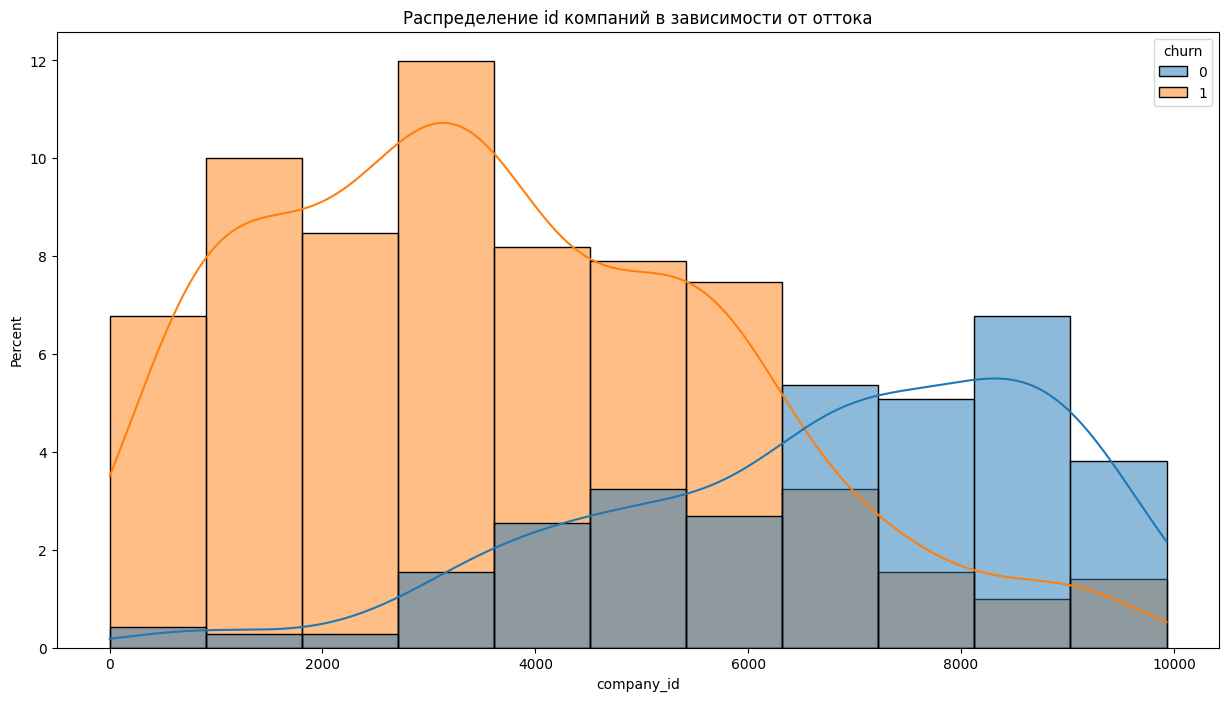

In [178]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, hue='churn', x='company_id', kde=True, stat='percent', common_norm=True)
plt.title('Распределение id компаний в зависимости от оттока');

Исключим id компаний и посмотрим на значимые коррелирующие признаки для оттока:

In [179]:
feat_corr.iloc[1:-1, -1].sort_values(ascending=False)

last_prolong               0.692982
last_tariff_total          0.690185
total_prolong              0.682222
avg_income_coef            0.649822
income_coef                0.636879
month_activities_cnt       0.287445
last_cat_tariff            0.268954
last_month_activities      0.223178
avg_cat_tariff             0.171031
total_activities           0.158615
working_direction          0.050056
payments_frequency         0.000000
tariff_nunique             0.000000
employer_count_interval    0.000000
Name: churn, dtype: float64

Получили 10 признаков, оказывающих влияние на отток:

1. last_prolong - длительность последней по времени подписки
2. last_tariff_total - общая длительность последнего тарифа (с учетом предыдущих подписок)
3. total_prolong - общая длительность всех подписок компании
4. avg_income_coef - средний коэффициент дохода
5. income_coef - коэффициент дохода
6. month_activities_cnt - количество месяцев, когда клиент был активен
7. last_cat_tariff - группа последнего тарифа (1-4)
8. last_month_activities - количество событий за последний месяц
9. avg_cat_tariff - средняя группа тарифов для компании
10. total_activities - общая активность компании за все время

Очевидно, что самая сильная корреляция у целевой переменной с признаками, связанными с длительностью нахождения в сервисе. Что логично, недовольные пользователи уходят быстро, довольные пользуются сервисом, оставляют там деньги, что является дополнительным стимулом не уходить из сервиса. С точки зрения исследования этот Уроборос не несет ни особой пользы, ни смысловой нагрузки.

Есть корреляция с признаками avg_income_coef и income_coef, в которые также зашито время пользования сервисом. 

Есть вполне логичная зависимость между оттоком и активностью пользователей (за весь период и в последний зафиксированный месяц).

Нет корреляции целевой переменной с частотой платежей, количеством измененных тарифов и количеством сотрудников компании.

### Распределение признаков, влияющих на отток

In [180]:
important_feats = feat_corr.iloc[1:-1, -1].sort_values(ascending=False)[:10].index.to_list()

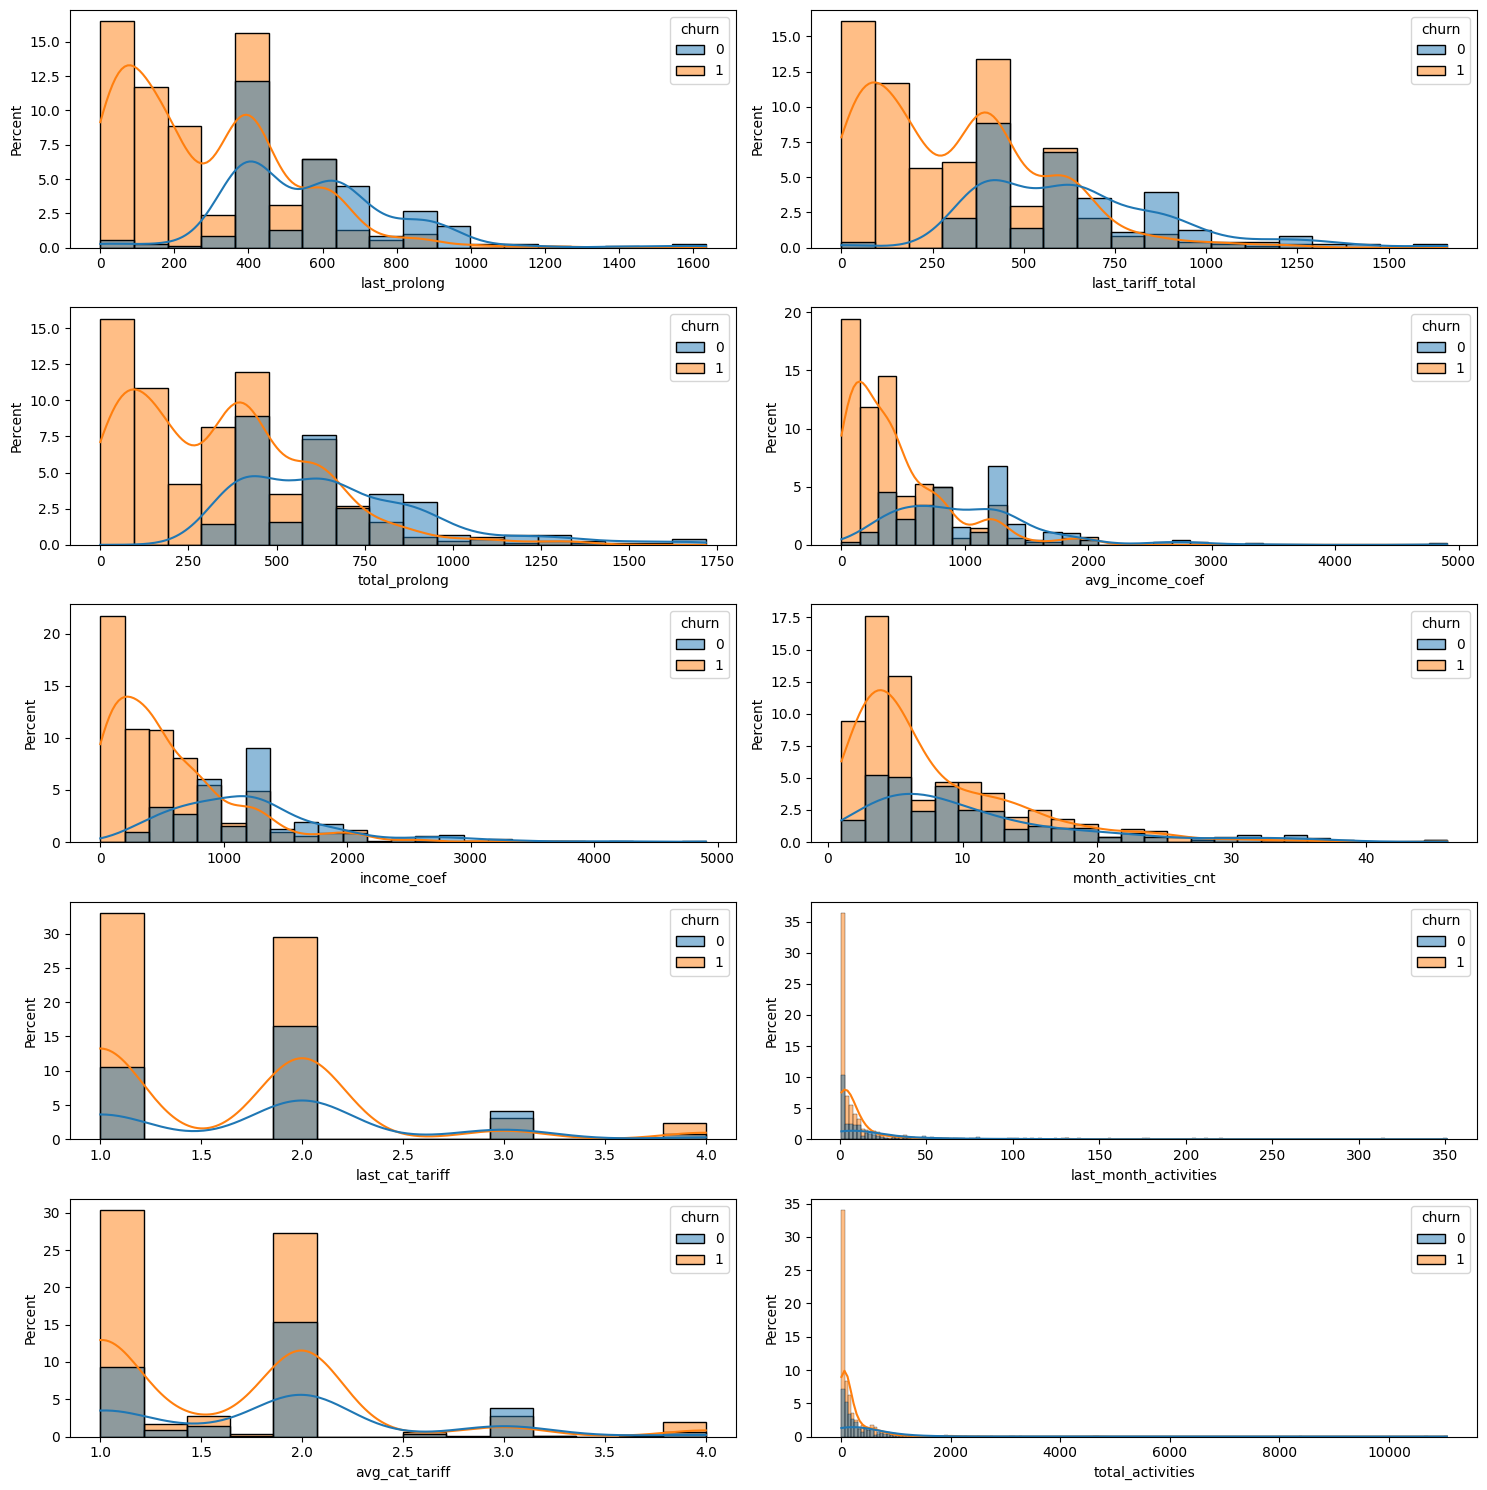

In [181]:
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
i = 0
for column in important_feats:
    ax = axes[i // 2, i % 2]
    sns.histplot(data=df, x=column, hue='churn', kde=True, stat='percent', common_norm=True, ax=ax)
    i += 1
fig.tight_layout()

Предварительные выводы:

- У всех признаков, связанных с длительность тарифов или подписки в целом, длинные хвосты.
- Чем дольше компания пользуется услугами сервиса и/или чем больше денег потратила, тем меньше отток.
- Единственный тариф, где процент отточных меньше, чем оставшихся - "Бизнес".
- В группе тарифов "Профи" очень высокий процент оттока.
- Ни один из признаков не имеет нормального распределения.
- Похоже, что признаки, связанные с активностью, имеют логнормальное распределение.

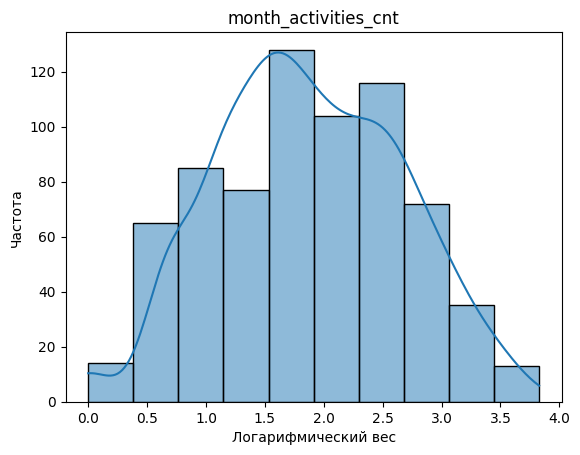

In [182]:
sns.histplot(df['month_activities_cnt'].apply(np.log), kde=True, bins=10)
plt.xlabel('Логарифмический вес')
plt.ylabel('Частота')
plt.title('month_activities_cnt')
plt.show();

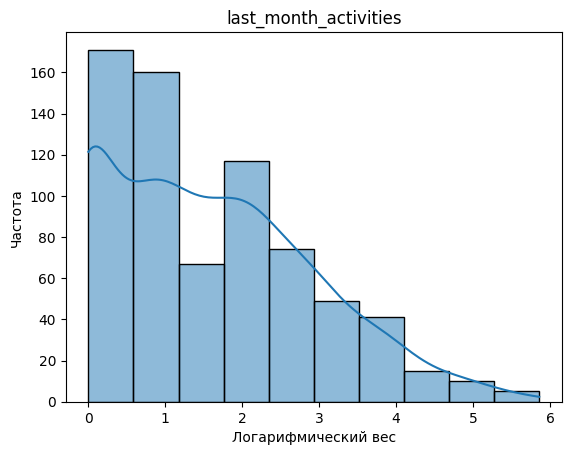

In [183]:
sns.histplot(df['last_month_activities'].apply(np.log), kde=True, bins=10)
plt.xlabel('Логарифмический вес')
plt.ylabel('Частота')
plt.title('last_month_activities')
plt.show();

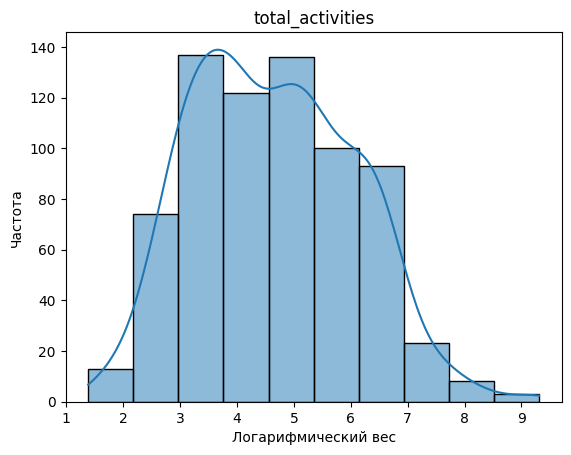

In [184]:
sns.histplot(df['total_activities'].apply(np.log), kde=True, bins=10)
plt.xlabel('Логарифмический вес')
plt.ylabel('Частота')
plt.title('total_activities')
plt.show();

Отток по группам тарифов:

In [185]:
df.groupby('last_cat_tariff').churn.mean()

last_cat_tariff
1    0.757282
2    0.641104
3    0.431373
4    0.739130
Name: churn, dtype: float64

Наименее отточные тарифы - "Бизнес" и "Базовый" (ниже общего оттока в 68%). У остальных двух тарифов отточность в районе 75%.

Распределение разных групп тарифов по отточным и лояльным компаниям:

In [186]:
(100 * df.groupby(['churn', 'last_cat_tariff']).company_id.count() / df.shape[0]).unstack().round(2)

last_cat_tariff      1      2     3     4
churn                                    
0                10.58  16.50  4.09  0.85
1                33.00  29.48  3.10  2.40

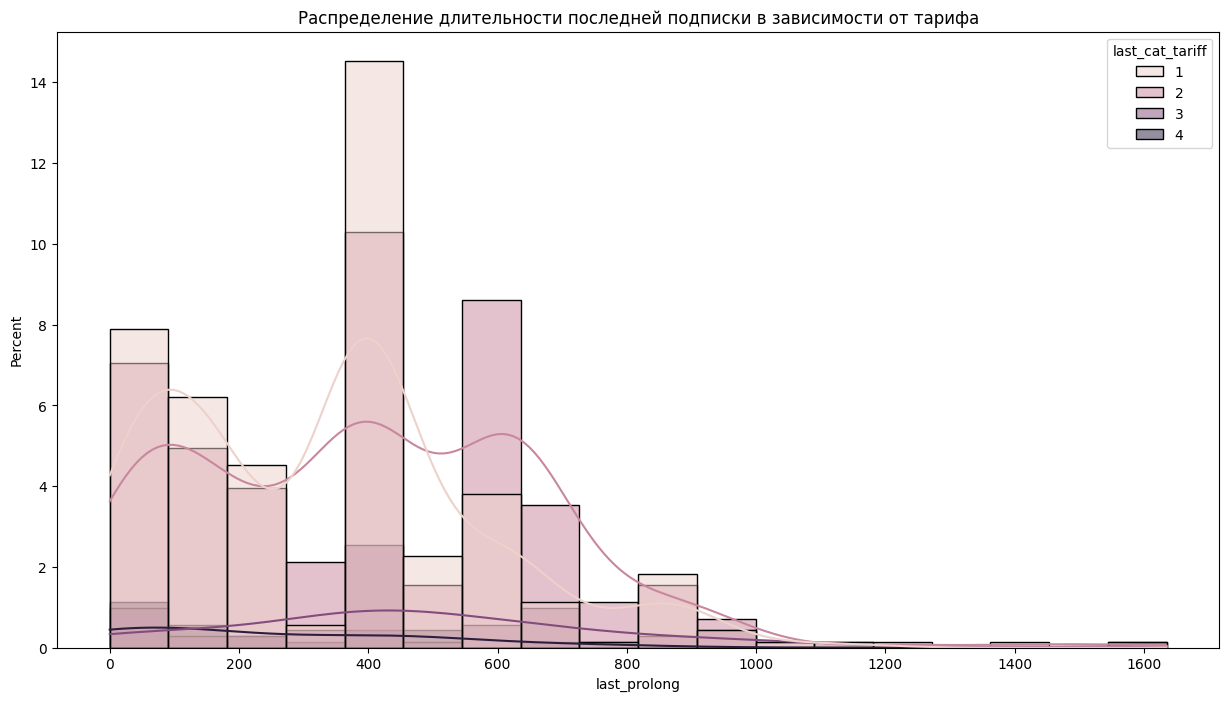

In [187]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, hue='last_cat_tariff', x='last_prolong', kde=True, stat='percent', common_norm=True)
plt.title(f'Распределение длительности последней подписки в зависимости от тарифа');

Пик на 424 дня - в комментариях была описана схема 12+2. Видимо, это наиболее продаваемый формат: "Два месяца в подарок при оплате на год". Пик включает три тарифа - "Старт", "Базовый" и "Профи".

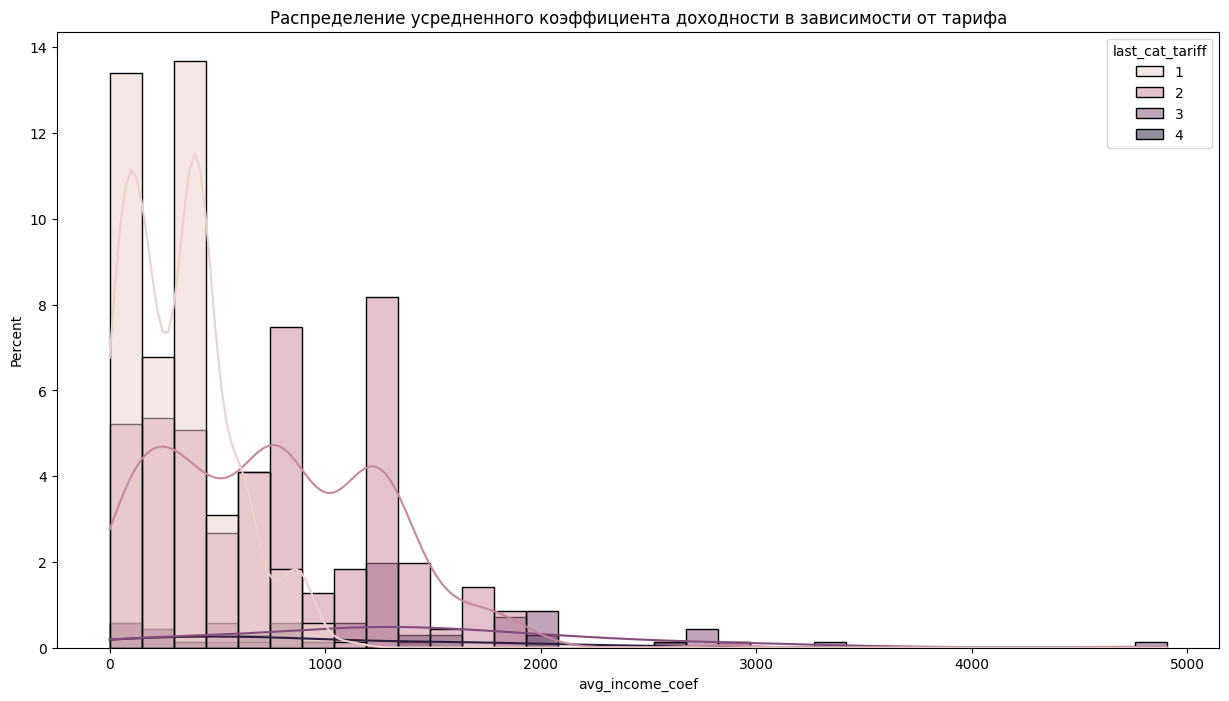

In [188]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, hue='last_cat_tariff', x='avg_income_coef', kde=True, stat='percent', common_norm=True)
plt.title(f'Распределение усредненного коэффициента доходности в зависимости от тарифа');

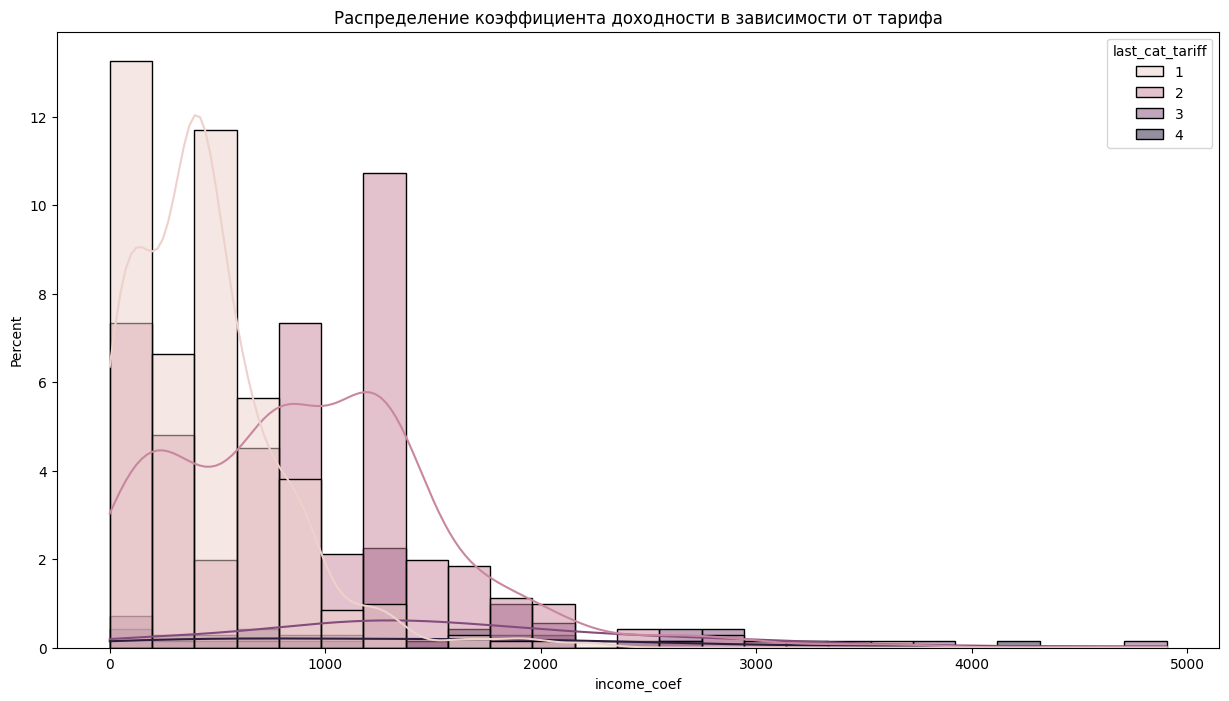

In [189]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, hue='last_cat_tariff', x='income_coef', kde=True, stat='percent', common_norm=True)
plt.title(f'Распределение коэффициента доходности в зависимости от тарифа');

### Распределение признака working_direction

Распределение рода деятельности среди отточных компаний:

In [190]:
df.query('churn == 1').working_direction.value_counts(normalize=True)[:7] * 100

no_data                      64.522822
строительство                11.410788
инженерные системы            1.867220
малоэтажное строительство     1.244813
строительство, ремонт         1.244813
электромонтаж                 1.244813
строительство, монтаж         1.037344
Name: working_direction, dtype: float64

Распределение рода деятельности среди не отточных:

In [191]:
df.query('churn == 0').working_direction.value_counts(normalize=True)[:7] * 100 

no_data                      63.436123
строительство                12.334802
малоэтажное строительство     1.762115
инженерные системы            1.321586
строительство, отделка        0.881057
строительство домов           0.881057
строительство, застройка      0.440529
Name: working_direction, dtype: float64

В целом, картина схожа: 63-64% не указали сферу деятельности. Около 12% занимаются строительством и среди отточных, и среди лояльных клиентов. У остальных родов деятельсти распространенность 2% и ниже.

In [192]:
departed_clients = df.query('churn == 1').company_id.to_list()
loyal_clients = df.query('churn == 0').company_id.to_list()

In [193]:
departed_companies =companies.query('id in @departed_clients')
departed_companies.head()

id working_direction  employer_count_interval          created_at  \
19  514           no_data                        1 2019-10-17 12:50:35   
57  383     строительство                        2 2019-07-26 12:02:45   
69  495           no_data                        1 2019-10-08 11:54:55   
75  724           no_data                        1 2020-01-20 09:59:53   
99  471           no_data                        1 2019-09-24 12:26:57   

            updated_at  billing_tariff_id  billing_is_over  tag_construction  \
19 2022-12-06 03:45:14                  4             True                 0   
57 2023-02-16 12:20:50                  7            False                 1   
69 2020-08-24 15:08:34                  2            False                 0   
75 2022-12-06 03:44:54                  4             True                 0   
99 2022-12-06 03:46:00                  7             True                 0   

    tag_repair  tag_finishing  tag_engineering  tag_electrical  tag_facade  \
19           0              0                0               0           0   
57           0              0                0               0           0   
69           0              0                0               0           0   
75           0              0                0               0           0   
99           0              0                0               0           0   

    tag_design  tag_installation  tag_trade  tag_project  tag_production  
19           0                 0          0            0               0  
57           0                 0          0            0               0  
69           0                 0          0            0               0  
75           0                 0          0            0               0  
99           0                 0          0            0               0

In [194]:
loyal_companies = companies.query('id in @loyal_clients')
loyal_companies.head()

id working_direction  employer_count_interval          created_at  \
124  8236     строительство                        2 2023-06-29 05:02:57   
189  8900     строительство                        7 2023-09-22 11:32:11   
242  8797           no_data                        1 2023-09-12 18:37:47   
473  8246           no_data                        1 2023-06-29 14:06:32   
582  8591           no_data                        1 2023-08-18 09:48:38   

             updated_at  billing_tariff_id  billing_is_over  tag_construction  \
124 2023-08-01 12:43:46                  2            False                 1   
189 2023-09-23 12:14:07                  2            False                 1   
242 2023-10-02 09:22:18                  7            False                 0   
473 2023-07-28 11:34:55                  2            False                 0   
582 2023-10-23 16:42:47                  9            False                 0   

     tag_repair  tag_finishing  tag_engineering  tag_electrical  tag_facade  \
124           0              0                0               0           0   
189           0              0                0               0           0   
242           0              0                0               0           0   
473           0              0                0               0           0   
582           0              0                0               0           0   

     tag_design  tag_installation  tag_trade  tag_project  tag_production  
124           0                 0          0            0               0  
189           0                 0          0            0               0  
242           0                 0          0            0               0  
473           0                 0          0            0               0  
582           0                 0          0            0               0

In [195]:
(pd.concat([departed_companies.filter(like='tag_').mean().sort_values(ascending=False),
          loyal_companies.filter(like='tag_').mean().sort_values(ascending=False)],
         axis=1).rename(columns={0:'departed',1:'loyal'}) * 100).round(2)

departed  loyal
tag_construction     23.86  28.19
tag_repair            6.22   5.29
tag_finishing         2.90   1.76
tag_engineering       2.90   2.64
tag_electrical        1.24   0.44
tag_installation      1.24   0.88
tag_project           1.24   1.32
tag_facade            0.83   0.44
tag_production        0.83   0.88
tag_design            0.41   0.44
tag_trade             0.21   0.88

Среди ушедших компаний меньше тех, что занимается строительством, проектированием, продажами. Больше тех, кто занимается ремонтом, отделкой, инженерными системами, монтажом, фасадами.

Создается впечатление, что чаще уходят мелкие подрядчики, остаются крупные компании.

In [196]:
df.query('churn == 1').employer_count_interval\
  .value_counts(normalize=True).reset_index()\
  .rename(columns={'index':'eci','employer_count_interval':'departed'})\
  .merge(df.query('churn == 0').employer_count_interval\
  .value_counts(normalize=True).reset_index()\
  .rename(columns={'index':'eci','employer_count_interval':'loyal'}), on='eci', how='left')\
  .sort_values(by='eci')

eci  departed     loyal
0    1  0.699170  0.656388
1    2  0.203320  0.211454
2    3  0.058091  0.074890
3    4  0.018672  0.022026
4    5  0.010373  0.017621
6    6  0.004149       NaN
7    7  0.002075  0.008811
5    8  0.004149  0.008811

In [197]:
df.query('employer_count_interval == 6')

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
439        5441                   1               1                2   
507        6305                   2               2                4   

     avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
439             2.0         529.0              529.0          529.0   
507             2.5           0.0                0.0          361.0   

     income_coef  avg_income_coef  employer_count_interval  \
439       1058.0           1058.0                        6   
507        361.0            180.5                        6   

           working_direction  month_activities_cnt  last_month_activities  \
439            строительство                    16                     16   
507  общестроительные работы                    10                    221   

     total_activities  churn  
439               205      1  
507               759      1

70% ушедших компаний имеют 1-4 сотрудников (среди оставшихся доля таких компаний чуть ниже - 66%). По всем остальным группам показатели выше среди оставшихся (кроме группы 6 - (51-100) сотрудников).

### Распределение фичей с нулевой корреляцией

Проверим распределение неважных фичей:

In [198]:
low_importance = ['payments_frequency',         
                  'tariff_nunique',            
                  'employer_count_interval']

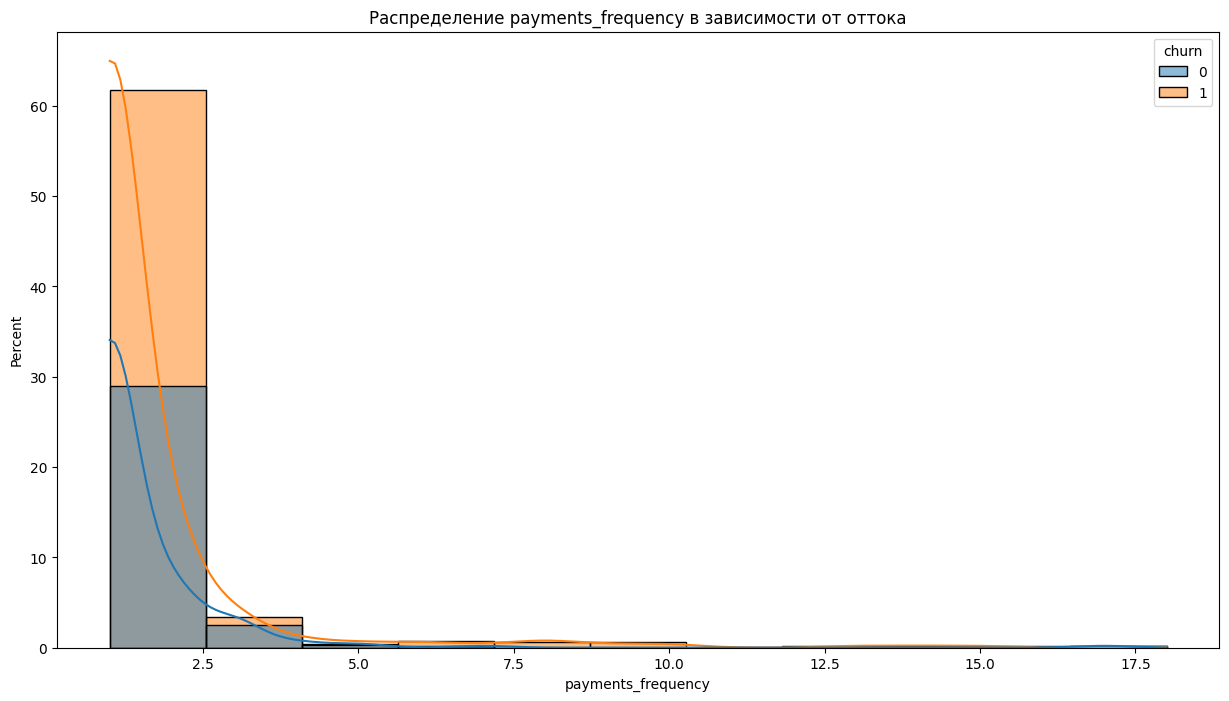

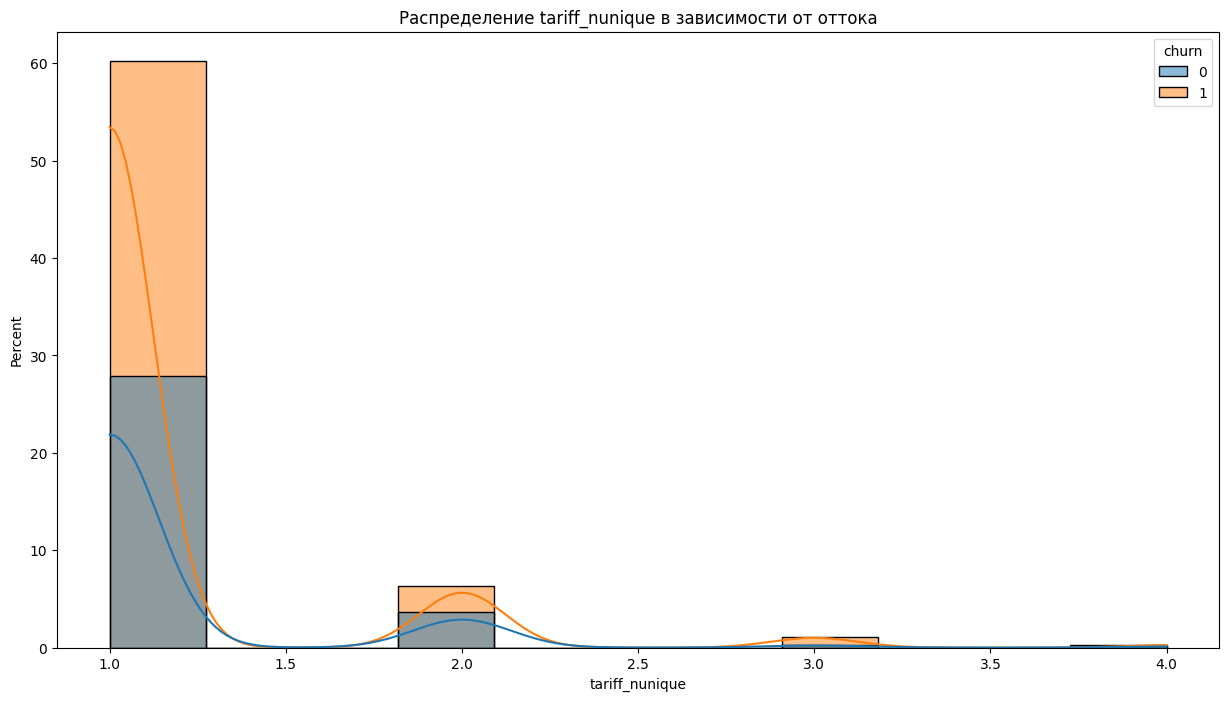

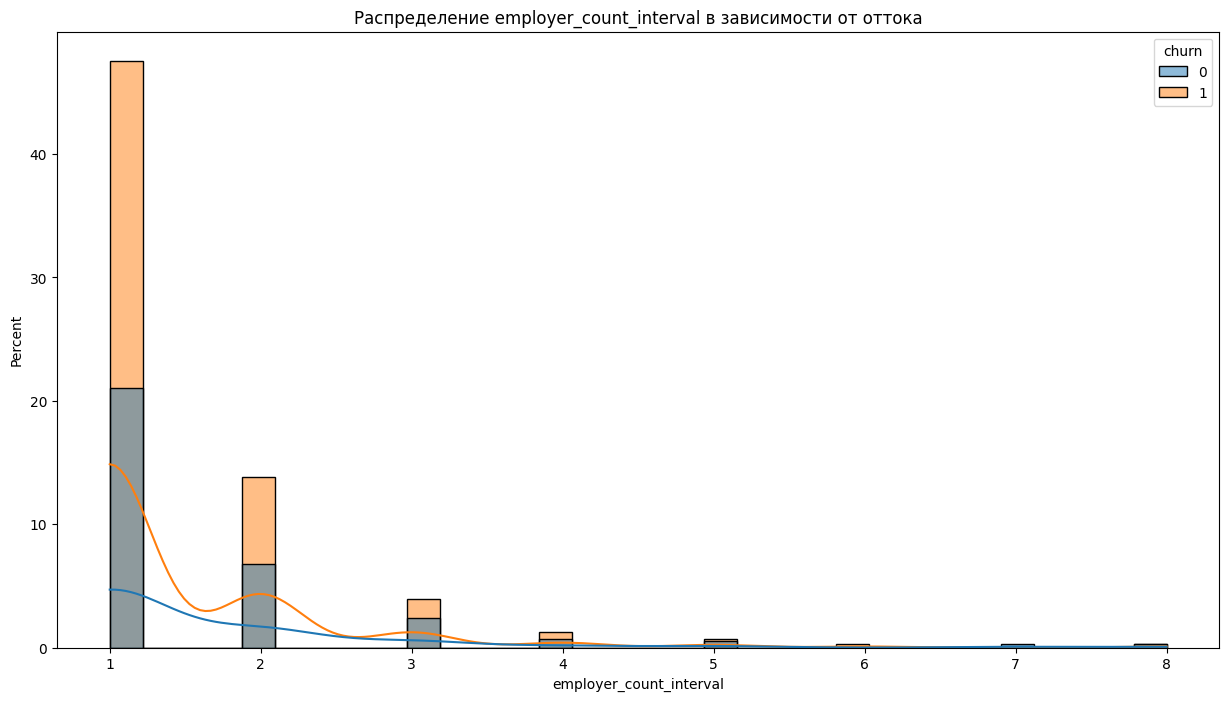

In [199]:
for feat in low_importance:
    plt.figure(figsize=(15,8))
    sns.histplot(data=df, hue='churn', x=feat, kde=True, stat='percent', common_norm=True)
    plt.title(f'Распределение {feat} в зависимости от оттока');

In [200]:
df.query('churn == 1').employer_count_interval.value_counts(normalize=True)

1    0.699170
2    0.203320
3    0.058091
4    0.018672
5    0.010373
8    0.004149
6    0.004149
7    0.002075
Name: employer_count_interval, dtype: float64

In [201]:
df.query('churn == 0').employer_count_interval.value_counts(normalize=True)

1    0.656388
2    0.211454
3    0.074890
4    0.022026
5    0.017621
8    0.008811
7    0.008811
Name: employer_count_interval, dtype: float64

### Сегментирование клиентов сервиса

In [202]:
scaler = StandardScaler() 
X_scaler = scaler.fit_transform(df.drop(columns = ['churn', 'working_direction'])) 

In [203]:
linked = linkage(X_scaler, method = 'ward')

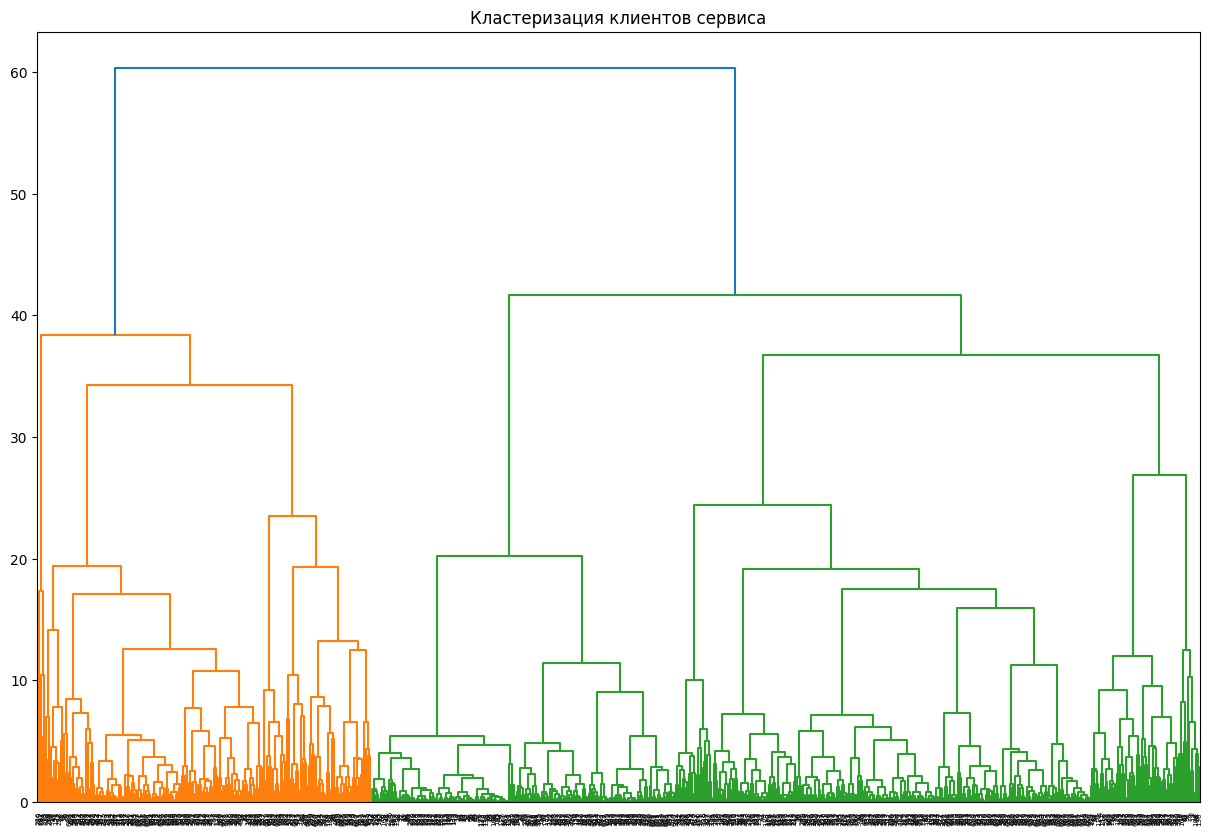

In [204]:
# визуализируем таблицу расстояний linked
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов сервиса')
plt.show()

In [205]:
km = KMeans(n_clusters=2, random_state=42) 
labels = km.fit_predict(X_scaler)
df['cluster'] = labels

In [206]:
df

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
0             1                   1               1                4   
1            21                  10               2                1   
2            30                   8               2                1   
3           108                   2               1                2   
4           116                   3               2                1   
..          ...                 ...             ...              ...   
704        9777                   1               1                2   
705        9802                   1               1                1   
706        9815                   1               1                2   
707        9817                   1               1                1   
708        9931                   1               1                2   

     avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
0          4.000000         494.0              494.0          494.0   
1          1.000000          27.0              417.0         1214.0   
2          1.375000          92.0              617.0          707.0   
3          2.000000         768.0              768.0          768.0   
4          1.333333         189.0              258.0          264.0   
..              ...           ...                ...            ...   
704        2.000000         424.0              424.0          424.0   
705        1.000000         424.0              424.0          424.0   
706        2.000000         393.0              393.0          393.0   
707        1.000000         400.0              400.0          400.0   
708        2.000000         399.0              399.0          399.0   

     income_coef  avg_income_coef  employer_count_interval  \
0         1976.0         1976.000                        3   
1         1214.0          121.400                        1   
2          977.0          122.125                        1   
3         1536.0          768.000                        2   
4          270.0           90.000                        1   
..           ...              ...                      ...   
704        848.0          848.000                        1   
705        424.0          424.000                        1   
706        786.0          786.000                        3   
707        400.0          400.000                        1   
708        798.0          798.000                        1   

                     working_direction  month_activities_cnt  \
0                        строительство                    21   
1                  строительство домов                    24   
2              кровля, фасады, отделка                    24   
3              дизайн, отделка, мебель                     6   
4                        электромонтаж                    19   
..                                 ...                   ...   
704                            no_data                     2   
705                            no_data                     2   
706  строительство объектов энергетики                     3   
707                            no_data                     3   
708                      строительство                     2   

     last_month_activities  total_activities  churn  cluster  
0                        4               162      1        1  
1                        1               330      1        0  
2                        2               279      1        0  
3                        4                46      1        1  
4                        7               237      1        0  
..                     ...               ...    ...      ...  
704                      7                18      0        0  
705                     50                64      0        0  
706                     25                39      0        1  
707                      7                38      0        0  
708                     49                94      0        0  

[709 rows x 17 c

In [207]:
pd.concat([df.groupby('cluster').churn.mean().reset_index(), 
          df.cluster.value_counts(normalize=True).reset_index()\
                    .rename(columns={'cluster':'cluster_size'}).drop('index', axis=1)],
          axis=1)

cluster     churn  cluster_size
0        0  0.856828      0.640339
1        1  0.364706      0.359661

Мы получили два кластера размером 36% и 64% от всего датасета, у которых отток отличается более чем в два раза.

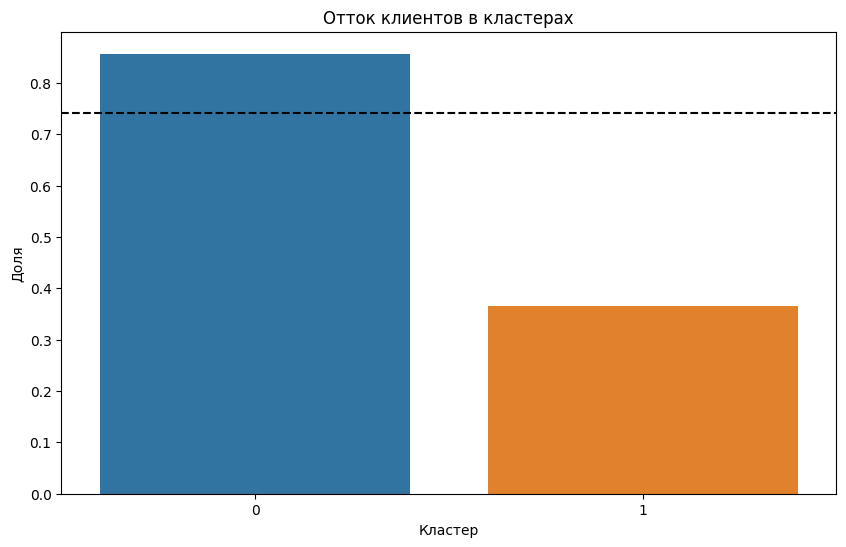

In [208]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df.groupby('cluster')['churn'].mean().to_frame().reset_index(),
            x='cluster', y='churn')
plt.axhline(y=cleaned_df.churn.mean(), color='black', linestyle='--')
plt.title('Отток клиентов в кластерах')
plt.ylabel('Доля')
plt.xlabel('Кластер')
plt.show();

In [209]:
df.groupby('cluster').agg({'payments_frequency':'mean',
                                'tariff_nunique':'mean',
                                'last_cat_tariff':'mean',
                                'avg_cat_tariff':'mean',
                                'last_prolong':'mean',
                                'last_tariff_total':'mean',
                                'total_prolong':'mean',
                                'income_coef':'mean',
                                'avg_income_coef':'mean',
                                'employer_count_interval':'mean',
                                'last_month_activities':'mean',
                                'total_activities':'mean',
                                'churn':'mean'
                               })

payments_frequency  tariff_nunique  last_cat_tariff  avg_cat_tariff  \
cluster                                                                        
0                  1.403084        1.112335         1.451542        1.449284   
1                  1.749020        1.192157         2.145098        2.128954   

         last_prolong  last_tariff_total  total_prolong  income_coef  \
cluster                                                                
0          245.687225         273.180617     295.605727   393.484581   
1          586.462745         666.513725     713.231373  1446.023529   

         avg_income_coef  employer_count_interval  last_month_activities  \
cluster                                                                    
0             326.458725                 1.301762               8.936123   
1            1137.136963                 1.913725              22.282353   

         total_activities     churn  
cluster                              
0              149.616740  0.856828  
1              582.894118  0.364706

В кластерах нет или минимальна разница между частотой платежей, количеством тарифов, использовавшихся компаниями и количеством сотрудников (все эти призники имеют нулевую корреляцию с оттоком)

In [210]:
diff_feat = df.select_dtypes(exclude='object').columns
diff_feat = diff_feat.drop(['company_id', 'churn', 'cluster'])
diff_feat

Index(['payments_frequency', 'tariff_nunique', 'last_cat_tariff',
       'avg_cat_tariff', 'last_prolong', 'last_tariff_total', 'total_prolong',
       'income_coef', 'avg_income_coef', 'employer_count_interval',
       'month_activities_cnt', 'last_month_activities', 'total_activities'],
      dtype='object')

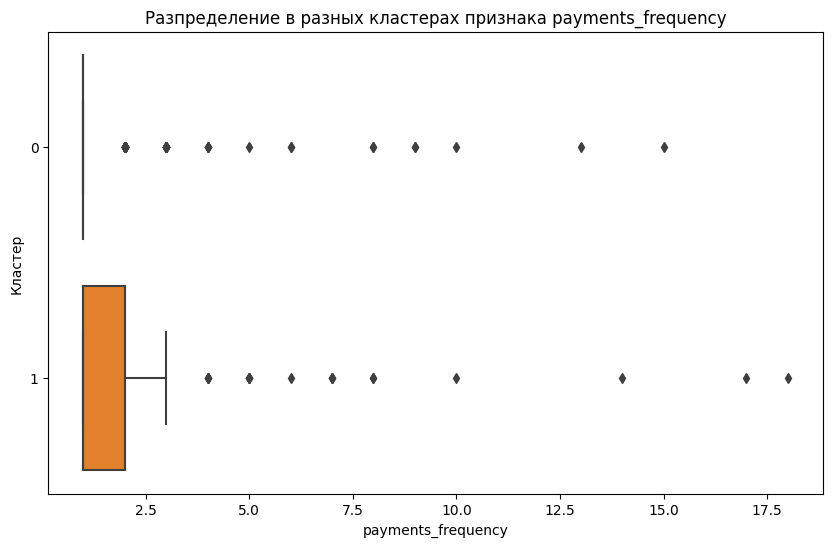

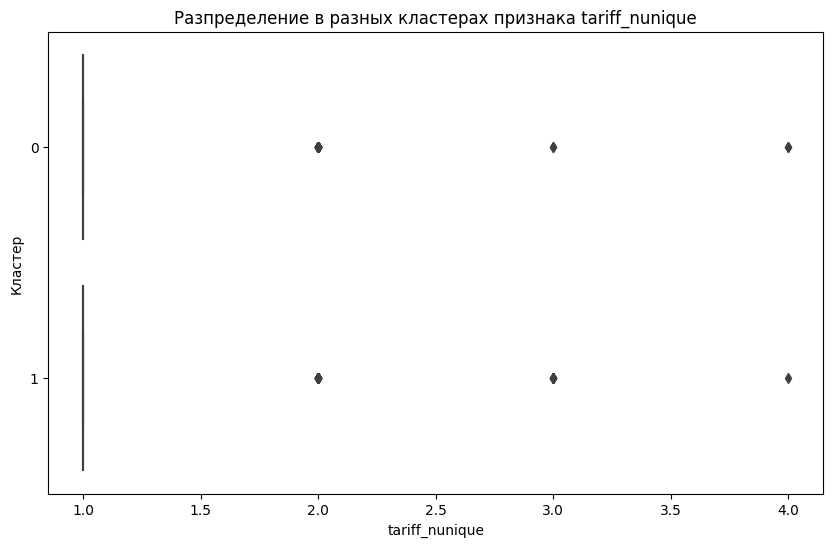

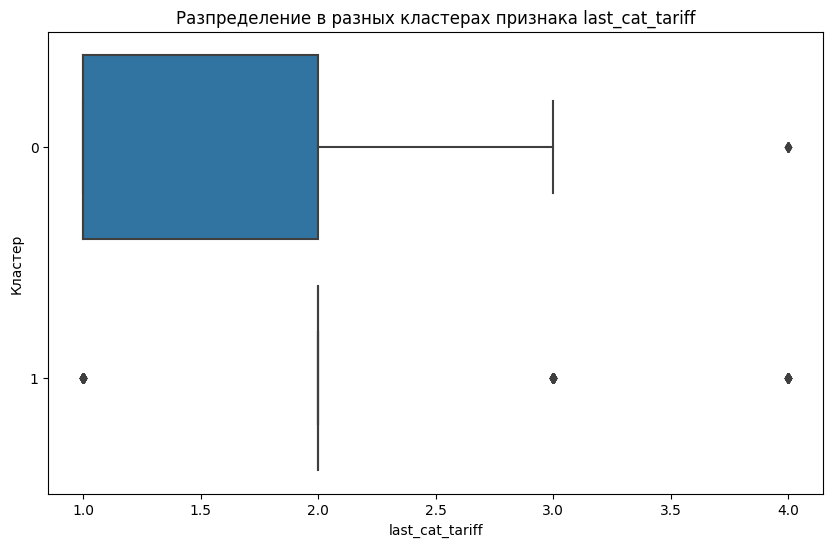

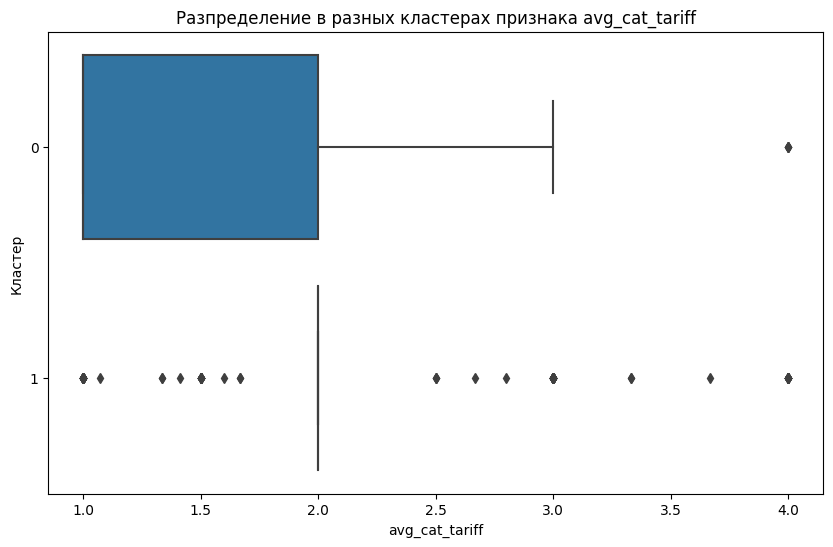

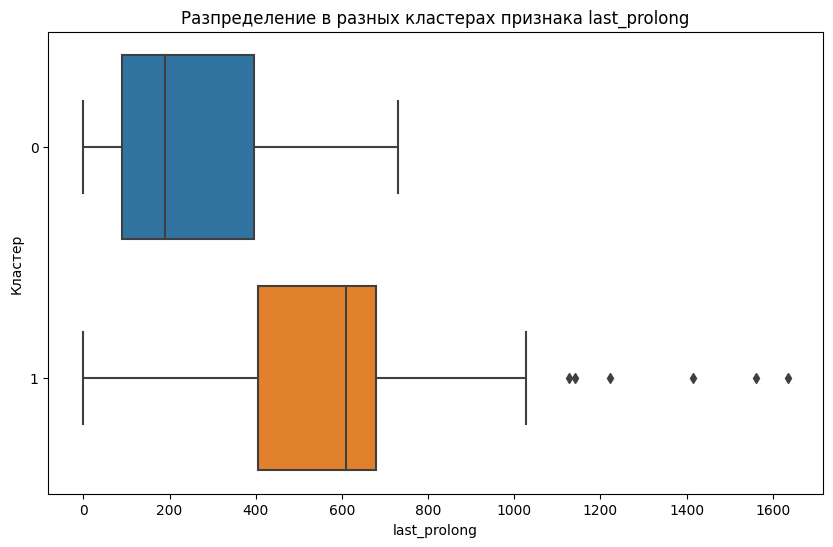

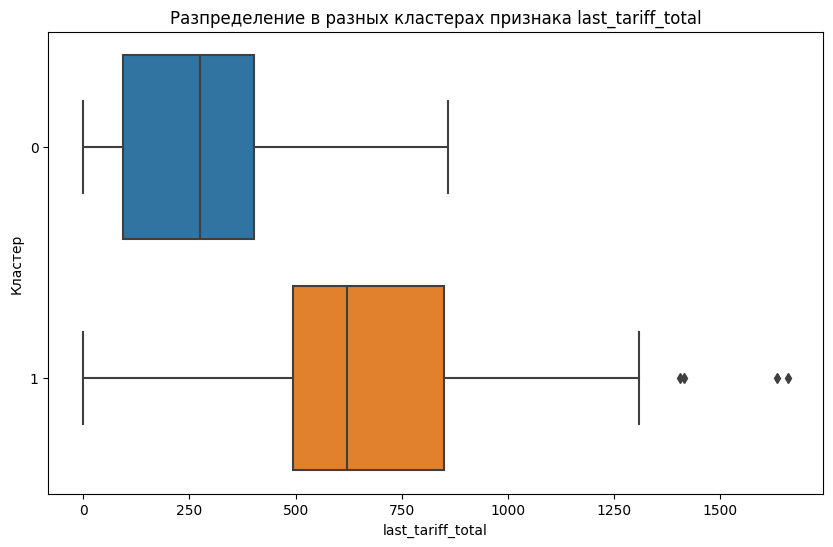

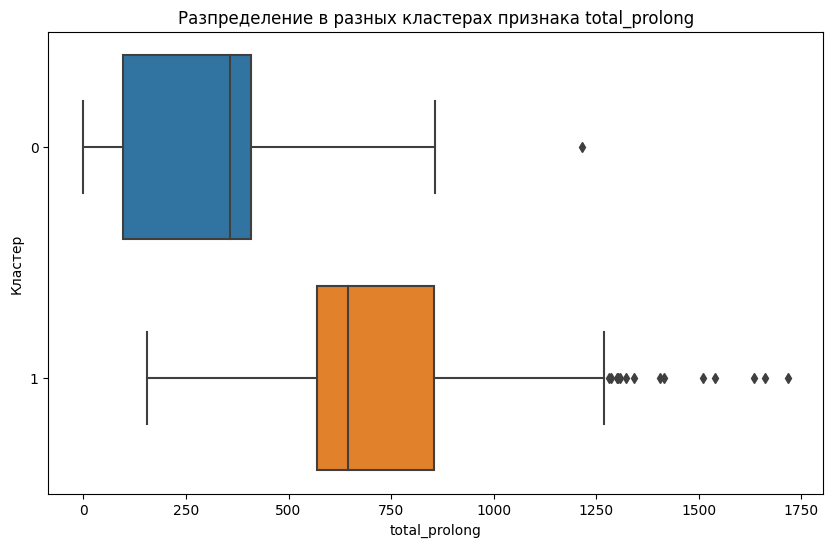

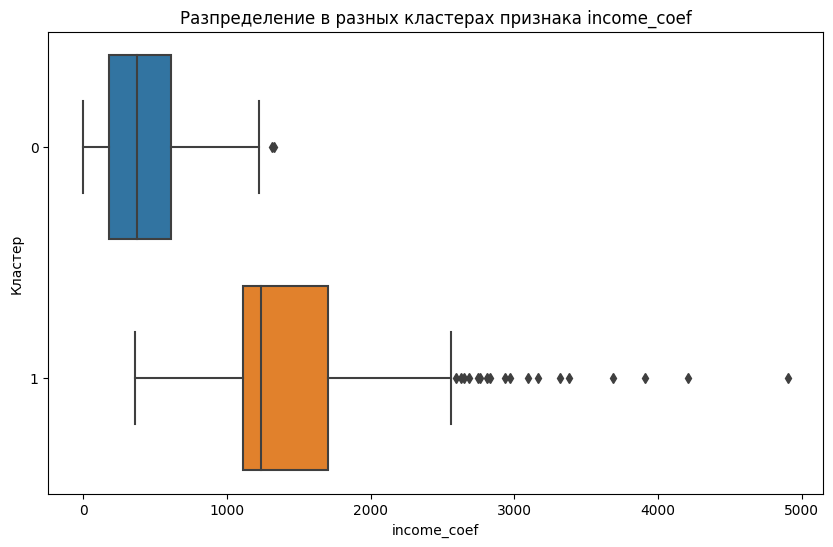

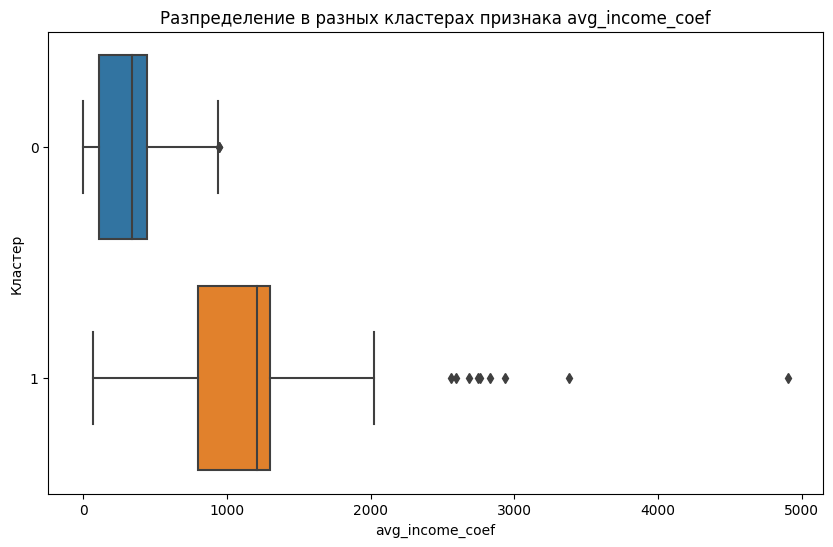

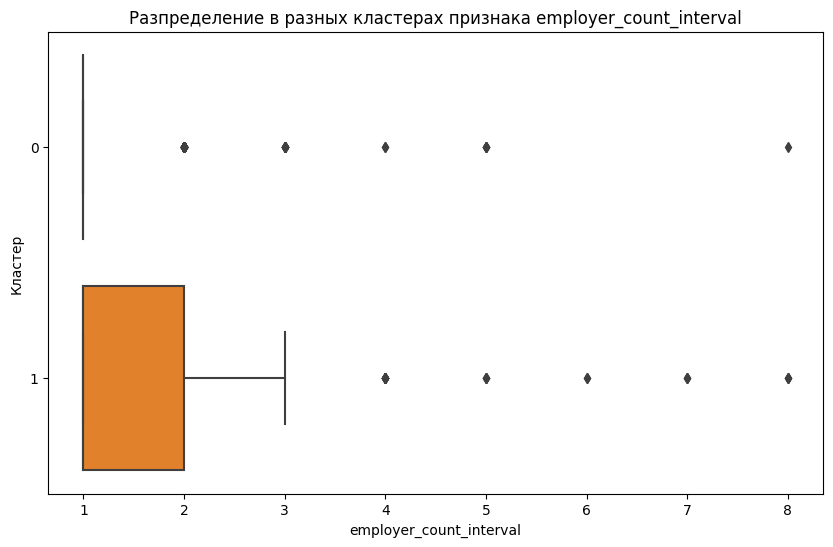

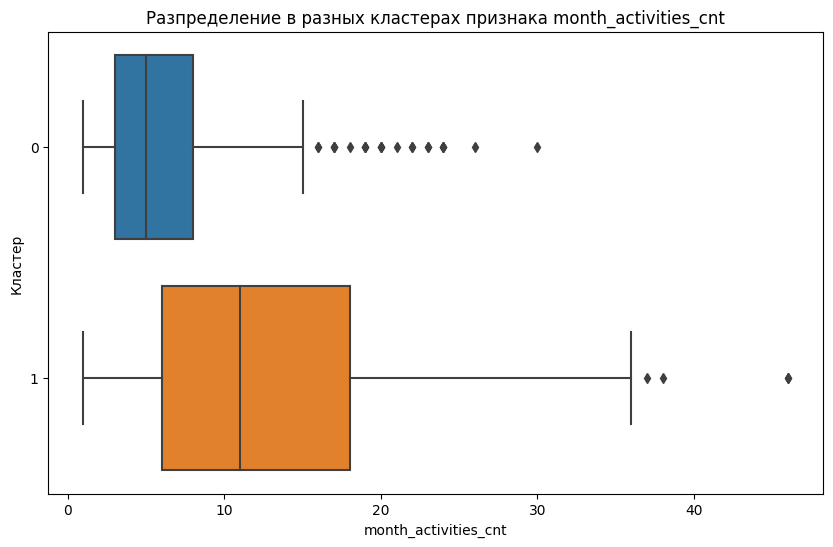

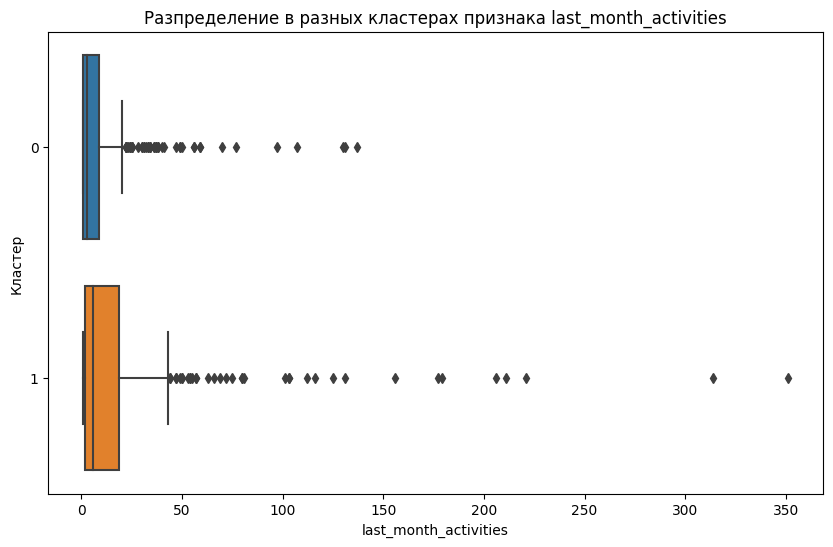

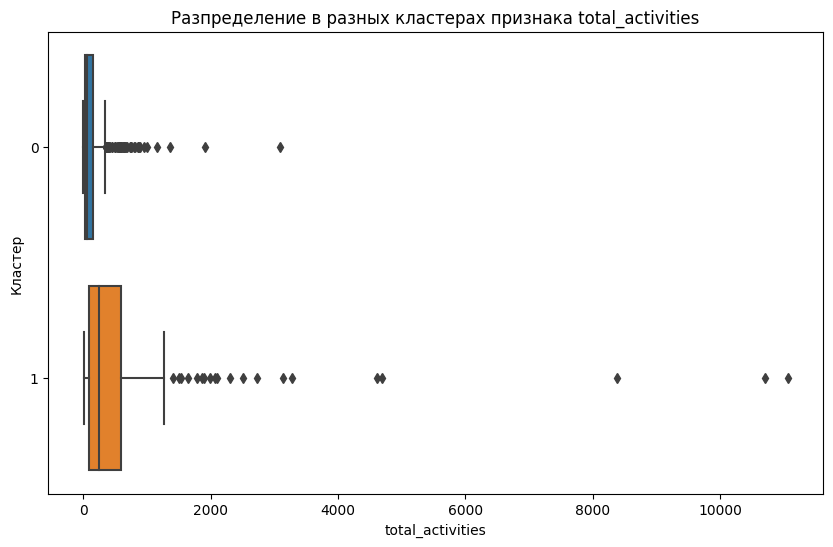

In [211]:
for column in diff_feat:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=column, y='cluster', orient = 'h')
    plt.title('Разпределение в разных кластерах признака ' + column)
    plt.ylabel('Кластер')
    plt.xlabel(column)
    plt.show();

In [212]:
df.query('cluster == 0').describe()

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
count   454.000000          454.000000      454.000000       454.000000   
mean   4180.279736            1.403084        1.112335         1.451542   
std    2610.637310            1.333252        0.367772         0.595112   
min      21.000000            1.000000        1.000000         1.000000   
25%    2136.250000            1.000000        1.000000         1.000000   
50%    3628.500000            1.000000        1.000000         1.000000   
75%    6018.000000            1.000000        1.000000         2.000000   
max    9931.000000           15.000000        4.000000         4.000000   

       avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
count      454.000000    454.000000         454.000000     454.000000   
mean         1.449284    245.687225         273.180617     295.605727   
std          0.568260    180.996625         192.391073     204.510574   
min          1.000000      0.000000           0.000000       0.000000   
25%          1.000000     90.250000          93.000000      97.000000   
50%          1.000000    190.000000         275.500000     357.000000   
75%          2.000000    397.000000         401.750000     408.000000   
max          4.000000    729.000000         858.000000    1214.000000   

       income_coef  avg_income_coef  employer_count_interval  \
count   454.000000       454.000000               454.000000   
mean    393.484581       326.458725                 1.301762   
std     276.036635       236.745459                 0.721261   
min       0.000000         0.000000                 1.000000   
25%     180.000000       108.312500                 1.000000   
50%     375.500000       336.500000                 1.000000   
75%     610.750000       439.750000                 1.000000   
max    1328.000000       942.000000                 8.000000   

       month_activities_cnt  last_month_activities  total_activities  \
count            454.000000             454.000000        454.000000   
mean               6.429515               8.936123        149.616740   
std                4.843977              16.247883        255.827823   
min                1.000000               1.000000          4.000000   
25%                3.000000               1.000000         26.250000   
50%                5.000000               3.000000         55.500000   
75%                8.000000               9.000000        156.500000   
max               30.000000             137.000000       3093.000000   

            churn  cluster  
count  454.000000    454.0  
mean     0.856828      0.0  
std      0.350634      0.0  
min      0.000000      0.0  
25%      1.000000      0.0  
50%      1.000000      0.0  
75%      1.000000      0.0  
max      1.000000      0.0

In [213]:
df.query('cluster == 1').describe()

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
count   255.000000          255.000000      255.000000       255.000000   
mean   5443.572549            1.749020        1.192157         2.145098   
std    2390.835735            2.065785        0.492400         0.767528   
min       1.000000            1.000000        1.000000         1.000000   
25%    3891.500000            1.000000        1.000000         2.000000   
50%    5540.000000            1.000000        1.000000         2.000000   
75%    7204.000000            2.000000        1.000000         2.000000   
max    9815.000000           18.000000        4.000000         4.000000   

       avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
count      255.000000    255.000000         255.000000     255.000000   
mean         2.128954    586.462745         666.513725     713.231373   
std          0.730809    239.738632         271.321349     272.632481   
min          1.000000      0.000000           0.000000     154.000000   
25%          2.000000    405.000000         494.500000     570.500000   
50%          2.000000    610.000000         620.000000     645.000000   
75%          2.000000    678.000000         848.500000     854.500000   
max          4.000000   1635.000000        1660.000000    1717.000000   

       income_coef  avg_income_coef  employer_count_interval  \
count   255.000000       255.000000               255.000000   
mean   1446.023529      1137.136963                 1.913725   
std     640.747533       583.561089                 1.345892   
min     361.000000        63.785714                 1.000000   
25%    1112.500000       798.000000                 1.000000   
50%    1237.000000      1212.000000                 1.000000   
75%    1702.500000      1302.500000                 2.000000   
max    4905.000000      4905.000000                 8.000000   

       month_activities_cnt  last_month_activities  total_activities  \
count            255.000000             255.000000        255.000000   
mean              12.937255              22.282353        582.894118   
std                8.857800              45.226450       1228.704971   
min                1.000000               1.000000          6.000000   
25%                6.000000               2.000000         91.500000   
50%               11.000000               6.000000        245.000000   
75%               18.000000              18.500000        590.000000   
max               46.000000             351.000000      11060.000000   

            churn  cluster  
count  255.000000    255.0  
mean     0.364706      1.0  
std      0.482294      0.0  
min      0.000000      1.0  
25%      0.000000      1.0  
50%      0.000000      1.0  
75%      1.000000      1.0  
max      1.000000      1.0

Мы получили вполне банальный вывод - активные клиенты, продлевающие подписку на длительный срок, не склонны к оттоку.

### Модель

In [214]:
X = df.drop(['company_id', 'working_direction', 'churn', 'cluster'], axis=1)  
y = df['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify=y)

In [215]:
X_train.shape, X_test.shape

((496, 13), (213, 13))

In [216]:
y_train.shape, y_test.shape

((496,), (213,))

In [217]:
# Чтобы дерево было наглядным, оставим данные без стандартизации
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)
#y_train = np.array(y_train)

In [218]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

In [219]:
roc_auc_train = roc_auc_score(y_train, rfc.predict_proba(X_train)[:,1])
roc_auc_train

1.0

In [220]:
sorted_feature_importance = rfc.feature_importances_.argsort()

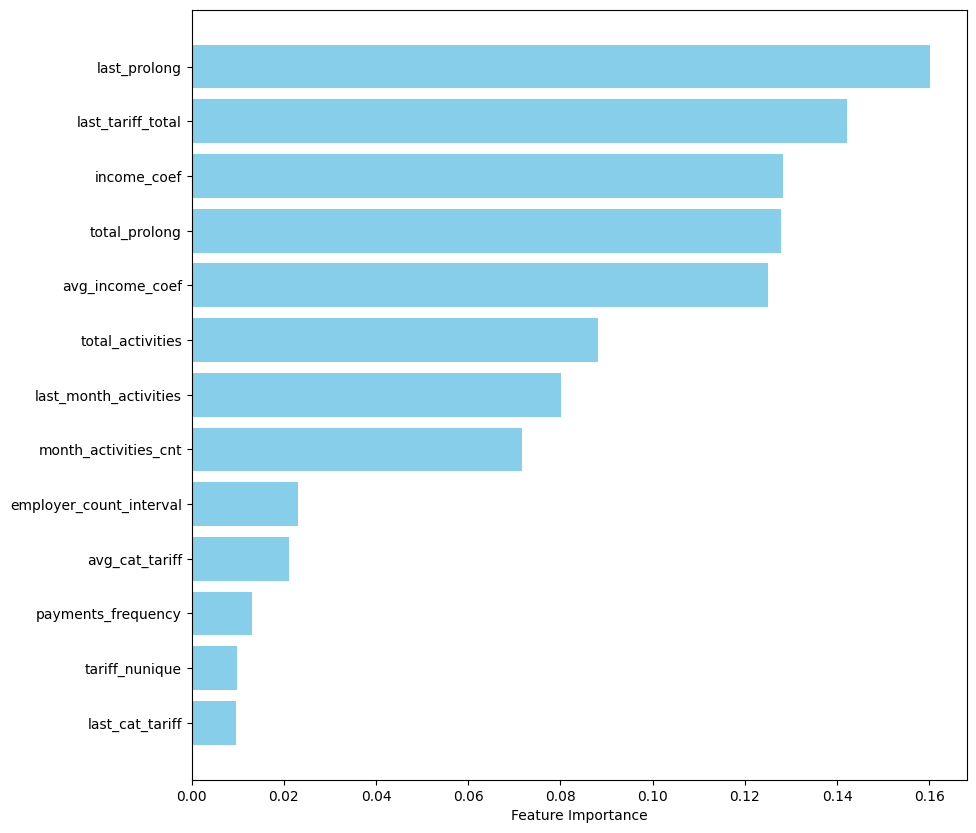

In [221]:
plt.figure(figsize=(10, 10))
plt.barh(X_train.columns[sorted_feature_importance], 
        rfc.feature_importances_[sorted_feature_importance], 
        color='skyblue')
plt.xlabel('Feature Importance');

In [222]:
feat_imp = pd.DataFrame(
    {'feature': list(X_train.columns),
     'importance':rfc.feature_importances_
     })

feat_imp.importance = feat_imp.importance/feat_imp.importance.sum()
feat_imp.sort_values('importance', ascending = False)

feature  importance
4              last_prolong    0.160131
5         last_tariff_total    0.142171
7               income_coef    0.128248
6             total_prolong    0.127911
8           avg_income_coef    0.124987
12         total_activities    0.088202
11    last_month_activities    0.080022
10     month_activities_cnt    0.071664
9   employer_count_interval    0.022974
3            avg_cat_tariff    0.021132
0        payments_frequency    0.013066
1            tariff_nunique    0.009779
2           last_cat_tariff    0.009713

В целом, получили ту же картину важности фичей, что и по матрице корреляции.

In [223]:
preds = rfc.predict_proba(X_test)

In [224]:
rfc.score(X_test, y_test)

0.7652582159624414

In [225]:
roc_auc_test = roc_auc_score(y_test, rfc.predict_proba(X_test)[:,1])
roc_auc_test

0.8487829614604463

Модель с высокой точностью предсказывает отточных клиентов по имеющимся данным. Возможно, это объясняется тем, что длительность пользования сервисом - ликующая фича.

In [226]:
from sklearn import tree

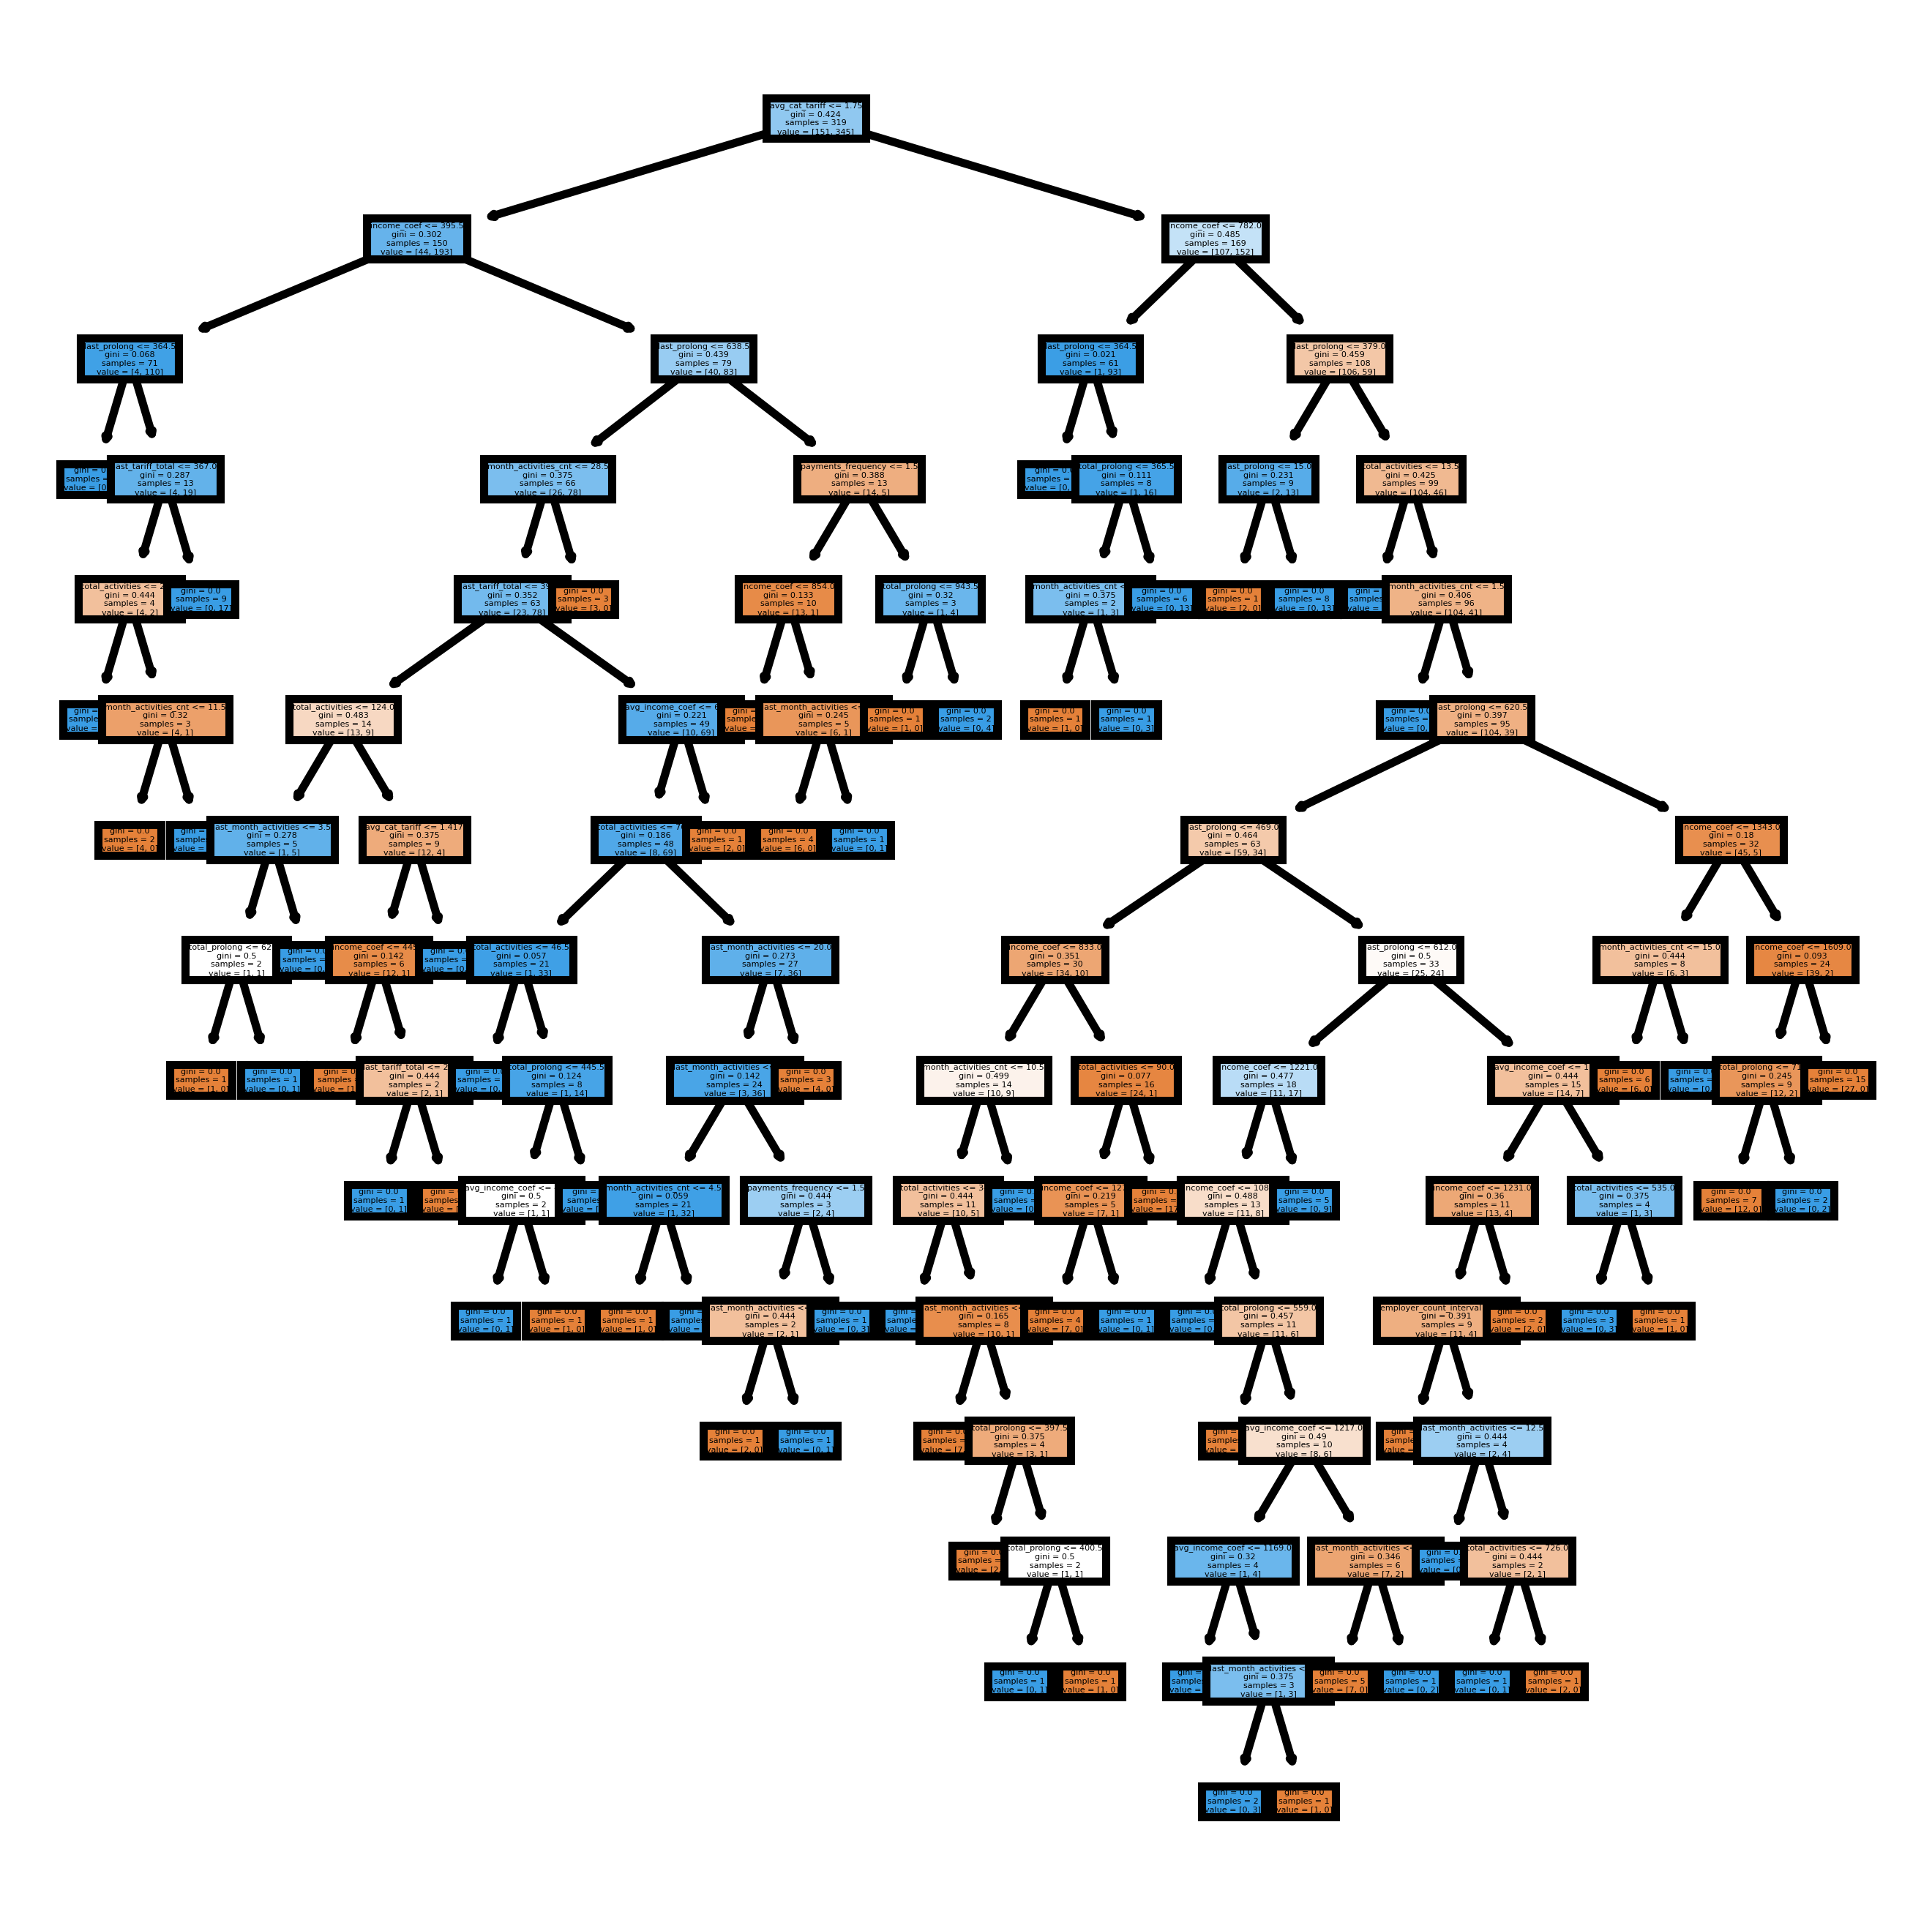

In [227]:
fn=X.columns
cn=y.unique()

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rfc.estimators_[0],
               feature_names = fn,
               filled = True);
fig.savefig('rf_individualtree.png')

## Портрет отточного клиента

Проанализуруем компании, выделенные в сегмент с высоким оттоком:

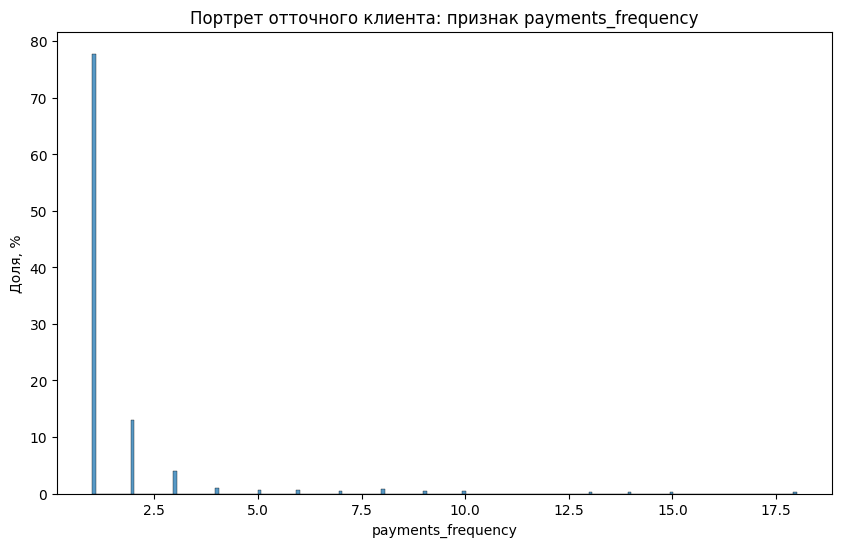

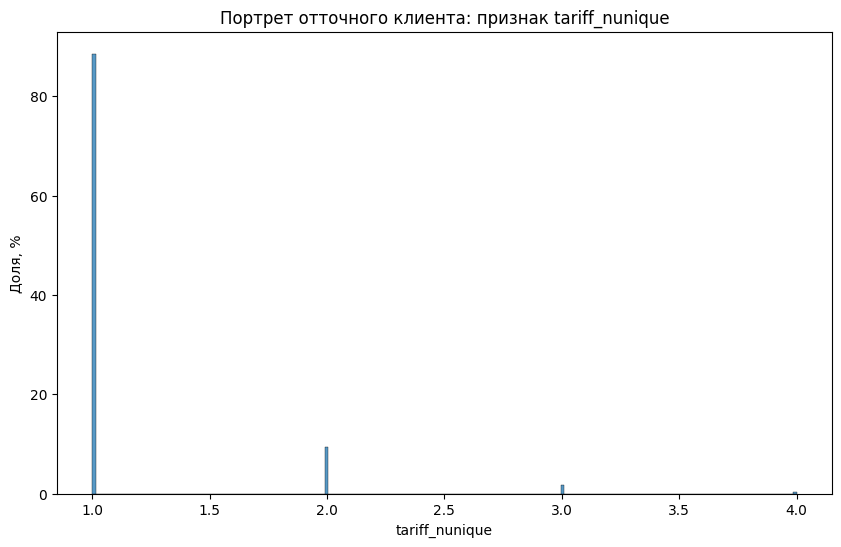

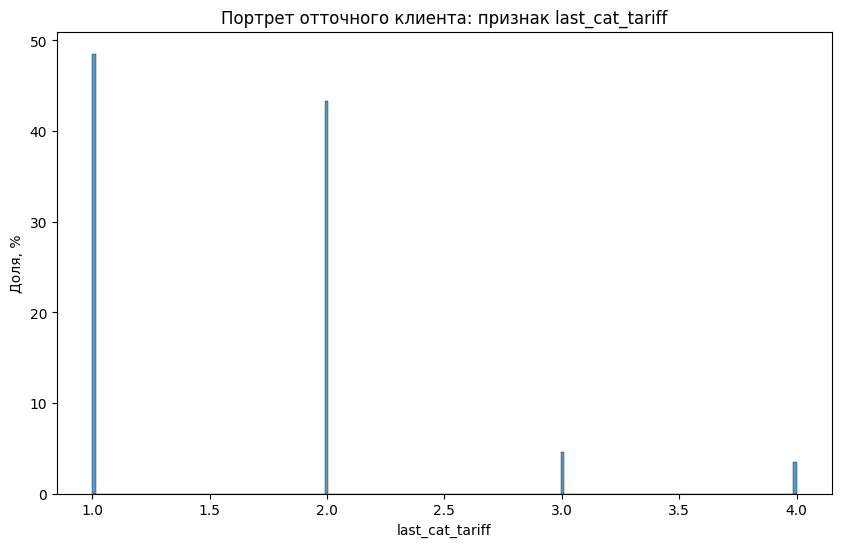

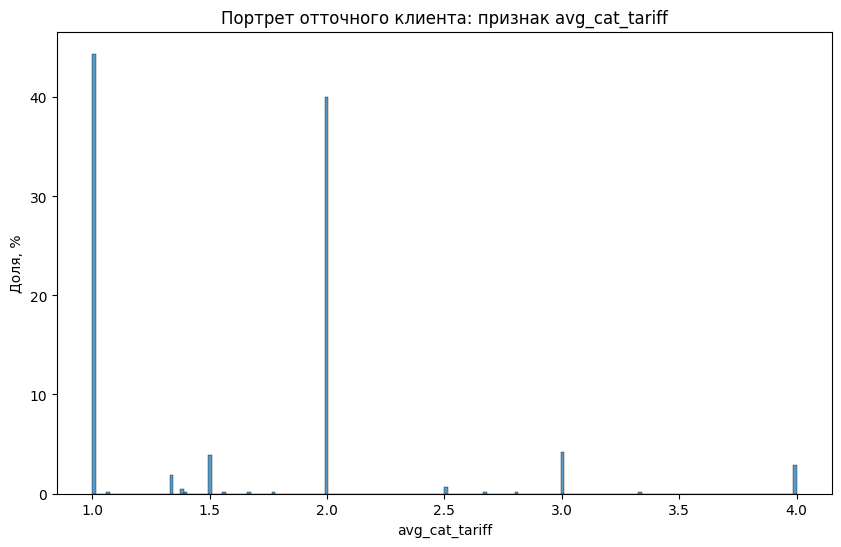

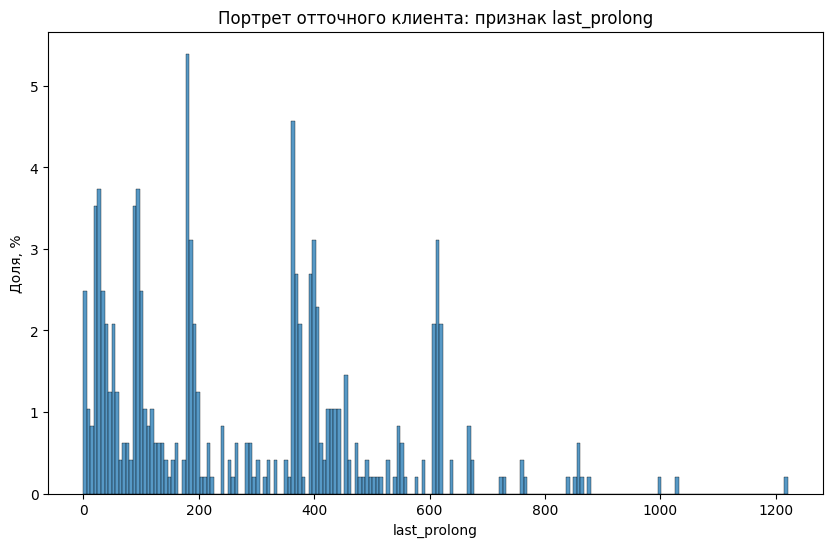

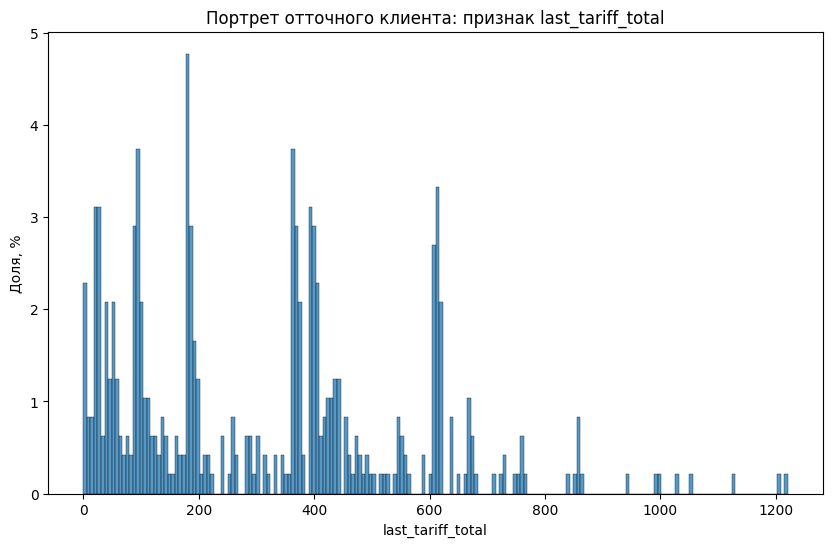

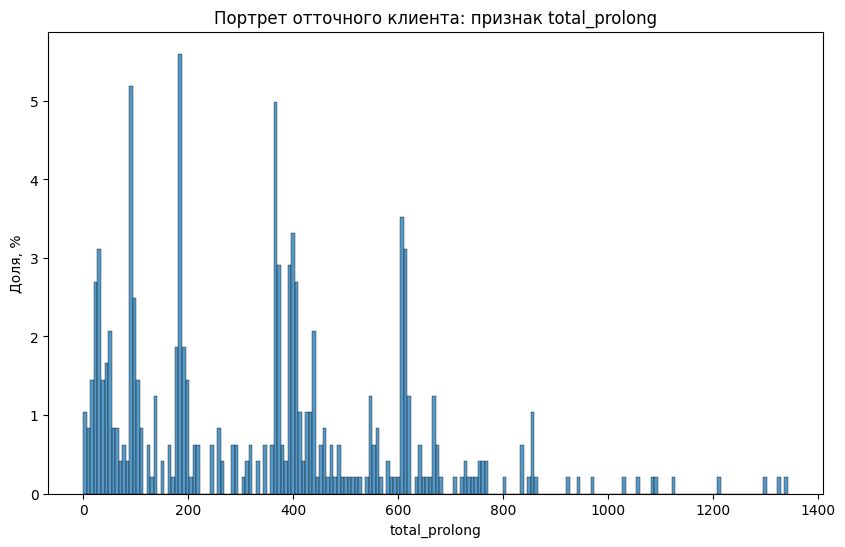

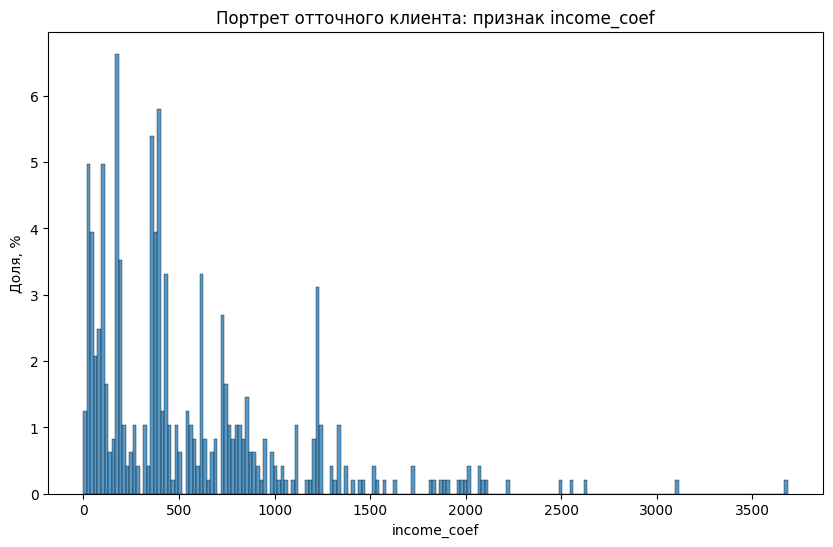

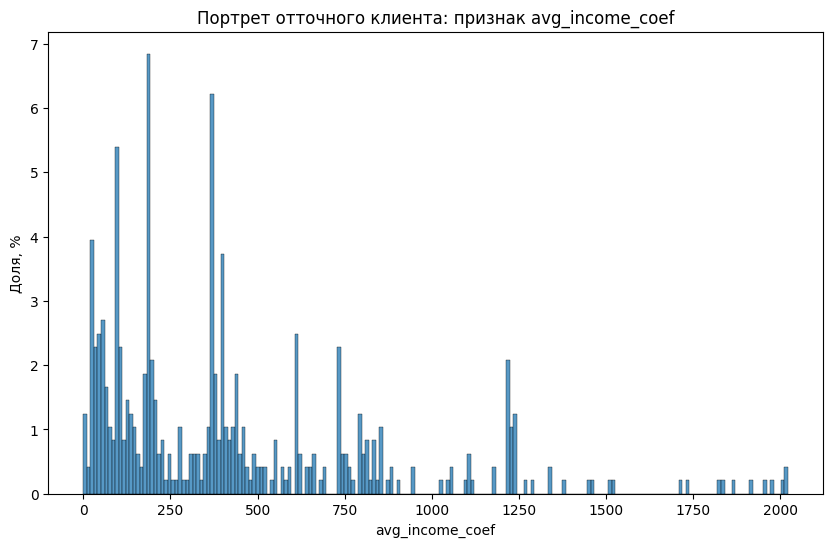

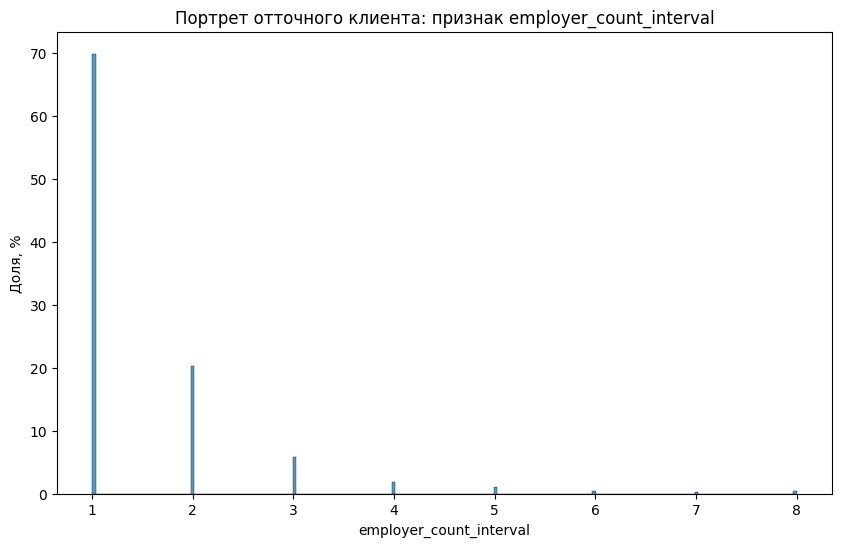

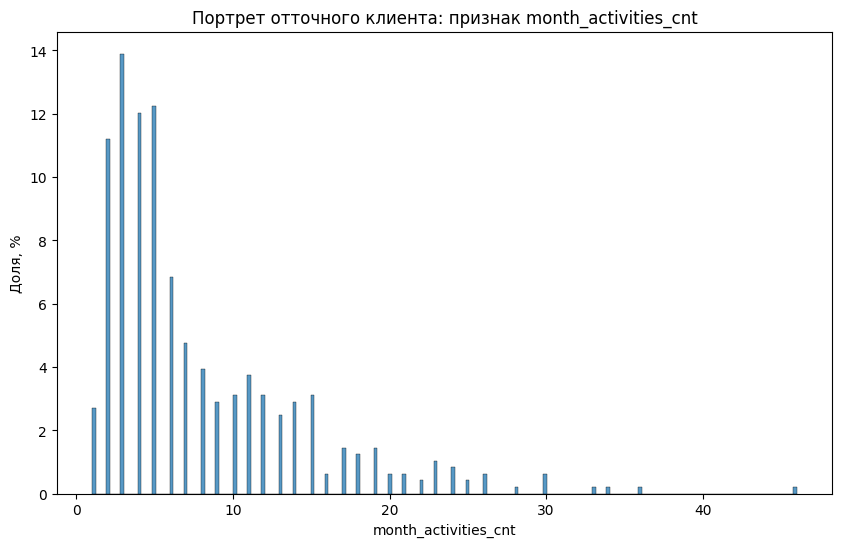

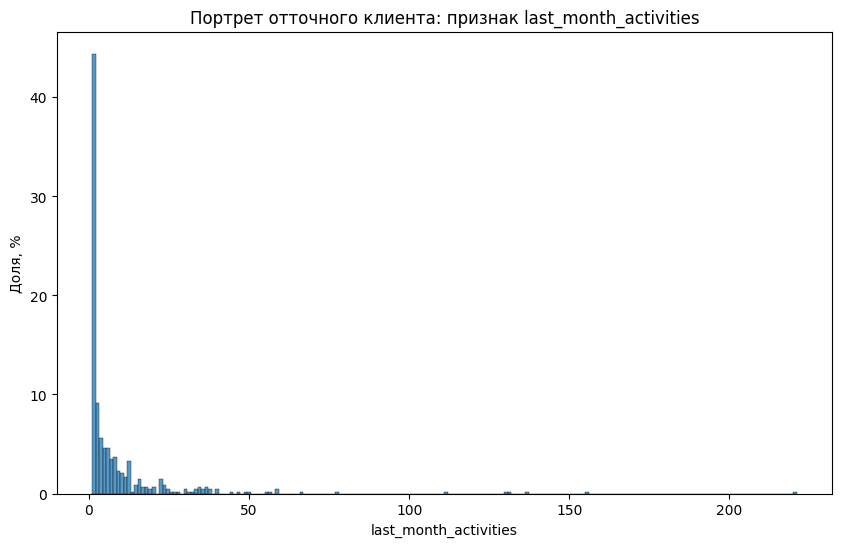

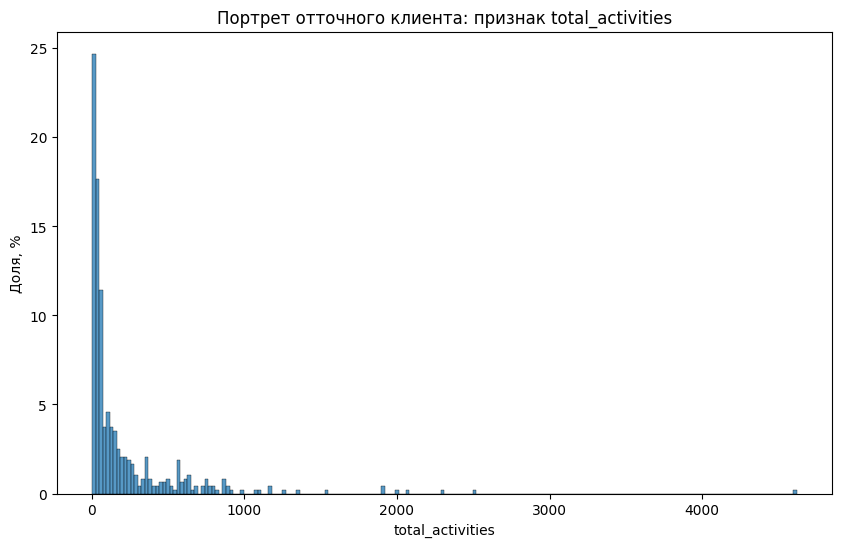

In [228]:
for column in diff_feat:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df.query('churn == 1'), x=column, stat='percent', bins=200)
    plt.title('Портрет отточного клиента: признак ' + column)
    plt.ylabel('Доля, %')
    plt.xlabel(column)
    plt.show();

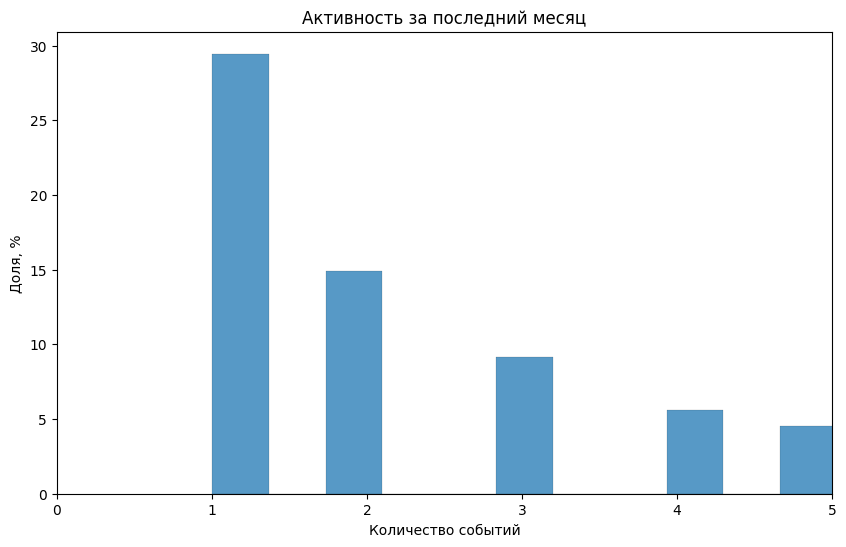

In [229]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df.query('churn == 1'), x='last_month_activities', stat='percent', bins=600)
plt.xlim(0,5)
plt.title('Активность за последний месяц')
plt.ylabel('Доля, %')
plt.xlabel('Количество событий')
plt.show();

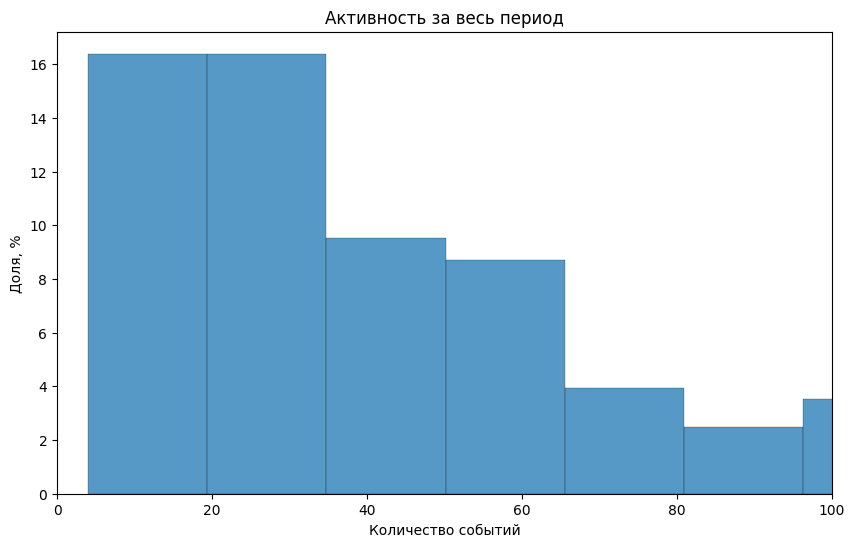

In [230]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df.query('churn == 1'), x='total_activities', stat='percent', bins=300)
plt.xlim(0, 100)
plt.title('Активность за весь период')
plt.ylabel('Доля, %')
plt.xlabel('Количество событий')
plt.show();

In [231]:
df.query('churn == 1').describe()

company_id  payments_frequency  tariff_nunique  last_cat_tariff  \
count   482.000000          482.000000      482.000000       482.000000   
mean   3619.136929            1.566390        1.139004         1.630705   
std    2173.465231            1.770852        0.422070         0.732758   
min       1.000000            1.000000        1.000000         1.000000   
25%    1851.000000            1.000000        1.000000         1.000000   
50%    3348.500000            1.000000        1.000000         2.000000   
75%    5220.250000            1.000000        1.000000         2.000000   
max    9683.000000           18.000000        4.000000         4.000000   

       avg_cat_tariff  last_prolong  last_tariff_total  total_prolong  \
count      482.000000    482.000000         482.000000     482.000000   
mean         1.624508    274.831950         309.076763     338.769710   
std          0.701600    220.734869         239.531126     256.146517   
min          1.000000      0.000000           0.000000       0.000000   
25%          1.000000     91.000000          95.250000      99.500000   
50%          1.500000    195.000000         287.000000     364.000000   
75%          2.000000    406.000000         439.000000     480.500000   
max          4.000000   1221.000000        1221.000000    1343.000000   

       income_coef  avg_income_coef  employer_count_interval  \
count   482.000000       482.000000               482.000000   
mean    553.589212       432.447350                 1.479253   
std     526.227788       411.916796                 0.961085   
min       0.000000         0.000000                 1.000000   
25%     182.000000       120.350000                 1.000000   
50%     399.000000       363.000000                 1.000000   
75%     767.000000       612.750000                 2.000000   
max    3686.000000      2022.000000                 8.000000   

       month_activities_cnt  last_month_activities  total_activities  churn  \
count            482.000000             482.000000        482.000000  482.0   
mean               7.825726               9.070539        208.769710    1.0   
std                6.526352              19.324110        383.426627    0.0   
min                1.000000               1.000000          4.000000    1.0   
25%                3.000000               1.000000         28.000000    1.0   
50%                5.000000               3.000000         62.500000    1.0   
75%               11.000000               8.000000        221.000000    1.0   
max               46.000000             221.000000       4619.000000    1.0   

          cluster  
count  482.000000  
mean     0.192946  
std      0.395021  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

In [232]:
print(f'Доля компаний с активностью не больше 50 событий: \
      {100 * df.query("churn == 1 and total_activities <= 50").shape[0] / df.shape[0]}%')

Доля компаний с активностью не больше 50 событий:       28.772919605077576%


Если собрать всю статистику воедино, получим следующий портрет отточного клиента:

- около 80% отточных клиентов совершают всего один платеж,
- около 90% использовали только 1 тариф,
- около 50% выбрали тариф группы "Старт", еще приблизительно 45% - "Базовый",
- медианное последнее продление подписки 195 дней (среднее - 275 дней),
- медианная жизнь в сервисе 364 днея (средняя - 339 дней),
- медианный усредненный коэффициент доходности 363 (средний - 432),
- около 70% компаний имеют 1-4 сотрудников, 20% - 5-10,
- у 75% компаний количество активных месяцев меньше 11,
- почти у 30% активность в последний месяц равна 1 событию, у 15%  - 2 событиям,
- у 29% активность за весь период не превышает 50 событий,
- 24% указали в роде деятельности строительство, 6% - ремонт, по 3% - отделку и инженерные системы.

Данная статистика позволяет предположить, что в отток уходят маленькие компании с нерегулярным доходом, для которых цена сервиса не компенсируется приносимой пользой. Условно говоря, если в какие-то месяцы у фирмы нет подрядов на ремонты или отделку, платить по 21 тыс. рублей в месяц становится ощутимой финансовой нагрузкой.

## Фидбек по фукционалу серива gectaro.com

Был проведен неглубокий мониторинг отзывов в сети. Выяснилось, что у некоторых пользователей есть претензии к фукнционалу.

Минусы: Очень много недоработок по всем фронтам. Очень сырая программа: сметы формируются неполноценно, нет учёта людей для работы в графике работ, ручное составление актов по факту, нет управления всеми проектами одновременно для директора по строительству, в снабжении нет приоритетов, нет автоматического заполнения актов (реквизиты и т.д.) и многое другое.

Минусы: Пока что это все удобно смотреть только с компьютера, либо с ноутбука. На мобильном телефоне сейчас не очень удобно, а если будет приложение, будет вообще класс.

Минусы: Единственное, для чего не подходит Gectaro, — это для составления смет государственного образца, потому что в системе нет справочников с расценками ТЕР и ФЕР.

Минусы: Маркетинговые активности и зарплатные ведомости продолжаем вводить в Excel — в Gectaro пока этого функционала нет.

Минусы: Из пожеланий — хочется, чтобы в справочнике обновлялись цены не только для Москвы и области, но и для Санкт-Петербурга.

Минусы: Они есть, но разработчики их решают.

Минусы: Недостатков нет, есть пожелание - сделайте более гибкие настройки на акты выполненных работ.

Минусы: В мелочах есть несколько нюансов, которые можно улучшить , пишешь в поддержку могут быть долгие ответы - легче самому разобраться.

Минусы: Функционал до конца не проработал под определённые вещи

Минусы: Не очень гибкая настройка, Gectaro свежий продукт не все еще учтено, но ребята молодцы - обещают все учесть.

Минусы: нельзя выбрать и закрепить исполнителя на обьекте

Минусы: Ждем улучшения на проработку по материалам, затраты по людям для подряда.

Минусы: Был тариф, который стоил определенную сумму, потом сказали что такого тарифа нет - берите дороже. Вот если бы этот 
пакет остался, для компании которая поменьше - вы бы расширили свою аудиторию.

Источник: https://picktech.ru/product/gectaro/reviews/


Минусы:
Раздел снабжения это АД для снабженца. Нет сортировок по наименованиям, почему то нужные в первую очередь материалы в самом низу списка. Невозможно самому называть Заявки, только по присвоенным автоматически номерам. Когда их будет 100, 1000 - сложно ориентироваться. Тестирую деморежим. Первые 3 дня активно работает служба поддержки, далее 2 дня ни через сайт ни через воцап просто не отвечает. Ввязываться при такой поддержке на платной основе конечно не буду, при том это на стадии тестирования, когда поддержка должна быть круглосуточной чтобы привлечь потенциального клиента. Потом почитал, что программа на франшизе, бонусы за привлечение клиентов и тд.Возможно поэтому такая некомпетентная поддержка. Косяков много. Пропадают заявки, потом появляются. Прораб не видит попала заявка в снабжение или нет, ткт у него она просто исчезает и все на этом. График работ - формально. Привязки работ только к окончаниям, без возможности смещения вначало. Неудобно.

В целом:
Вернусь к тесту через пару лет, возможно будет много чего исправлено и доработано. Пока внедрять рано. Программа написана без привлечения строителей, понимающих строительное производство.

Источник: https://a2is.ru/catalog/programmy-dlya-stroitelstva-i-remonta/gectaro/reviews-gectaro

## Выводы

Более полные данные позволили бы провести более глубокий анализ. 

Для анализа были предоставлены 4 таблицы, содержащие сведения об активности клиентов, о платежах, о компаниях и о сотрудниках компаний.

Исследование показало, что в датасетах не совпадают периоды и количество компаний:

<table>
    <tr>
        <td><b>Датасет</b></td>
        <td><b>Период</b></td>
        <td><b>Число компаний</b></td>
    </tr>
    <tr>
        <td>activities</td>
        <td> с января 2019 по март 2024 года</td>
        <td>716</td>
    </tr>
    <tr>
        <td>billings</td>
        <td> с 23 июля 2019 по 15 марта 2024 года</td>
        <td>1841</td>
    </tr>
    <tr>
        <td>payed_billings</td>
        <td> с 23 июля 2019 по 15 марта 2024 года</td>
        <td>878</td>
    </tr>
        <tr>
        <td>companies</td>
        <td> с 23 января 2019 по 7 февраля 2024 года</td>
        <td>716 (7 компаний были удалены)</td>
    </tr>
    <tr>
        <td>employees</td>
        <td> с 23 января 2019 по 13 декабря 2023 года</td>
        <td>712</td>
    </tr>
</table>   

В связи с тем, что в companies данные с 23 января 2019 по 7 февраля 2024, а в billings - с 23 июля 2019 по 13 марта 2024 года, появилась неподтвержденная и неопровергнутая гипотеза, что первые полгода сервис функционировал бесплатно.

Датасеты содержат плохо структурированную информацию, затрудняющую анализ. В данных есть пропуски и дубликаты. Небольшой размер датасета, содержащего информацию о зарегистрированных компаниях, не позволил провести удаление выбросов, так как это сокращало размер данных более чем на 20%.

**Матрицы корреляции позволили выявить признаки, влияющие на отток (по убыванию влияния):**

- last_prolong - длительность последней по времени подписки,
- last_tariff_total - общая длительность последнего тарифа (с учетом предыдущих подписок),
- total_prolong - общая длительность всех подписок компании,
- avg_income_coef - средний коэффициент дохода,
- income_coef - коэффициент дохода,
- month_activities_cnt - количество месяцев, когда клиент был активен,
- last_cat_tariff - группа последнего тарифа (1-4),
- last_month_activities - количество событий за последний месяц,
- avg_cat_tariff - средняя группа тарифов для компании,
- total_activities - общая активность компании за все время.
 
**Признаки, имеющие нулевое влияние на отток:**

- payments_frequency - частота платежей,         
- tariff_nunique - количество уникальных тарифов,
- employer_count_interval - интервал количества сотрудников.

**Таблица важности признаков, полученная при помощи модели классификации, по большей части совпадает с выводами, сделанными по матрицам корреляции:**

**feature	importance**
- last_prolong	- 0.144781
- total_prolong	- 0.142686
- last_tariff_total	- 0.140454
- income_coef	- 0.133824
- avg_income_coef	- 0.117252
- total_activities	- 0.089552
- last_month_activities	- 0.084275
- month_activities_cnt	- 0.072706
- employer_count_interval	- 0.023118
- avg_cat_tariff	- 0.016349
- last_cat_tariff	- 0.013892
- payments_frequency	- 0.012478
- tariff_nunique	- 0.008633

**Распределение тарифов в зависимости от оттока:**
<table>
    <tr>
        <td><b>Отток</b></td>
        <td><b>Старт</b></td>
        <td><b>Базовый</b></td>
        <td><b>Профи</b></td>
        <td><b>Бизнес</b></td>
    </tr>
        <tr>
        <td><b>нет</b></td>
        <td>10.58</td>
        <td>16.50</td>
        <td>4.09</td>
        <td>0.85</td>
    </tr>
        <tr>
        <td><b>да</b></td>
        <td>33.00</td>
        <td>29.48</td>
        <td>3.10</td>
        <td>2.40</td>
    </tr>
</table>    

**Сфера деятельности:**

В целом, картина схожа: 63-64% не указали сферу деятельности и среди отточных, и среди лояльных клиентов.

Среди лояльных клиентов выше доля тех, кто указал строительство как род деятельности.

Среди отточных клиентов выше доля тех, кто занимается ремонтом, отделкой, монтажом, инженерными системами.

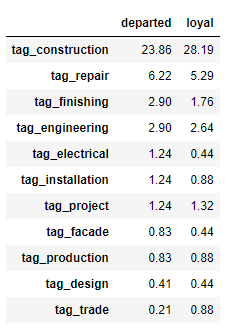

**Количество сотрудников компаний:**

Среди лояльных клиентов ниже доля компаний с 1-4 сотрудниками.

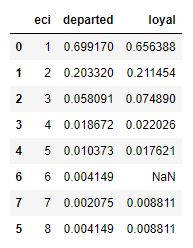

**Портрет отточного клиента:**

- около 80% отточных клиентов совершают всего один платеж,
- около 90% использовали только 1 тариф,
- около 50% выбрали тариф группы "Старт", еще приблизительно 45% - "Базовый",
- медианное последнее продление подписки 195 дней (среднее - 275 дней),
- медианная жизнь в сервисе 364 днея (средняя - 339 дней),
- медианный усредненный коэффициент доходности 363 (средний - 432),
- около 70% компаний имеют 1-4 сотрудников, 20% - 5-10,
- у 75% компаний количество активных месяцев меньше 11,
- почти у 30% активность в последний месяц равна 1 событию, у 15%  - 2 событиям,
- у 29% активность за весь период не превышает 50 событий,
- 24% указали в роде деятельности строительство, 6% - ремонт, по 3% - отделку и инженерные системы.

Проведенное исследование позволяет предположить, что в отток уходят маленькие компании с нерегулярным доходом, для которых цена сервиса не компенсируется приносимой пользой. Условно говоря, если в какие-то месяцы у фирмы нет подрядов на ремонты или отделку, платить по 21 тыс. рублей в месяц становится ощутимой финансовой нагрузкой.

Кроме того, мониторинг отзывов позволяет предположить наличие у сервиса проблем с функциональностью, что также является триггером оттока.

## Рекомендации

- Мониторинг негативных отзывов в сети позволяет предположить наличие функциональных проблем, постепенное устранение которых увеличит количество довольных и активных клиентов.

- Кажется целесообразным провести тесты наподобие NPS (Net Promoter Score), чтобы выяснить, насколько клиенты удовлетворены сервисом.

- Собрать предложения по улучшению функционала сервиса при помощи email-рассылок или форм с тем, чтобы постепенно улучшать сервис, избавляясь от багов и недоработок.

- Некоторые некритичные доработки позволят облегчить анализ и построение моделей в будущем. Например, можно добавить в личном кабинете выбор рода деятельности через список со множественным выбором, это позволит избежать ошибок и разных вариантов написания. Кроме того, имеет смысл оптимизировать саму базу данных. В текущем виде она лишь затрудняет анализ — разные периоды, разное количество уникальных компаний в каждой таблице, наличие дубликатов, непонятно наличие огромного количества компаний с выставленными, но неоплаченными платежками, непонятна причина пропусков в датах платежей, если флаг оплаты выставлен в True и прочее.

- Модели эластичности позволят найти клиентов, чей спрос эластичен цене. Таких клиентов можно будет удерживать в сервисе за счет более низких цен (остальным клиентам можно назначать цену выше).

- Для снижения расходов на коммуникации можно использовать аплифт-модели, они позволят выбрать только тех клиентов, напоминания которым принесут желаемый результат (например, продление подписки).

## Презентация

https://disk.yandex.ru/i/wv-HLDWwv_SKbw